In [1059]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
import numpy as np
import seaborn as sns
import pingouin as pg
from IPython.display import display
from statsmodels.stats.inter_rater import fleiss_kappa
import scikit_posthocs as sp
import krippendorff

In [1060]:
df_human_generated = pd.read_csv('human_generated.csv')
df_model_generated = pd.read_csv('model_generated.csv')
df_baseline_generated = pd.read_csv('baseline_generated.csv')

In [1061]:
# drop the email columns for privacy
df_human_generated = df_human_generated.drop(columns=['Email address'])
df_model_generated = df_model_generated.drop(columns=['Email address'])
df_baseline_generated = df_baseline_generated.drop(columns=['Email address'])

In [1062]:
df_baseline_generated

Timestamp What is your age range? What is your gender?  \
0   20/08/2024 17:50:47                   25-34                 Male   
1   22/08/2024 15:06:02                   25-34                 Male   
2   23/08/2024 17:26:27                   25-34                 Male   
3   23/08/2024 23:55:27                   25-34                 Male   
4   25/08/2024 23:11:12                   25-34                 Male   
5   28/08/2024 12:28:44                   25-34               Female   
6   28/08/2024 12:38:40                   25-34                 Male   
7   30/08/2024 20:42:07                   25-34                 Male   
8   31/08/2024 18:26:22                   25-34                 Male   
9   02/09/2024 09:06:45                   25-34                 Male   
10  04/09/2024 01:00:08                   18-24                 Male   
11  05/09/2024 16:55:03                   25-34                 Male   
12  05/09/2024 17:55:53                   25-34                 Male   
13  06/09/2024 16:01:05                   25-34                 Male   
14  07/09/2024 22:11:54                   18-24                 Male   
15  11/09/2024 00:35:15                   25-34                 Male   
16  12/09/2024 13:17:10                   25-34               Female   
17  19/09/2024 04:54:38                   25-34                 Male   
18  19/09/2024 16:10:22                   35-44               Female   

   What is the highest level of education you have completed?  \
0                                   Bachelor's degree           
1                                   Bachelor's degree           
2                                        Some college           
3                                     Master's degree           
4                                   Bachelor's degree           
5                                   Bachelor's degree           
6                                   Bachelor's degree           
7                                   Bachelor's degree           
8                                   Bachelor's degree           
9                                     Master's degree           
10                                  Bachelor's degree           
11                                    Master's degree           
12                                  Bachelor's degree           
13                                  Bachelor's degree           
14                                  Bachelor's degree           
15                                    Master's degree           
16                                  Bachelor's degree           
17                          High school or equivalent           
18                                    Doctoral degree           

   What is the highest level of English proficiency you have achieved?  \
0                                       C1 (Advanced)                    
1                                       C1 (Advanced)                    
2                                       C1 (Advanced)                    
3                                       C1 (Advanced)                    
4                                   B1 (Intermediate)                    
5                                       C1 (Advanced)                    
6                                     C2 (Proficient)                    
7                                       C1 (Advanced)                    
8                                       C1 (Advanced)                    
9                                       C1 (Advanced)                    
10                                      C1 (Advanced)                    
11                                    C2 (Proficient)                    
12                                      C1 (Advanced)                    
13                                      C1 (Advanced)                    
14                                      C1 (Advanced)                    
15                                      C1 (Advanced)                    
16            

In [1063]:
df_model_generated

Timestamp What is your age range? What is your gender?  \
0   21/08/2024 00:11:58                   25-34                 Male   
1   22/08/2024 14:50:41                   25-34                 Male   
2   23/08/2024 17:43:45                   25-34                 Male   
3   23/08/2024 23:59:49                   25-34                 Male   
4   26/08/2024 10:39:31                   25-34                 Male   
5   28/08/2024 12:44:15                   25-34               Female   
6   30/08/2024 20:42:09                   25-34                 Male   
7   01/09/2024 15:24:34                   25-34                 Male   
8   02/09/2024 23:44:59                   18-24                 Male   
9   05/09/2024 18:29:57                   25-34                 Male   
10  06/09/2024 16:15:43                   25-34                 Male   
11  08/09/2024 01:29:33                   25-34                 Male   
12  09/09/2024 10:01:02                   18-24                 Male   
13  10/09/2024 09:48:48                   25-34                 Male   
14  11/09/2024 01:26:05                   25-34                 Male   
15  12/09/2024 13:20:55                   25-34               Female   
16  19/09/2024 17:50:18                   25-34                 Male   
17  20/09/2024 00:50:51                   35-44                 Male   
18  20/09/2024 13:37:03                   35-44               Female   
19  20/09/2024 13:40:43                   25-34                 Male   
20  23/09/2024 12:02:35                   25-34                 Male   

   What is the highest level of education you have completed?  \
0                                   Bachelor's degree           
1                                   Bachelor's degree           
2                                        Some college           
3                                     Master's degree           
4                                   Bachelor's degree           
5                                   Bachelor's degree           
6                                   Bachelor's degree           
7                                   Bachelor's degree           
8                                   Bachelor's degree           
9                                   Bachelor's degree           
10                                  Bachelor's degree           
11                                  Bachelor's degree           
12                                  Bachelor's degree           
13                                    Master's degree           
14                                    Master's degree           
15                                  Bachelor's degree           
16                                    Doctoral degree           
17                                    Doctoral degree           
18                                    Doctoral degree           
19                                    Master's degree           
20                                    Doctoral degree           

   What is the highest level of English proficiency you have achieved?  \
0                                       C1 (Advanced)                    
1                                       C1 (Advanced)                    
2                                       C1 (Advanced)                    
3                                       C1 (Advanced)                    
4                                   B1 (Intermediate)                    
5                                       C1 (Advanced)                    
6                                       C1 (Advanced)                    
7                                       C1 (Advanced)                    
8                                       C1 (Advanced)                    
9                                       C1 (Advanced)                    
10                                      C1 (Advanced)                    
11                                    C2 (Proficient)                    
12                                  

In [1064]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data',
    'tag_riot_api', 'tag_battle_arena', 'spec_lol', 'spec_video_games', 'spec_multiplayer',
    'spec_game_data', 'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
    'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex', 'tag_usd_jpy',
    'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high',
    'spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs',
    'spec_yearly_data', 'spec_finance', 'spec_minute_high', 'tags_coverage_forex',
    'suggested_tags_forex', 'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer',
    'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
    'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology',
    'spec_carcinomas', 'spec_gene_expr', 'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_human_generated.columns = new_column_names
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [1065]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_ranked_matches', 'tag_games', 'tag_league_of_legends',
    'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports',
    'spec_ranked_matches', 'spec_games', 'spec_league_of_legends',
    'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports',
    'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_historical_price_data', 'tag_minute_interval',
    'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high',
    'spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data',
    'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
    'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
    'spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research',
    'spec_biology', 'spec_medicine', 'spec_health',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_model_generated.columns = new_column_names
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [1066]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions',
    'tag_clicking', 'tag_cost', 'tag_advertisement', 'spec_turret', 'spec_lost',
    'spec_destroyed', 'spec_advertisement', 'spec_impressions', 'spec_clicking',
    'spec_cost', 'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing',
    'tag_high', 'tag_bid', 'tag_ask', 'spec_thyrotropin', 'spec_minute', 'spec_usd',
    'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_cancer', 'tag_microarray', 'tag_prostate',
    'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes',
    'spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian',
    'spec_gliomas', 'spec_lung', 'spec_genes',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_baseline_generated.columns = new_column_names
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

# Filter out failed attention check answers

In [1067]:
# filter out rows and record how many rows are dropped and left, filter out where colleges_desc is not "Social Science"
print("Before filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)
df_baseline_generated = df_baseline_generated[df_baseline_generated['colleges_desc'] == "Social Science"]
df_model_generated = df_model_generated[df_model_generated['colleges_desc'] == "Social Science"]
df_human_generated = df_human_generated[df_human_generated['colleges_desc'] == "Social Science"]
print("After filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)

Before filtering:  (19, 63) (21, 63) (18, 61)
After filtering:  (19, 63) (21, 63) (18, 61)


# Background of subjects

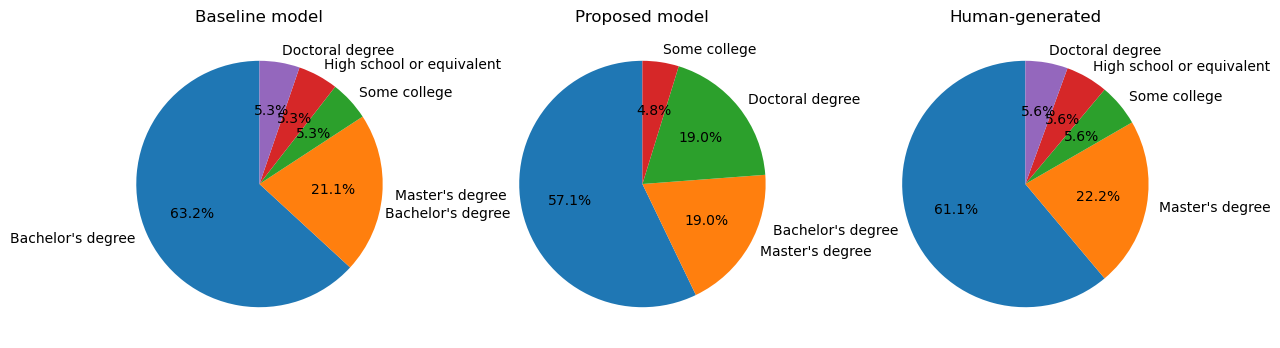

In [1068]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df_baseline_generated['education'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90)
df_model_generated['education'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90)
df_human_generated['education'].value_counts().plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Baseline model')
ax[1].set_title('Proposed model')
ax[2].set_title('Human-generated')
# set y axis to be invisible
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
plt.savefig('../../latex/thesis/figures/education_pie.pdf', bbox_inches='tight')
plt.show()

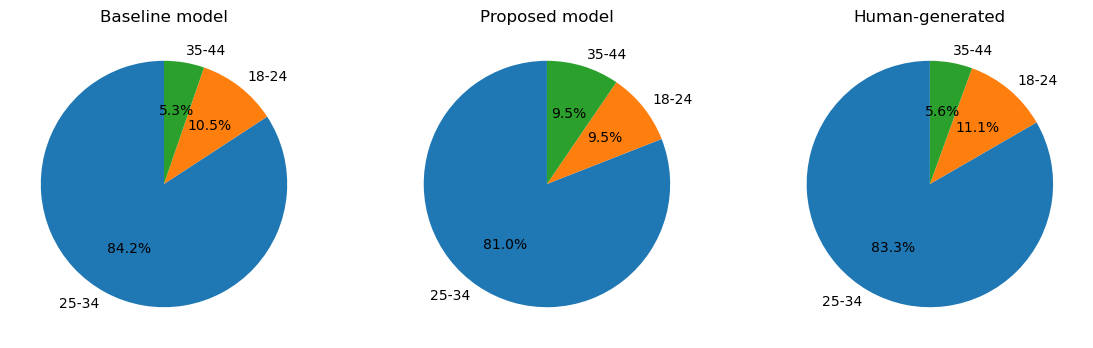

In [1069]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df_baseline_generated['age_range'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90)
df_model_generated['age_range'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90)
df_human_generated['age_range'].value_counts().plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90)

ax[0].set_title('Baseline model')
ax[1].set_title('Proposed model')
ax[2].set_title('Human-generated')
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
plt.savefig('../../latex/thesis/figures/age_range_pie.pdf', bbox_inches='tight')
plt.show()

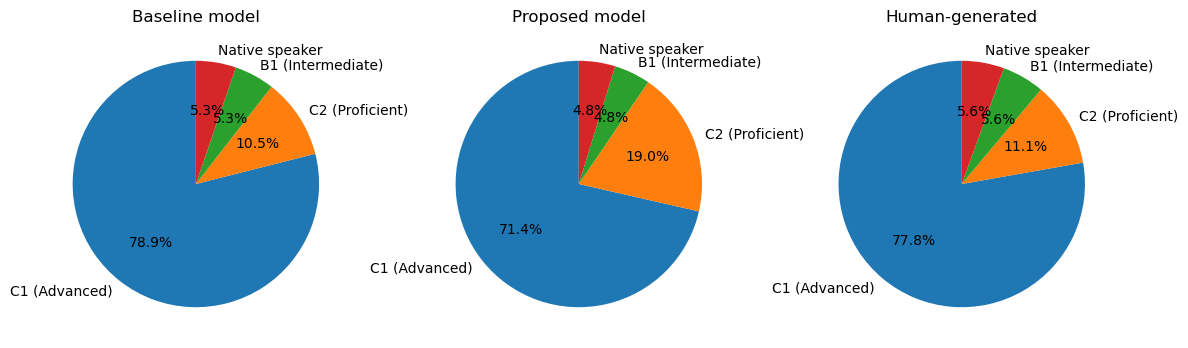

In [1070]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df_baseline_generated['english_prof'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90)
df_model_generated['english_prof'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90)
df_human_generated['english_prof'].value_counts().plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Baseline model')
ax[1].set_title('Proposed model')
ax[2].set_title('Human-generated')
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
plt.savefig('../../latex/thesis/figures/english_prof_pie.pdf', bbox_inches='tight')
plt.show()

# Intruder Detection

In [1071]:
def intruder_detected(row, prefix, intruder_tag):
    tag_columns = [col for col in row.index if col.startswith(prefix)]
    return intruder_tag in row[tag_columns].values

def process_intruder_detection(df, intruder_dict, results_dict):
    for prefix, intruder in intruder_dict.items():
        detected_count = df.apply(intruder_detected, axis=1, args=(prefix, intruder)).sum()
        not_detected_count = len(df) - detected_count
        results_dict[prefix]['detected'] = detected_count
        results_dict[prefix]['not_detected'] = not_detected_count

baseline_intruders = {
    'lol_game_desc': 'Passenger',
    'forex_desc': 'Jump',
    'lung_cancer_desc': 'Piece',
}
baseline_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

model_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
model_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

human_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
human_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

text_name_map = {
    'lol_game_desc': 'League of Legends',
    'forex_desc': 'Forex',
    'lung_cancer_desc': 'Lung Cancer',
}

process_intruder_detection(df_baseline_generated, baseline_intruders, baseline_results)
process_intruder_detection(df_model_generated, model_intruders, model_results)
process_intruder_detection(df_human_generated, human_intruders, human_results)

print(baseline_results)
print(model_results)
print(human_results)

{'lol_game_desc': {'detected': 12, 'not_detected': 7}, 'forex_desc': {'detected': 1, 'not_detected': 18}, 'lung_cancer_desc': {'detected': 11, 'not_detected': 8}}
{'lol_game_desc': {'detected': 21, 'not_detected': 0}, 'forex_desc': {'detected': 19, 'not_detected': 2}, 'lung_cancer_desc': {'detected': 20, 'not_detected': 1}}
{'lol_game_desc': {'detected': 18, 'not_detected': 0}, 'forex_desc': {'detected': 18, 'not_detected': 0}, 'lung_cancer_desc': {'detected': 18, 'not_detected': 0}}


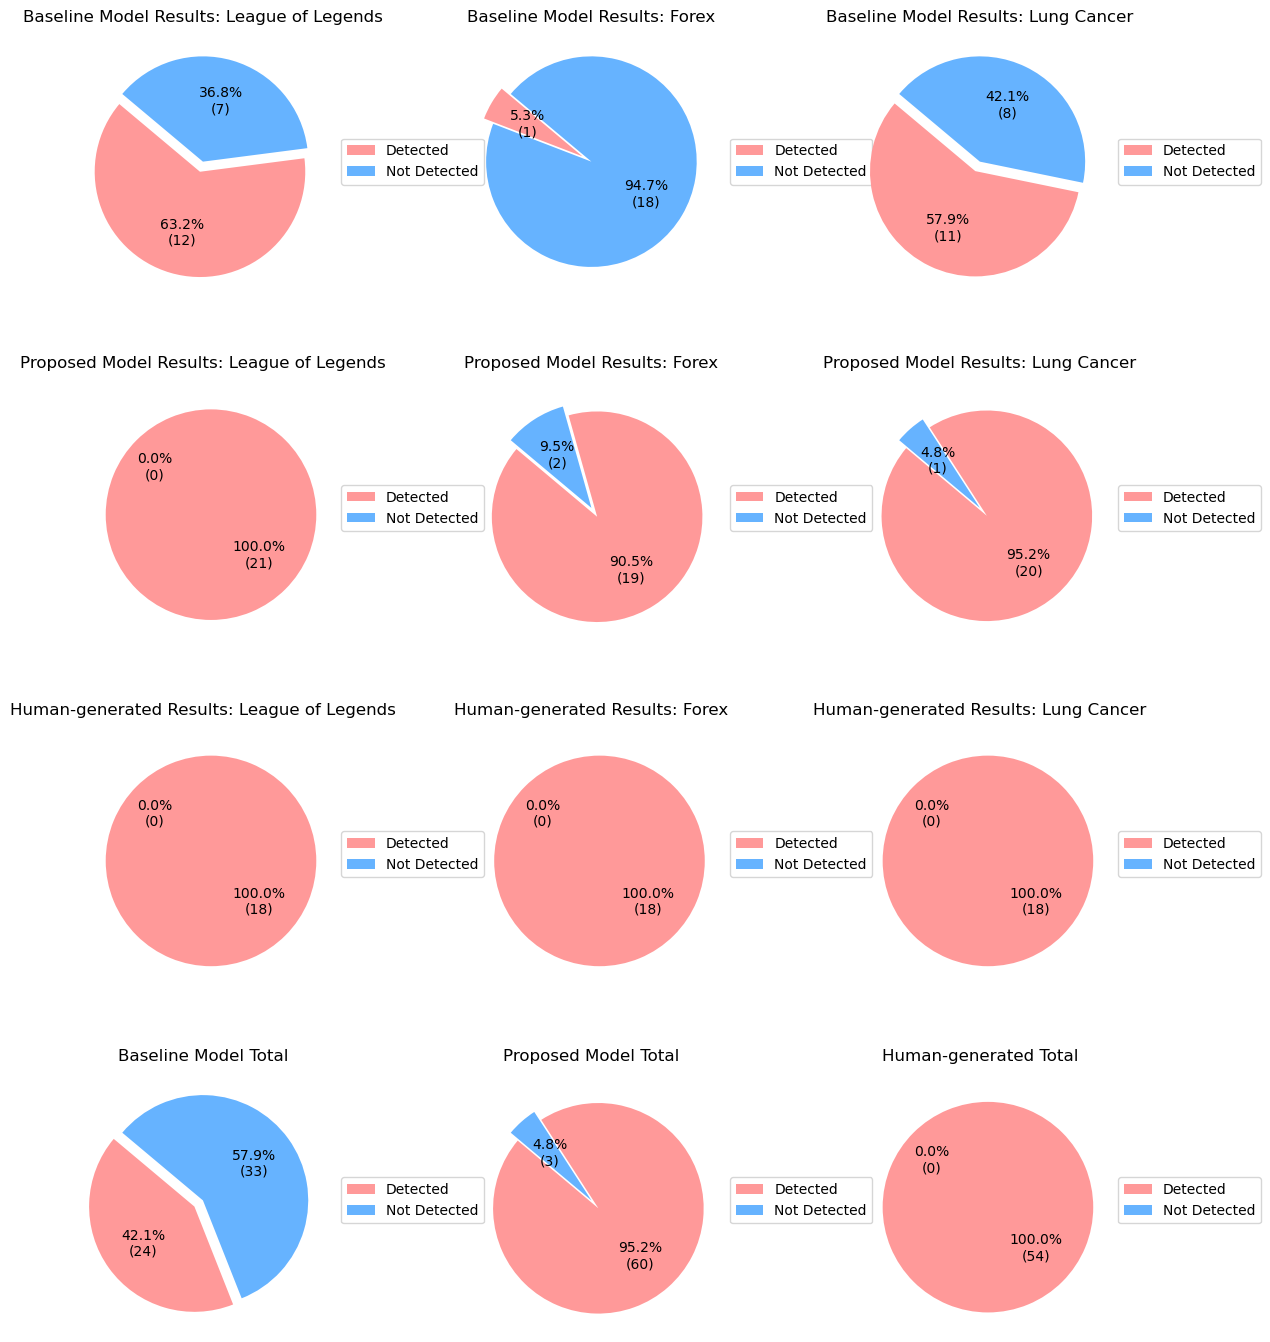

In [1072]:
def plot_pie_charts_with_totals(baseline_results, model_results, human_results, file_path):
    def calculate_totals(results_dict):
        total_detected = sum(result['detected'] for result in results_dict.values())
        total_not_detected = sum(result['not_detected'] for result in results_dict.values())
        return {'detected': total_detected, 'not_detected': total_not_detected}
    
    baseline_totals = calculate_totals(baseline_results)
    model_totals = calculate_totals(model_results)
    human_totals = calculate_totals(human_results)

    pie_data = [
        (baseline_results, "Baseline Model Results"),
        (model_results, "Proposed Model Results"),
        (human_results, "Human-generated Results")
    ]
    
    total_data = [
        ({'Total': baseline_totals}, "Baseline Model Total"),
        ({'Total': model_totals}, "Proposed Model Total"),
        ({'Total': human_totals}, "Human-generated Total"),
    ]

    fig, axs = plt.subplots(4, 3, figsize=(12, 14))

    labels = ['Detected', 'Not Detected']
    colors = ['#ff9999', '#66b3ff']

    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            absolute = int(round(pct / 100. * total))
            return f"{pct:.1f}%\n({absolute:d})"
        return my_format

    for i, (results_dict, title_prefix) in enumerate(pie_data):
        for j, (desc, result) in enumerate(results_dict.items()):
            ax = axs[i, j]
            
            sizes = [result['detected'], result['not_detected']]
            explode = (0.1, 0)

            wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
            title_postfix = text_name_map[desc]
            ax.set_title(f'{title_prefix}: {title_postfix}')

            ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    for j, (total_dict, title) in enumerate(total_data):
        ax = axs[3, j]
        result = total_dict['Total']
        
        sizes = [result['detected'], result['not_detected']]
        explode = (0.1, 0)

        wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
        ax.set_title(title)

        ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.tight_layout()
    plt.savefig(file_path, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

plot_pie_charts_with_totals(baseline_results, model_results, human_results, "../../latex/thesis/figures/intruder_detection_results.pdf")

# Analysis of the data

In [1073]:
def analyze_tags(df, 
                 relevance_columns_list, 
                 spec_columns_list, 
                 coverage_columns_list, 
                 suggested_columns_list, 
                 common_tags_columns_1, 
                 common_tags_true_tags_1, 
                 common_tags_coverage_1,
                 common_tags_columns_2, 
                 common_tags_true_tags_2,
                 common_tags_coverage_2,
                 save_path_aggregated=None,
                 save_path_correlations=None,
                 save_path_first_pair_coverage=None,
                 save_path_second_pair_coverage=None,
                 save_path_first_pair_confusion_matrix=None,
                 save_path_second_pair_confusion_matrix=None):
    
    all_relevance_data = []
    all_spec_data = []
    all_coverage_data = []

    for i, (relevance_columns, spec_columns, coverage_columns, suggested_columns) in enumerate(zip(relevance_columns_list, spec_columns_list, coverage_columns_list, suggested_columns_list)):
        print(f"\n--- Analyzing Document {i+1} ---")
        
        # Preprocess numerical columns to turn e.g. 3 - Moderately well into 3
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        def calculate_distribution(df, columns):
            return df[columns].agg(['std', 'min', 'max', 'mean'])

        document_dist_relevance = calculate_distribution(df, relevance_columns)
        document_dist_spec = calculate_distribution(df, spec_columns)
        
        print(f"Document {i+1} Relevance Distribution:")
        print(document_dist_relevance)
        print(f"Document {i+1} Generality Distribution:")
        print(document_dist_spec)
        
        plot_scores_with_mean_std_ci_grid(df, relevance_columns, f'Document {i+1} - Raw Relevance Scores')
        plot_scores_with_mean_std_ci_grid(df, spec_columns, f'Document {i+1} - Raw Generality Scores')
        plot_coverage_with_mean_std_ci_grid(df, coverage_columns, f'Document {i+1} - Tag Coverage')

        calculate_and_plot_correlations(df, relevance_columns, spec_columns, coverage_columns)
        
        all_relevance_data.extend(df[relevance_columns].values.flatten())
        all_spec_data.extend(df[spec_columns].values.flatten())
        all_coverage_data.extend(df[coverage_columns].values.flatten())

    all_relevance_data = np.array(all_relevance_data)
    all_spec_data = np.array(all_spec_data)
    all_coverage_data = np.array(all_coverage_data)
    
    plot_aggregated_scores(
        all_relevance_data, 
        all_spec_data, 
        all_coverage_data, 
        'Aggregated Scores',
        save_path=save_path_aggregated
    )

    calculate_and_plot_aggregated_correlations(all_relevance_data, all_spec_data, all_coverage_data, save_path=save_path_correlations)
    
    relevance_columns = relevance_columns_list[0] + relevance_columns_list[1] + relevance_columns_list[2]
    spec_columns = spec_columns_list[0] + spec_columns_list[1] + spec_columns_list[2]
    coverage_columns = coverage_columns_list[0] + coverage_columns_list[1] + coverage_columns_list[2]
    shared_coverage_columns = common_tags_coverage_1 + common_tags_coverage_2
    plot_icc(df, relevance_columns, spec_columns, coverage_columns, shared_coverage_columns)
             
    plot_common_tags_coverage_with_stats(df, common_tags_coverage_1, 'First Pair Common Tags Coverage', save_path=save_path_first_pair_coverage)

    plot_common_tags_coverage_with_stats(df, common_tags_coverage_2, 'Second Pair Common Tags Coverage', save_path=save_path_second_pair_coverage)

    # Compare common tags with true tags across all documents
    # First pair of common tags
    first_pair_common_tags = df[common_tags_columns_1].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    # Second pair of common tags
    second_pair_common_tags = df[common_tags_columns_2].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    first_pair_confusion_matrix = calculate_confusion_matrix(first_pair_common_tags, common_tags_true_tags_1, relevance_columns_list[0])
    
    second_pair_confusion_matrix = calculate_confusion_matrix(second_pair_common_tags, common_tags_true_tags_2, relevance_columns_list[1])
    
    accuracy_1, precision_1, recall_1, specificity_1, f1_score_1 = calculate_metrics(first_pair_confusion_matrix)
    
    accuracy_2, precision_2, recall_2, specificity_2, f1_score_2 = calculate_metrics(second_pair_confusion_matrix)
    
    print_metrics("First Pair Common Tags", accuracy_1, precision_1, recall_1, specificity_1, f1_score_1)
    
    print_metrics("Second Pair Common Tags", accuracy_2, precision_2, recall_2, specificity_2, f1_score_2)
    
    plot_confusion_matrix(first_pair_confusion_matrix, "First Pair Common Tags", save_path=save_path_first_pair_confusion_matrix)
    plot_confusion_matrix(second_pair_confusion_matrix, "Second Pair Common Tags", save_path=save_path_second_pair_confusion_matrix)


# Utility Functions
def preprocess_numerical_columns(df, columns):
    df = df.copy()
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.extract('(\d+)', expand=False).astype(float)
    return df

def plot_scores_with_mean_std_ci_grid(df, columns, title_prefix, n_cols=3, confidence_level=0.95):
    num_columns = len(columns) + 1  # +1 to include the aggregated histogram
    n_rows = (num_columns + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    axs = axs.flatten()

    aggregated_data = []

    for i, col in enumerate(columns):
        data = df[col].dropna()
        nan_count = df[col].isna().sum()
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        aggregated_data.extend(data)
        
        # Calculate the margin of error for the confidence interval
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    # Now plot the aggregated histogram
    aggregated_data = np.array(aggregated_data)
    mean_agg = aggregated_data.mean()
    std_agg = aggregated_data.std()
    n_agg = len(aggregated_data)
    nan_count_agg = df[columns].isna().sum().sum()  # Total NaN count across all columns
    
    # Calculate the margin of error for the confidence interval for aggregated data
    t_stat_agg = t.ppf((1 + confidence_level) / 2., n_agg - 1)
    margin_of_error_agg = t_stat_agg * (std_agg / np.sqrt(n_agg))
    ci_lower_agg = mean_agg - margin_of_error_agg
    ci_upper_agg = mean_agg + margin_of_error_agg
    
    axs[-1].hist(aggregated_data, bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
    axs[-1].set_title(f'{title_prefix} - Aggregated')
    axs[-1].set_xlabel('Score')
    axs[-1].set_ylabel('Frequency')
    axs[-1].grid(True)
    
    axs[-1].axvline(mean_agg, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_agg:.2f}')
    
    axs[-1].axvline(mean_agg - std_agg, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean_agg - std_agg:.2f}')
    axs[-1].axvline(mean_agg + std_agg, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean_agg + std_agg:.2f}')
    
    axs[-1].axvline(ci_lower_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower_agg:.2f}')
    axs[-1].axvline(ci_upper_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper_agg:.2f}')
    
    if nan_count_agg > 0:
        axs[-1].legend(title=f'Not Applicable: {nan_count_agg}')
    else:
        axs[-1].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(columns), len(axs) - 1):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def plot_coverage_with_mean_std_ci_grid(df, coverage_columns, title_prefix, n_cols=3, confidence_level=0.95):
    """
    This function plots the coverage scores for common tags with mean, standard deviation, and confidence intervals.
    """
    num_columns = len(coverage_columns)
    n_rows = (num_columns + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col].dropna()
        nan_count = df[col].isna().sum()
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        if n > 1:
            t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
            margin_of_error = t_stat * (std / np.sqrt(n))
            ci_lower = mean - margin_of_error
            ci_upper = mean + margin_of_error
        else:
            ci_lower, ci_upper = mean, mean
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Coverage Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def calculate_and_plot_correlations(df, relevance_columns, generality_columns, coverage_columns):
    correlations = {}
    
    coverage_column = coverage_columns[0]
    
    # Calculate correlations per tag
    for relevance_col, generality_col in zip(relevance_columns, generality_columns):
        tag = relevance_col.split('_')[1]
        
        corr_relevance_generality = df[relevance_col].corr(df[generality_col], method='spearman')
        
        corr_relevance_coverage = df[relevance_col].corr(df[coverage_column], method='spearman')
        
        corr_generality_coverage = df[generality_col].corr(df[coverage_column], method='spearman')
        
        correlations[tag] = {
            'Relevance vs Generality': corr_relevance_generality,
            # 'Relevance vs Coverage': corr_relevance_coverage,
            # 'Generality vs Coverage': corr_generality_coverage
        }
    
    correlations_df = pd.DataFrame(correlations).T
    
    relevance_data = df[relevance_columns].mean(axis=1)
    generality_data = df[generality_columns].mean(axis=1)
    coverage_data = df[coverage_column]
    
    overall_corr_relevance_generality = relevance_data.corr(generality_data, method='spearman')
    overall_corr_relevance_coverage = relevance_data.corr(coverage_data, method='spearman')
    overall_corr_generality_coverage = generality_data.corr(coverage_data, method='spearman')
    
    overall_correlations = pd.DataFrame({
        'Relevance vs Generality': [overall_corr_relevance_generality],
        # 'Relevance vs Coverage': [overall_corr_relevance_coverage],
        # 'Generality vs Coverage': [overall_corr_generality_coverage]
    }, index=['Overall'])

    print("Correlation per Tag:")
    print(correlations_df)
    
    print("\nOverall Correlations:")
    print(overall_correlations)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlations_df, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Per-Tag Correlations')
    plt.show()

    plt.figure(figsize=(8, 2))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Overall Correlations')
    plt.show()

def plot_aggregated_scores(all_relevance_data, all_spec_data, all_coverage_data, title_prefix, confidence_level=0.95, save_path=None):
    # Relevance plot
    plt.figure(figsize=(8, 6))
    plot_distribution_with_stats(all_relevance_data, f'{title_prefix} - Relevance Scores', 'Relevance Score', confidence_level)
    plt.tight_layout()
    if save_path:
        save_path_base = save_path.replace('.pdf', '')
        plt.savefig(f"{save_path_base}_relevance.pdf", bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

    # Generality plot
    plt.figure(figsize=(8, 6))
    nan_count_spec = np.isnan(all_spec_data).sum()
    plot_distribution_with_stats(all_spec_data, f'{title_prefix} - Generality Scores', 'Generality Score', confidence_level, nan_count=nan_count_spec)
    plt.tight_layout()
    if save_path:
        save_path_base = save_path.replace('.pdf', '')
        plt.savefig(f"{save_path_base}_generality.pdf", bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

    # Coverage plot
    plt.figure(figsize=(8, 6))
    plot_distribution_with_stats(all_coverage_data, f'{title_prefix} - Coverage Scores', 'Coverage Score', confidence_level)
    plt.tight_layout()
    if save_path:
        save_path_base = save_path.replace('.pdf', '')
        plt.savefig(f"{save_path_base}_coverage.pdf", bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

def plot_distribution_with_stats(data, title, xlabel, confidence_level=0.95, nan_count=None):
    data = np.array(data)
    data = data[~np.isnan(data)] 
    
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
    margin_of_error = t_stat * (std / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    # Modified binning to match first snippet
    bar_width = 0.25
    bins = np.arange(0.5, 6.5, 1)
    
    plt.hist(data, bins=bins, color='#1f77b4', edgecolor='black', rwidth=bar_width)
    plt.title(title, fontsize=16, pad=10)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(range(1, 6))
    
    # Plot mean line
    plt.axvline(mean, color='#1f77b4', linestyle='solid', linewidth=2, 
               label=f'Mean: {mean:.2f}')
    
    # Plot std lines
    plt.axvline(mean - std, color='#1f77b4', linestyle='dashed', linewidth=2, 
               label=f'±1 Std')
    plt.axvline(mean + std, color='#1f77b4', linestyle='dashed', linewidth=2)
    
    # Plot confidence intervals
    plt.axvline(ci_lower, color='#1f77b4', linestyle='dotted', linewidth=2, 
               label=f'{confidence_level*100}% CI')
    plt.axvline(ci_upper, color='#1f77b4', linestyle='dotted', linewidth=2)
    
    if nan_count is not None and nan_count > 0:
        plt.legend(title=f'Not Applicable: {nan_count}', fontsize=12)
    else:
        plt.legend(fontsize=14)

def calculate_and_plot_aggregated_correlations(all_relevance_data, all_spec_data, all_coverage_data, save_path=None):
    data = {
        'Relevance': pd.Series(all_relevance_data, dtype=np.float64),
        'Generality': pd.Series(all_spec_data, dtype=np.float64),
        # 'Coverage': pd.Series(all_coverage_data, dtype=np.float64)
    }
    
    df_agg = pd.DataFrame(data)
    
    overall_correlations = df_agg.corr(method='spearman')

    print("\nAggregated Correlations (pandas):")
    print(overall_correlations)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Aggregated Correlations')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

def prepare_ratings_data(df, columns, name):
    """
    Convert the given DataFrame into the desired format:
    ['Document', 'Rater', 'Column']
    
    Each row will represent a single rater's ratings for a document.
    """
    # Convert Likert scale columns to numeric values for relevance, specificity, and coverage
    df = df.copy()
    df = preprocess_numerical_columns(df, columns)[columns]

    df_combined = {
        'Document': [],
        'Rater': [],
        name: []
    }
    
    for id in columns:
        for i in range(len(df)):
            df_combined['Document'].append(id)
            df_combined['Rater'].append(f'Rater{i+1}')
            df_combined[name].append(df.loc[i, id])
    
    return pd.DataFrame(df_combined)

def calculate_fleiss_kappa(df, rating_column):
    df_pivot = df.pivot_table(index='Document', columns='Rater', values=rating_column, aggfunc=lambda x: x)
    df_pivot = df_pivot.dropna()  # Drop rows with missing data
    
    df_pivot_discrete = df_pivot.astype(int)
    
    n_categories = 5  # Likert scale has 5 categories (1 to 5)
    
    ratings_matrix = pd.get_dummies(df_pivot_discrete.stack()).groupby(level=0).sum()
    
    ratings_matrix = ratings_matrix.reindex(columns=range(1, n_categories + 1), fill_value=0)
    
    # display(ratings_matrix)
    
    return fleiss_kappa(ratings_matrix.values, method='fleiss')

def calculate_krippendorff_alpha(df, rating_column):
    """
    Calculate Krippendorff's Alpha for inter-rater reliability.
    
    Args:
        df (pd.DataFrame): The DataFrame containing ratings.
        rating_column (str): The column name for which to calculate the alpha.
    
    Returns:
        float: Krippendorff's Alpha value.
    """
    # We need a matrix where each row is an item and each column is a rater's rating for that item.
    df_pivot = df.pivot_table(index='Document', columns='Rater', values=rating_column, aggfunc=lambda x: x)
    
    ratings_matrix = df_pivot.values
    
    alpha = krippendorff.alpha(reliability_data=ratings_matrix, level_of_measurement='interval')
    
    # display(df_pivot)
    return alpha

def plot_icc(df, relevance_columns, generality_columns, coverage_columns, shared_coverage_columns):
    df_relevance = prepare_ratings_data(df, relevance_columns, 'Relevance')
    df_generality = prepare_ratings_data(df, generality_columns, 'Generality')
    df_coverage = prepare_ratings_data(df, coverage_columns, 'Coverage')
    df_shared_coverage = prepare_ratings_data(df, shared_coverage_columns, 'Shared Coverage')
    
    icc_relevance = pg.intraclass_corr(data=df_relevance, targets='Document', raters='Rater', ratings='Relevance')
    icc_generality = pg.intraclass_corr(data=df_generality, targets='Document', raters='Rater', ratings='Generality', nan_policy='omit')
    icc_coverage = pg.intraclass_corr(data=df_coverage, targets='Document', raters='Rater', ratings='Coverage')
    icc_shared_coverage = pg.intraclass_corr(data=df_shared_coverage, targets='Document', raters='Rater', ratings='Shared Coverage')
    
    print("ICC for Relevance:")
    display(icc_relevance)
    print("\nICC for Generality:")
    display(icc_generality)
    print("\nICC for Coverage:")
    display(icc_coverage)
    print("\nICC for Shared Coverage:")
    display(icc_shared_coverage)
    
    # Fleiss' Kappa (for multiple raters)
    kappa_fleiss_relevance = calculate_fleiss_kappa(df_relevance, 'Relevance')
    kappa_fleiss_generality = calculate_fleiss_kappa(df_generality, 'Generality')
    kappa_fleiss_coverage = calculate_fleiss_kappa(df_coverage, 'Coverage')
    kappa_fleiss_shared_coverage = calculate_fleiss_kappa(df_shared_coverage, 'Shared Coverage')

    print(f"\nFleiss' Kappa for Relevance: {kappa_fleiss_relevance:.4f}")
    print(f"Fleiss' Kappa for Generality: {kappa_fleiss_generality:.4f}")
    print(f"Fleiss' Kappa for Coverage: {kappa_fleiss_coverage:.4f}")
    print(f"Fleiss' Kappa for Shared Coverage: {kappa_fleiss_shared_coverage:.4f}")
    
    # Krippendorff's Alpha (for multiple raters)
    alpha_relevance = calculate_krippendorff_alpha(df_relevance, 'Relevance')
    alpha_generality = calculate_krippendorff_alpha(df_generality, 'Generality')
    alpha_coverage = calculate_krippendorff_alpha(df_coverage, 'Coverage')
    alpha_shared_coverage = calculate_krippendorff_alpha(df_shared_coverage, 'Shared Coverage')

    print(f"\nKrippendorff's Alpha for Relevance: {alpha_relevance:.4f}")
    print(f"Krippendorff's Alpha for Generality: {alpha_generality:.4f}")
    print(f"Krippendorff's Alpha for Coverage: {alpha_coverage:.4f}")
    print(f"Krippendorff's Alpha for Shared Coverage: {alpha_shared_coverage:.4f}")

def plot_common_tags_coverage_with_stats(df, coverage_columns, title_prefix, n_cols=3, confidence_level=0.95, save_path=None):
    """
    This function plots the coverage scores for common tags with mean, standard deviation, and confidence intervals.
    """
    num_columns = len(coverage_columns)
    n_rows = (num_columns + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
    
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col].dropna()
        nan_count = df[col].isna().sum()
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        # Calculate the margin of error for the confidence interval
        if n > 1:  # Ensure there are enough data points
            t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
            margin_of_error = t_stat * (std / np.sqrt(n))
            ci_lower = mean - margin_of_error
            ci_upper = mean + margin_of_error
        else:
            ci_lower, ci_upper = mean, mean  # If not enough data, CI is the mean itself
        
        # Create bins centered on integers
        bar_width = 0.25
        bins = np.arange(0.5, 6.5, 1)
        
        axs[i].hist(data, bins=bins, color='#1f77b4', edgecolor='black', rwidth=bar_width)
        axs[i].set_title(f'{title_prefix}', fontsize=16, pad=10)
        axs[i].set_xlabel('Coverage Score', fontsize=14)
        axs[i].set_ylabel('Frequency', fontsize=14)
        axs[i].grid(True, alpha=0.3)
        
        # Set x-axis ticks to 1-5
        axs[i].set_xticks(range(1, 6))
        
        # Plot mean line
        axs[i].axvline(mean, color='#1f77b4', linestyle='solid', linewidth=2, 
                      label=f'Mean: {mean:.2f}')
        
        # Plot std lines
        axs[i].axvline(mean - std, color='#1f77b4', linestyle='dashed', linewidth=2, 
                      label=f'±1 Std')
        axs[i].axvline(mean + std, color='#1f77b4', linestyle='dashed', linewidth=2)
        
        # Plot confidence intervals
        axs[i].axvline(ci_lower, color='#1f77b4', linestyle='dotted', linewidth=2, 
                      label=f'{confidence_level*100}% CI')
        axs[i].axvline(ci_upper, color='#1f77b4', linestyle='dotted', linewidth=2)
        
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}', fontsize=14)
        else:
            axs[i].legend(fontsize=14)

    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format='pdf')
    plt.show()

# Function to calculate confusion matrix (TP, FP, FN, TN)
def calculate_confusion_matrix(common_tags_series, true_tags, relevance_columns):
    confusion_matrices = []
    
    for common_tags in common_tags_series:
        common_tags_set = set(common_tags.split(', '))
        true_tags_set = set(true_tags)

        TP = len(common_tags_set & true_tags_set)

        FP = len(common_tags_set - true_tags_set)

        FN = len(true_tags_set - common_tags_set)

        all_possible_tags = set(relevance_columns)  # Use relevance columns as the set of possible tags
        TN = len(all_possible_tags - (common_tags_set | true_tags_set))

        confusion_matrices.append([TP, FP, FN, TN])
    
    return confusion_matrices

def plot_confusion_matrix(confusion_matrix, title, save_path=None):
    cm_array = np.array(confusion_matrix).sum(axis=0).reshape(2, 2)

    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_array, annot=True, fmt="d", cmap='Blues', 
                xticklabels=["Positive", "Negative"], 
                yticklabels=["Positive", "Negative"])

    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    if save_path:
        plt.savefig(save_path, format='pdf')
    plt.show()

# Function to calculate metrics (Accuracy, Precision, Recall, Specificity, and F1-Score)
def calculate_metrics(confusion_matrix):
    TP, FP, FN, TN = np.sum(confusion_matrix, axis=0) 

    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, specificity, f1_score

def print_metrics(title, accuracy, precision, recall, specificity, f1_score):
    print(f"\nMetrics for {title}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

In [1074]:
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

In [1075]:
baseline_first_document_relevance_columns = ['tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement']
baseline_first_document_spec_columns = ['spec_turret', 'spec_lost', 'spec_destroyed', 'spec_impressions', 'spec_clicking', 'spec_cost', 'spec_advertisement']
baseline_first_document_coverage_columns = ['tags_coverage_lol']
baseline_first_document_suggested_columns = ['suggested_tags_lol']

baseline_second_document_relevance_columns = ['tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask']
baseline_second_document_spec_columns = ['spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask']
baseline_second_document_coverage_columns = ['tags_coverage_forex']
baseline_second_document_suggested_columns = ['suggested_tags_forex']

baseline_third_document_relevance_columns = ['tag_cancer', 'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes']
baseline_third_document_spec_columns = ['spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung', 'spec_genes']
baseline_third_document_coverage_columns = ['tags_coverage_lung']
baseline_third_document_suggested_columns = ['suggested_tags_lung']

baseline_first_pair_common_tags_columns = ['common_tags1']
baseline_first_pair_common_tags_true_tags = ["Cases", "Deaths", "Coronavirus"]
baseline_first_pair_coverage_columns = ['common_tags_coverage1']

baseline_second_pair_common_tags_columns = ['common_tags2']
baseline_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Weekend", "Office", "Earnings", "Streaming", "TMDB", "Gross", "Audience"]
baseline_second_pair_coverage_columns = ['common_tags_coverage2']



--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_turret  tag_lost  tag_destroyed  tag_impressions  tag_clicking  \
std     1.304513  1.048530       1.240166         0.961237      0.958190   
min     1.000000  1.000000       1.000000         1.000000      1.000000   
max     5.000000  5.000000       5.000000         4.000000      4.000000   
mean    2.421053  2.105263       2.263158         1.421053      1.842105   

      tag_cost  tag_advertisement  
std   1.134262           1.073334  
min   1.000000           1.000000  
max   4.000000           5.000000  
mean  1.789474           1.473684  
Document 1 Generality Distribution:
      spec_turret  spec_lost  spec_destroyed  spec_impressions  spec_clicking  \
std      1.338226   1.175735        1.243283          1.118034       1.283881   
min      1.000000   1.000000        1.000000          2.000000       2.000000   
max      5.000000   5.000000        5.000000          5.000000       5.000000   
mean     2.555

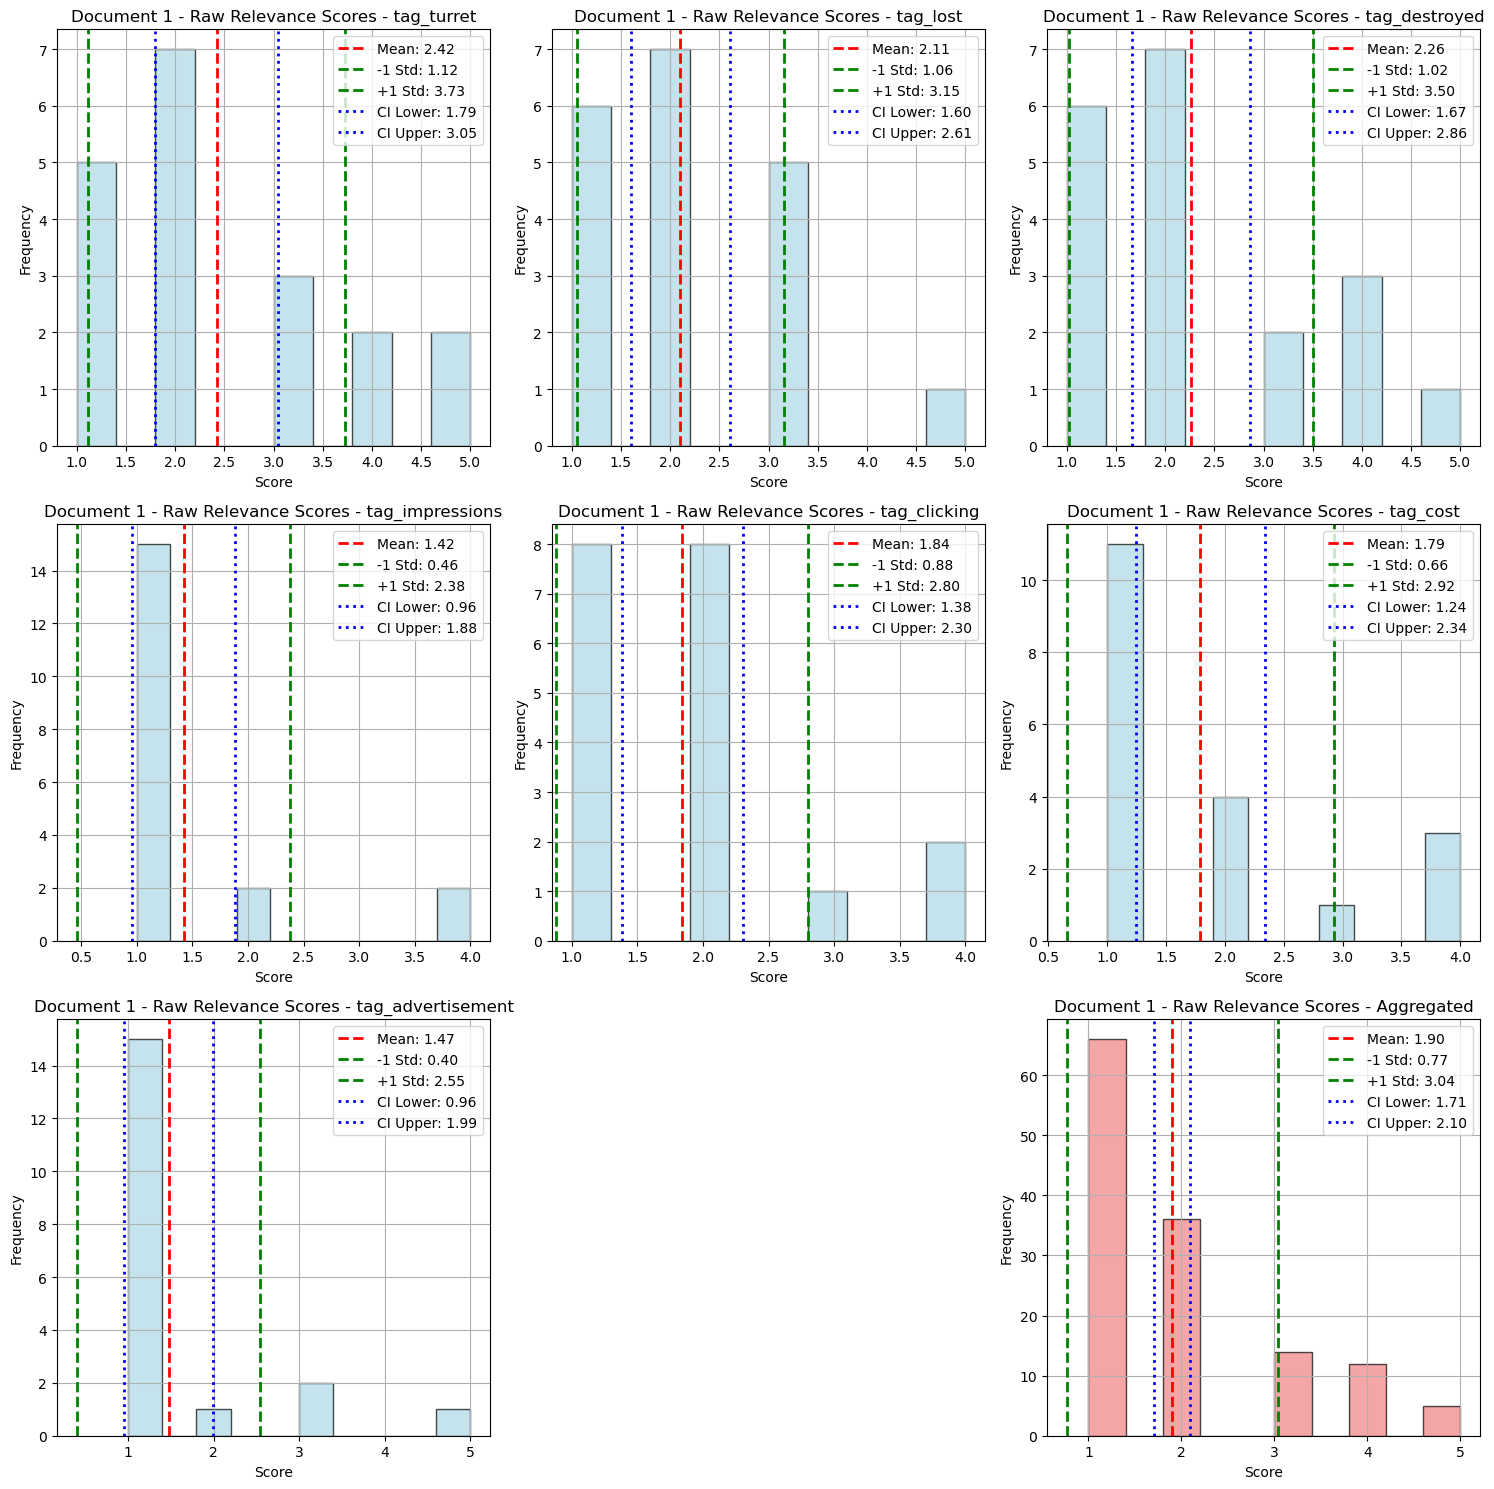

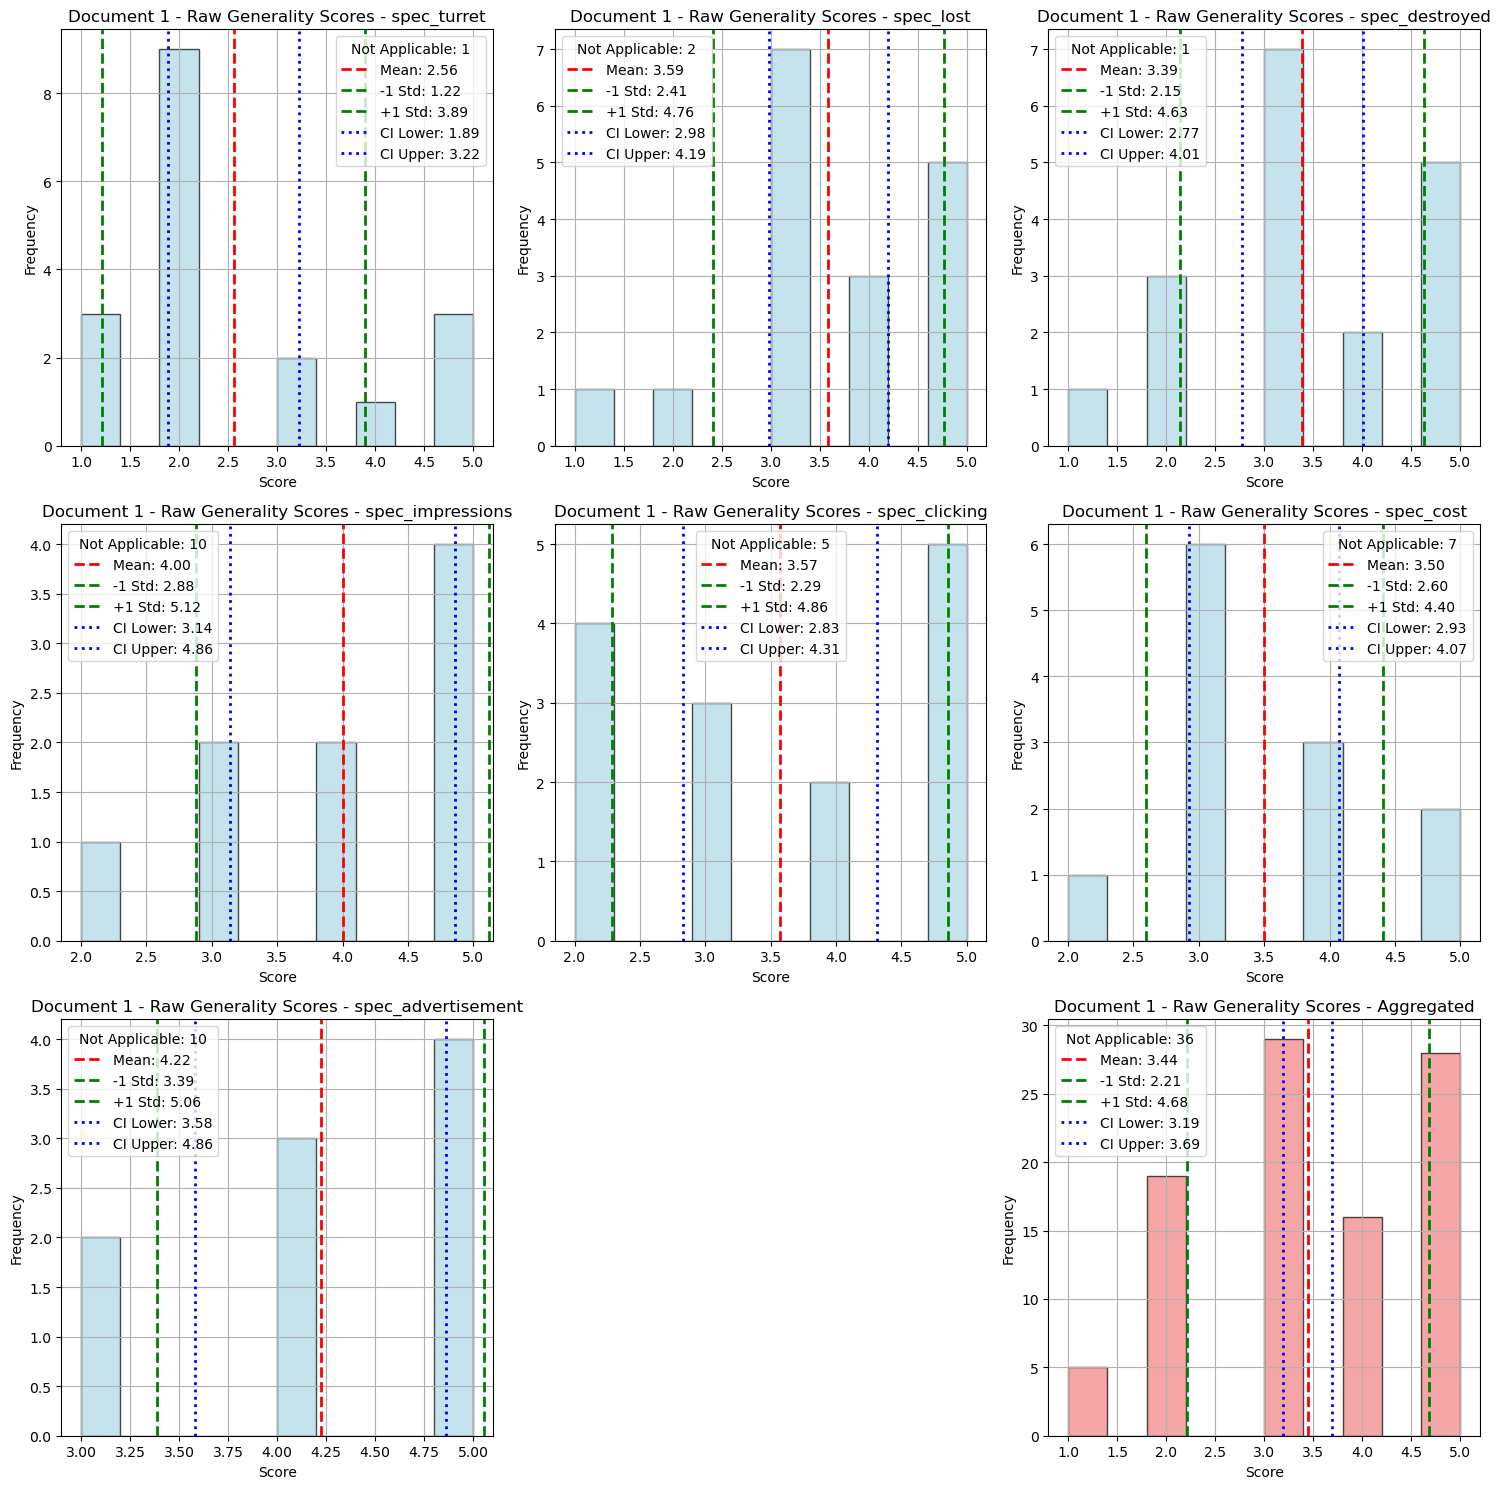

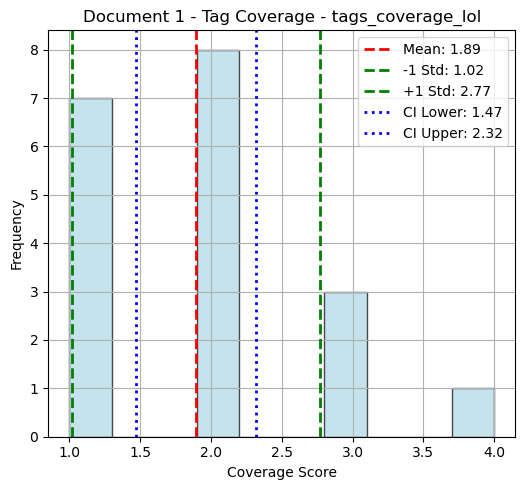

Correlation per Tag:
               Relevance vs Generality
turret                       -0.345033
lost                         -0.230561
destroyed                    -0.355856
impressions                  -0.709208
clicking                     -0.367280
cost                         -0.674794
advertisement                -0.161835

Overall Correlations:
         Relevance vs Generality
Overall                -0.471153


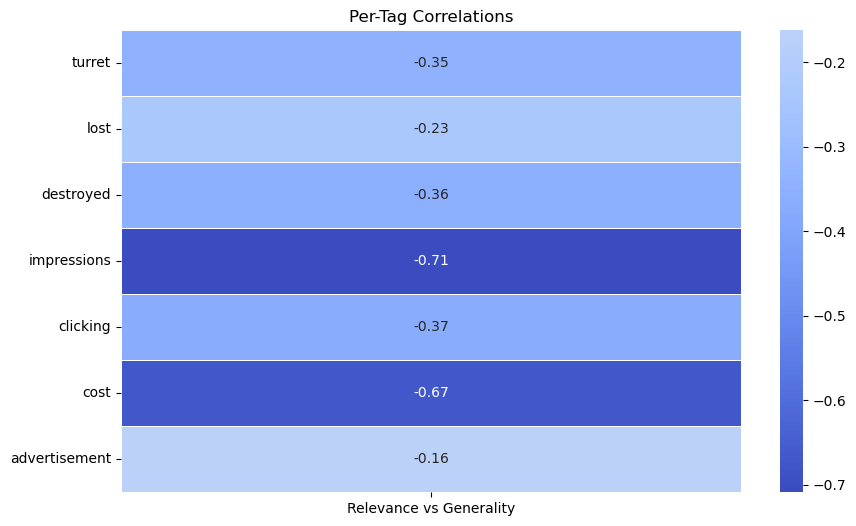

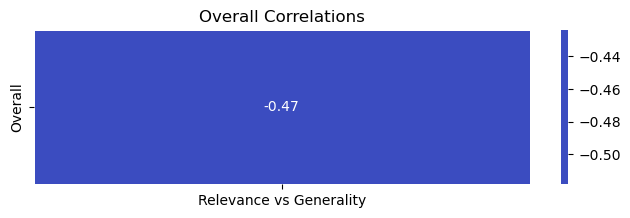


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_thyrotropin  tag_minute   tag_usd  tag_releasing  tag_high  \
std          0.535303    1.025978  1.164785       0.841191  1.342077   
min          1.000000    1.000000  2.000000       1.000000  1.000000   
max          3.000000    5.000000  5.000000       4.000000  5.000000   
mean         1.210526    3.052632  3.631579       1.526316  2.368421   

       tag_bid   tag_ask  
std   0.904828  0.970320  
min   1.000000  1.000000  
max   5.000000  4.000000  
mean  2.526316  2.052632  
Document 2 Generality Distribution:
      spec_thyrotropin  spec_minute  spec_usd  spec_releasing  spec_high  \
std                2.0     1.406102  1.397575        1.494434   1.236694   
min                1.0     1.000000  1.000000        2.000000   1.000000   
max                5.0     5.000000  5.000000        5.000000   5.000000   
mean               3.0     3.277778  2.789474        3.700000   3.823529   

      spec_bid  spec_a

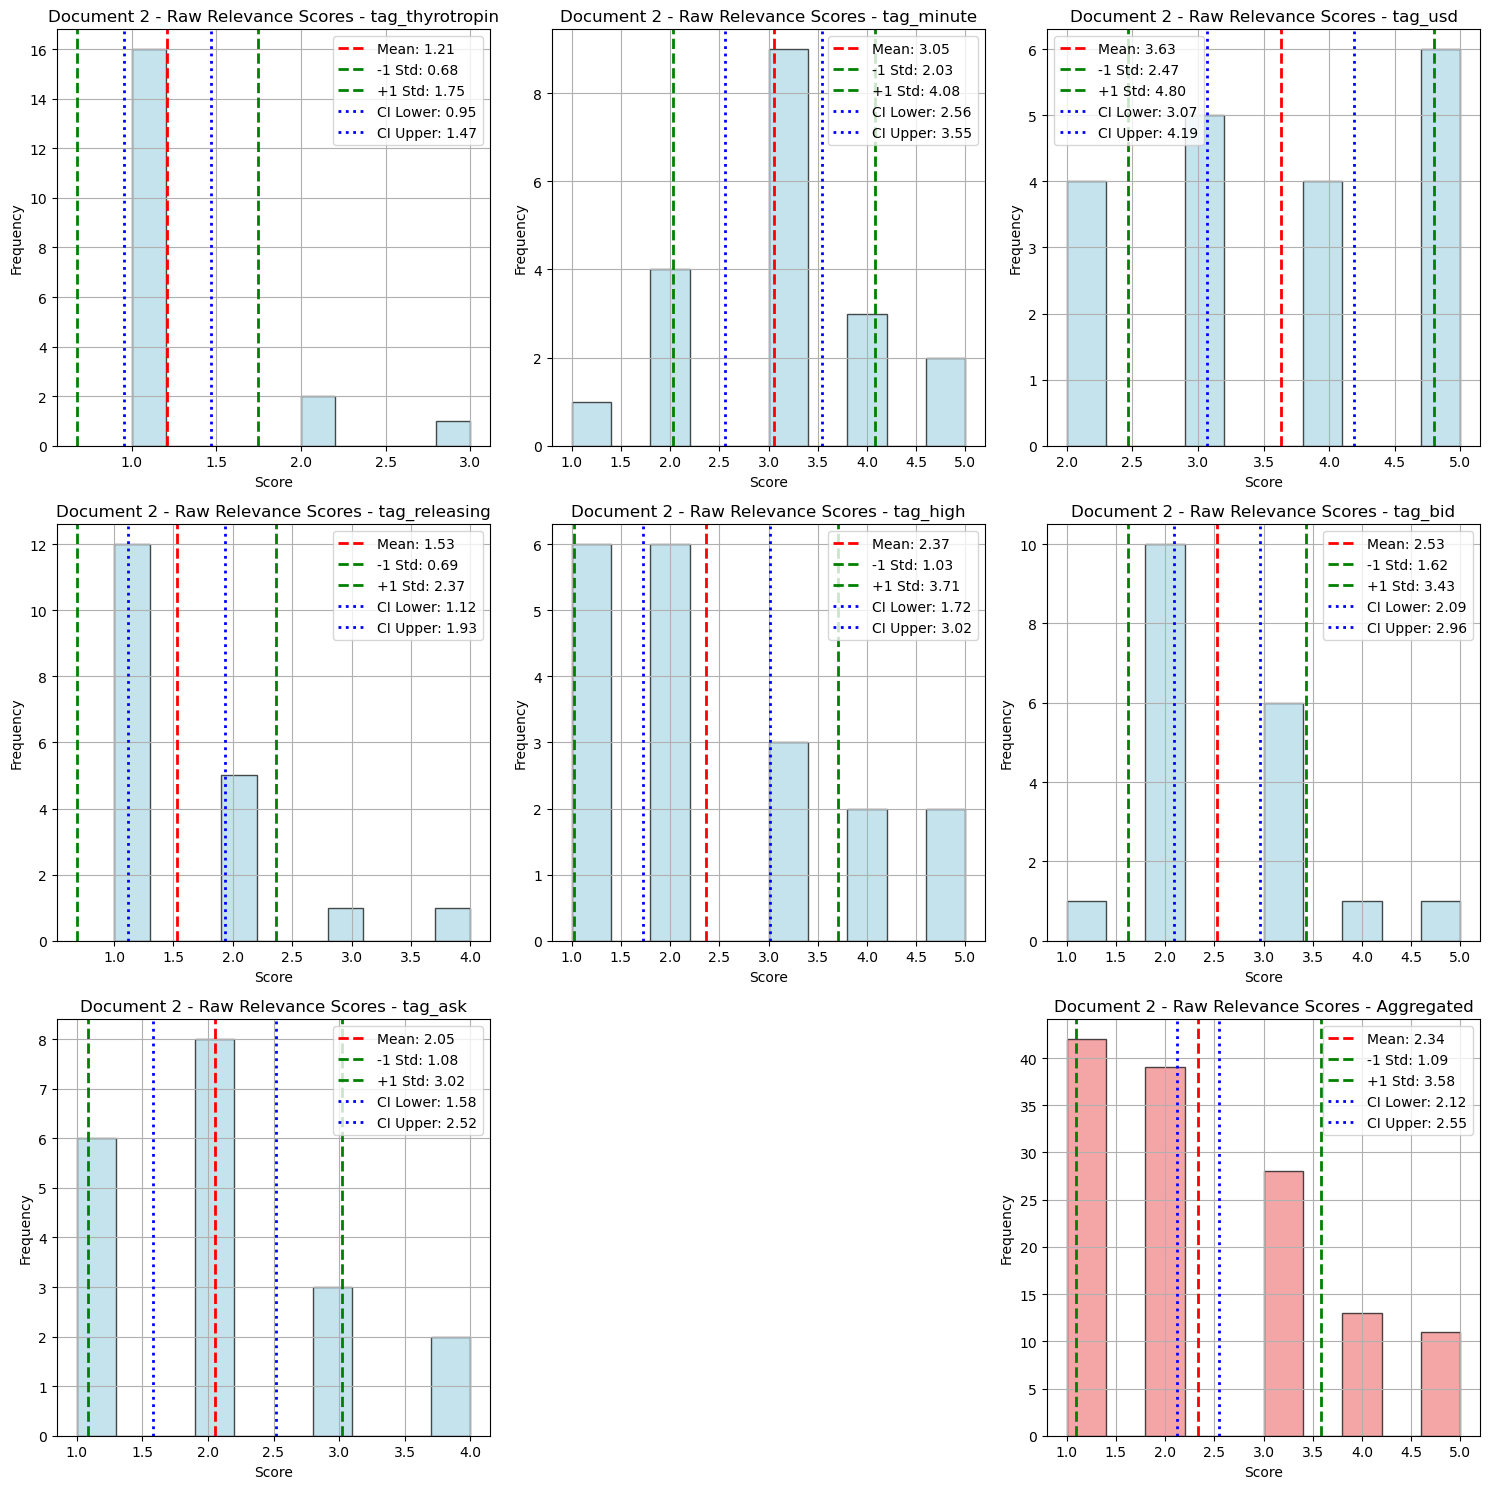

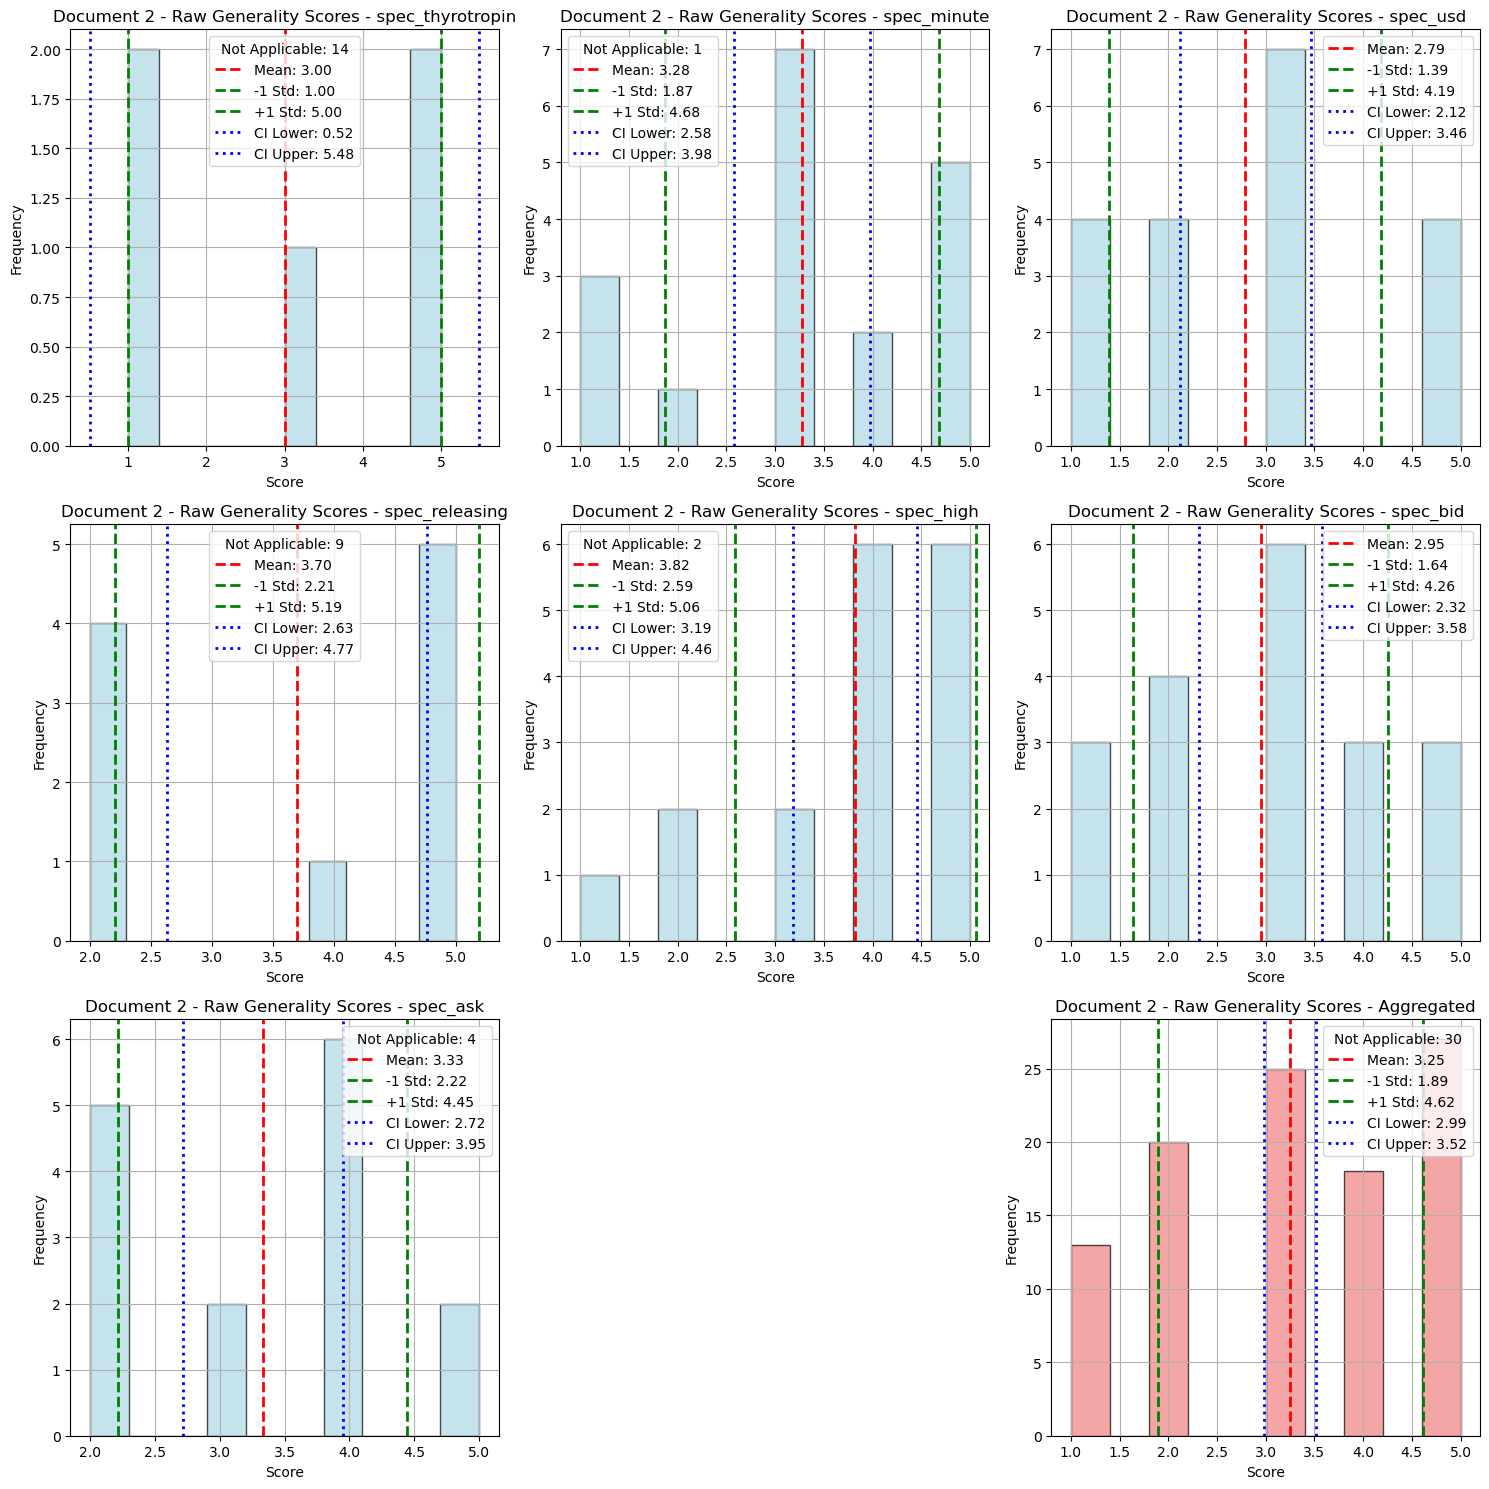

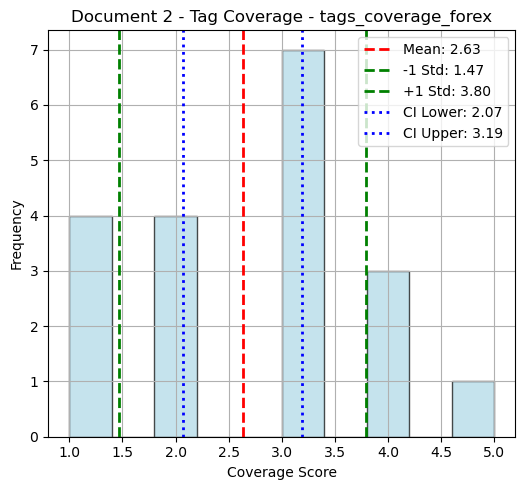

Correlation per Tag:
             Relevance vs Generality
thyrotropin                 0.000000
minute                     -0.414838
usd                        -0.534693
releasing                  -0.565351
high                       -0.550279
bid                        -0.609533
ask                        -0.601579

Overall Correlations:
         Relevance vs Generality
Overall                -0.621555


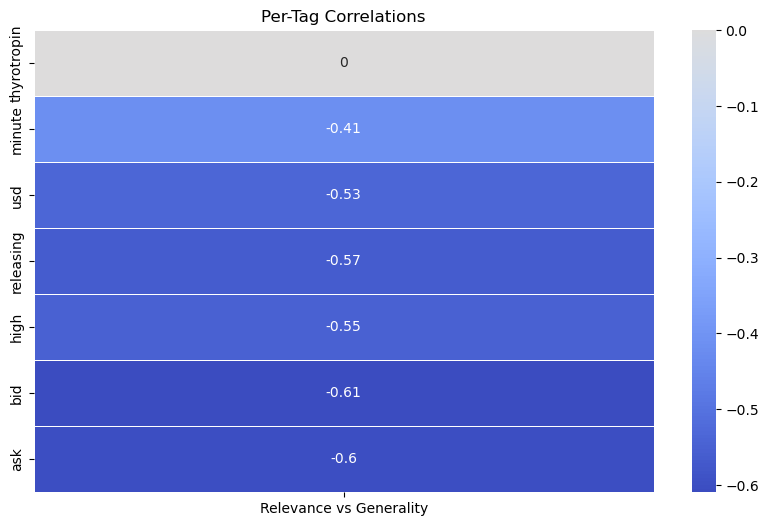

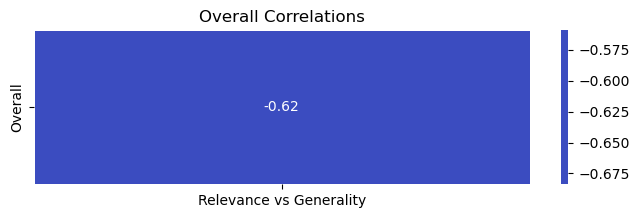


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_cancer  tag_microarray  tag_prostate  tag_ovarian  tag_gliomas  \
std     0.760886        1.397575      0.955134     0.772328     0.830698   
min     3.000000        1.000000      1.000000     1.000000     1.000000   
max     5.000000        5.000000      4.000000     4.000000     4.000000   
mean    4.368421        3.789474      1.631579     1.526316     1.631579   

      tag_lung  tag_genes  
std   0.911268   1.073334  
min   2.000000   1.000000  
max   5.000000   5.000000  
mean  4.052632   3.526316  
Document 3 Generality Distribution:
      spec_cancer  spec_microarray  spec_prostate  spec_ovarian  spec_gliomas  \
std      1.614988         1.144752       0.744024      0.744024      1.120065   
min      1.000000         1.000000       2.000000      2.000000      1.000000   
max      5.000000         4.000000       4.000000      4.000000      5.000000   
mean     2.947368         2.388889       2.625000     

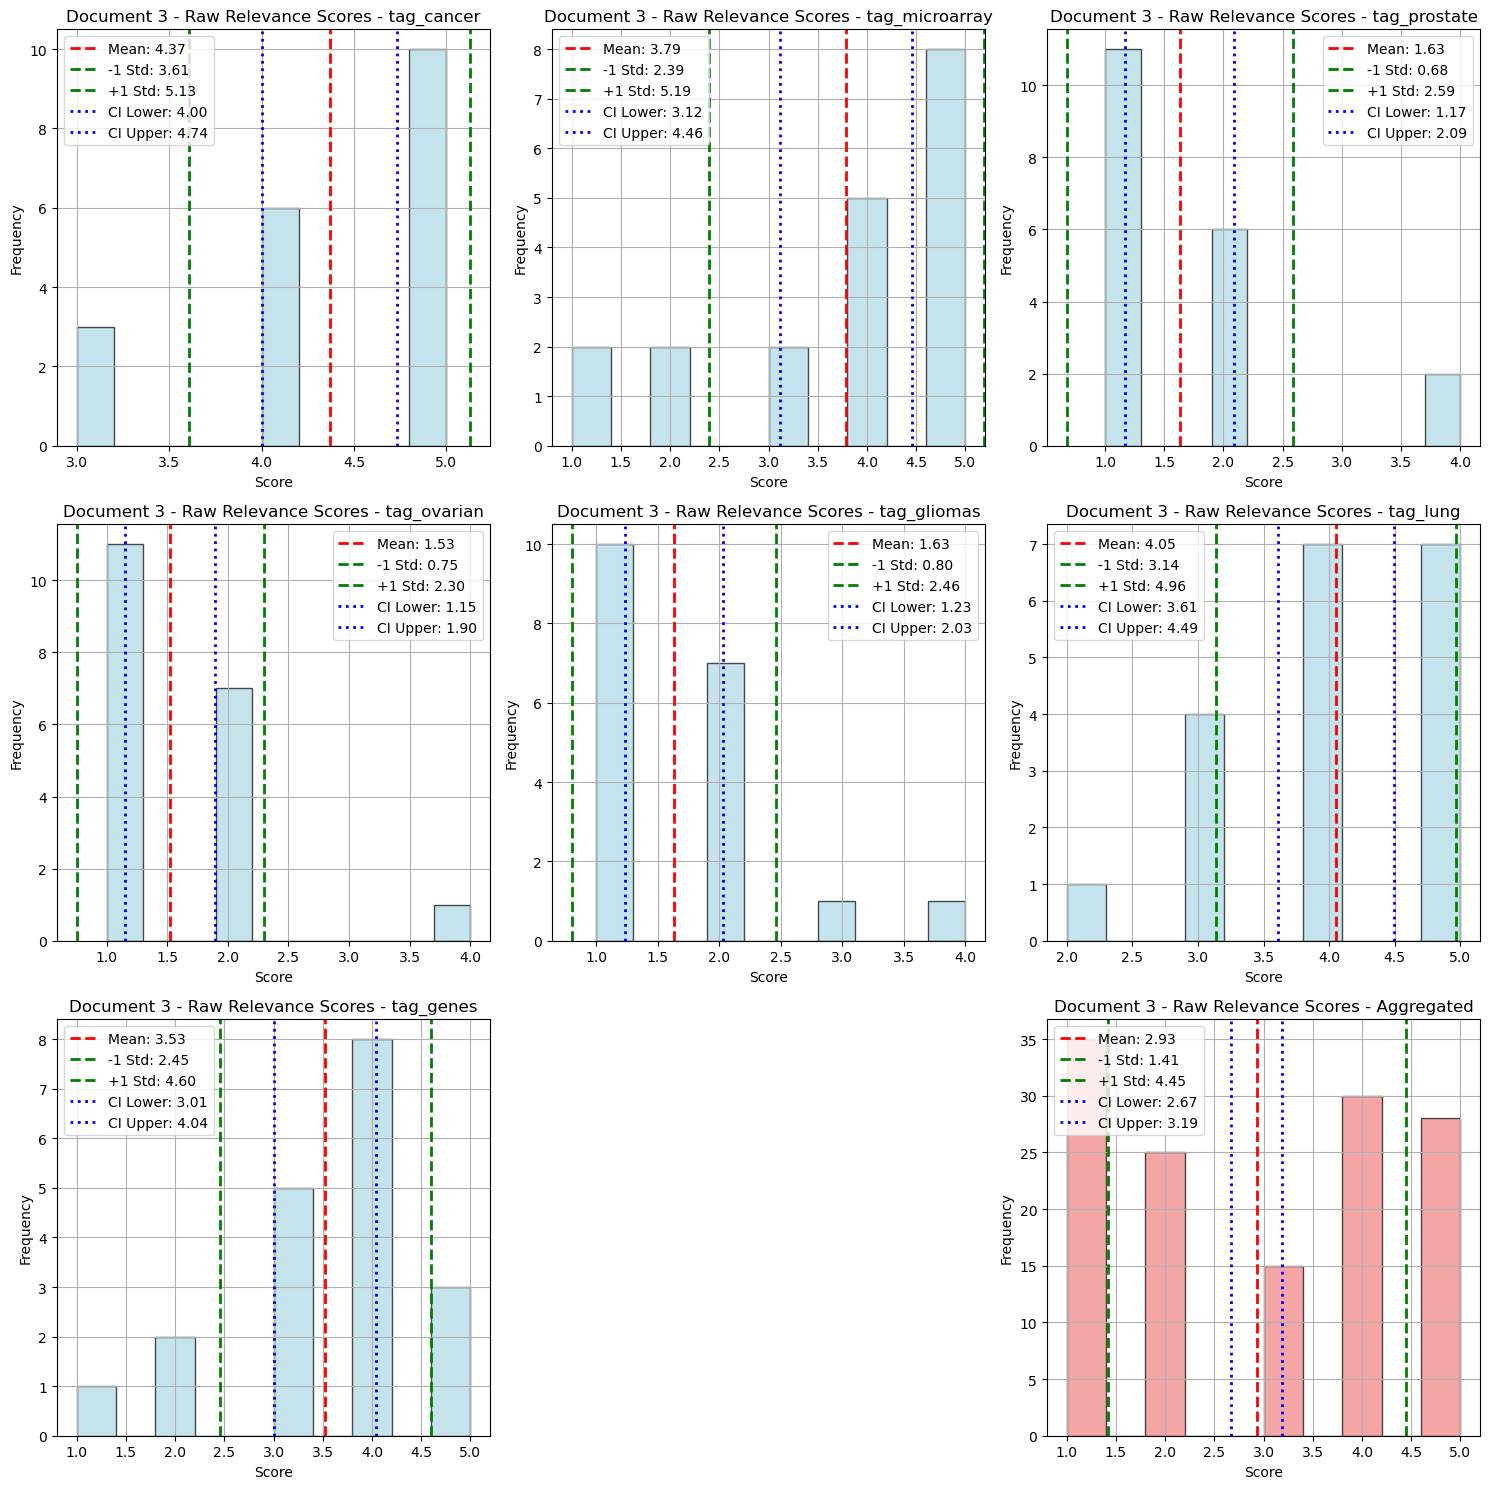

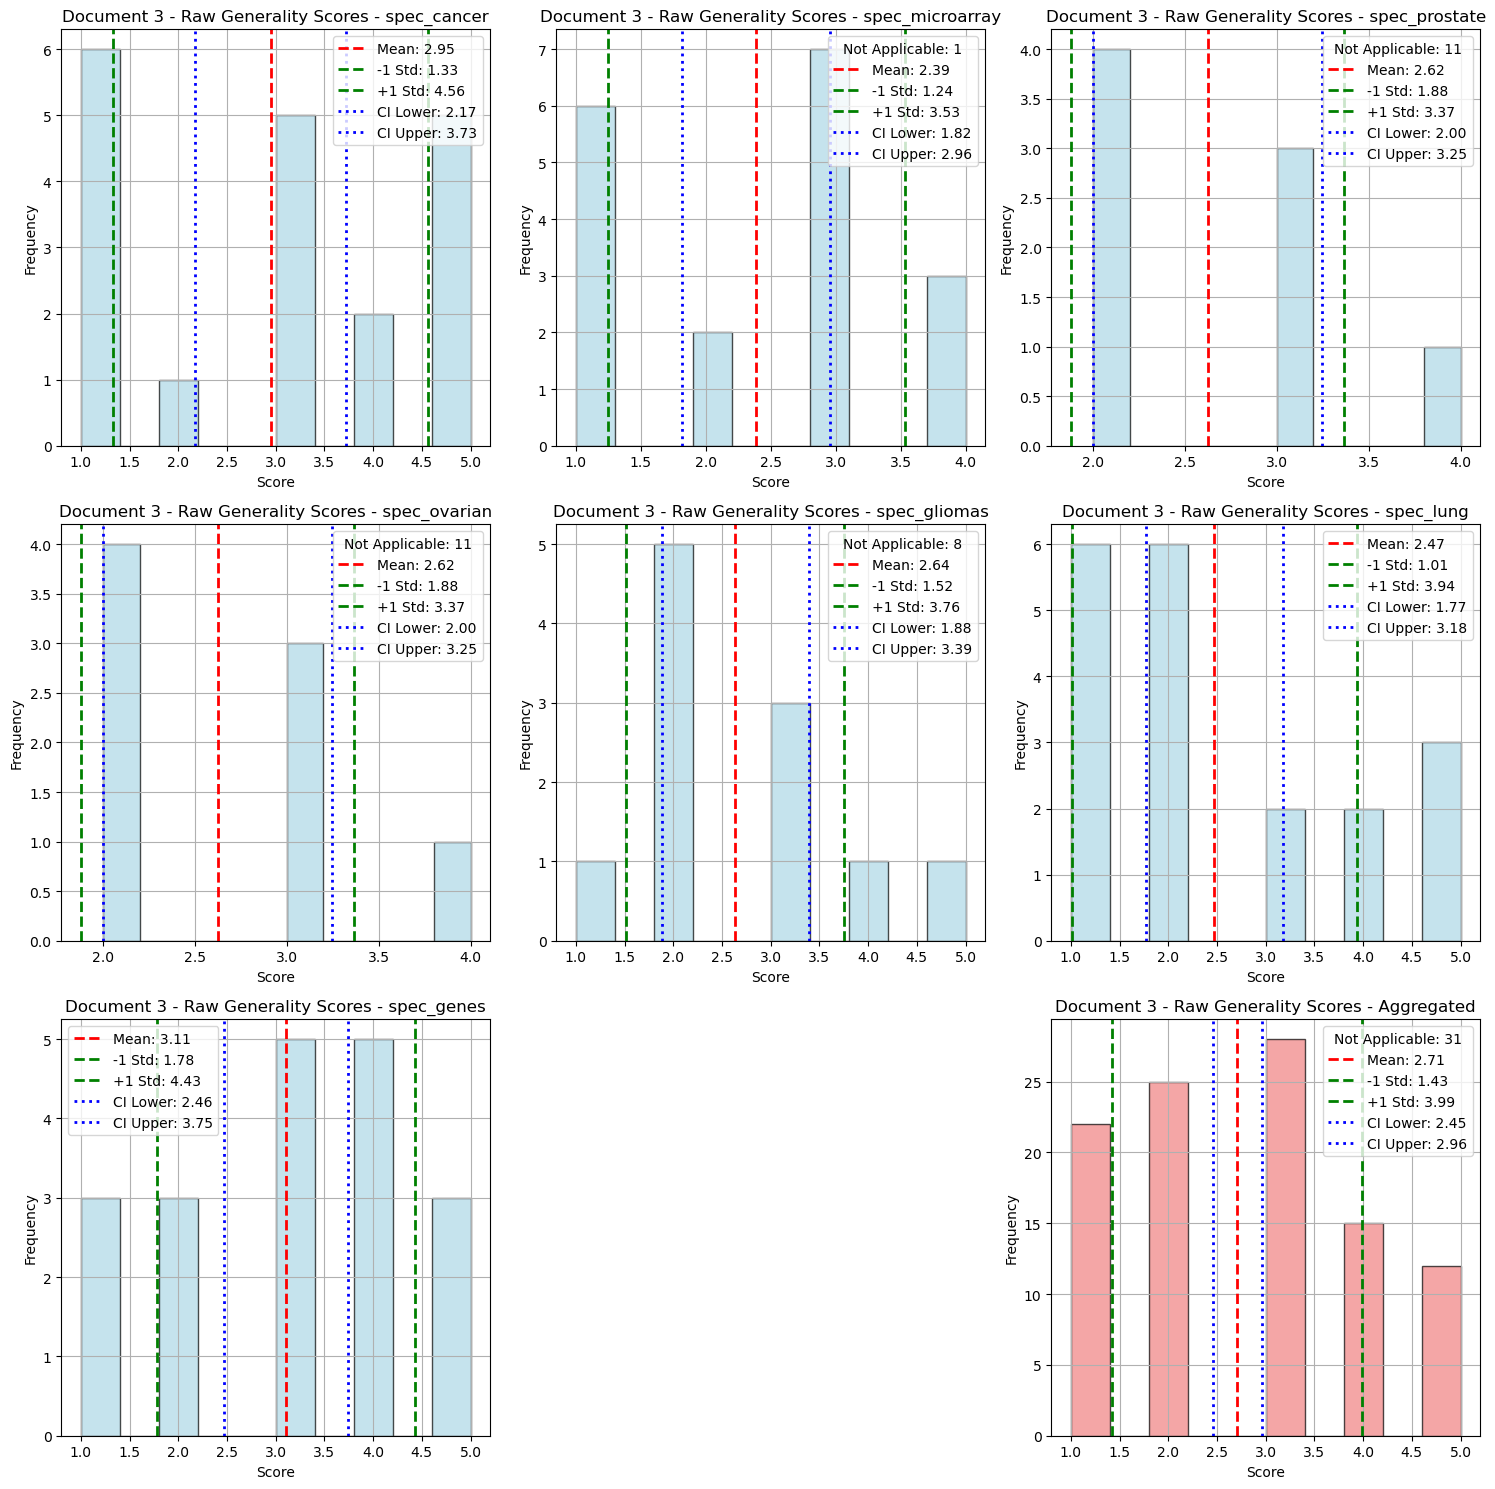

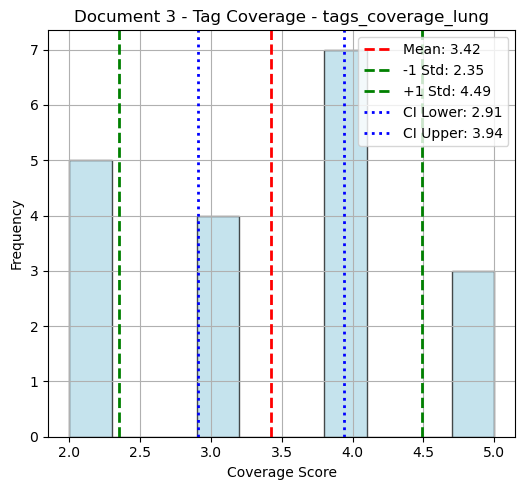

Correlation per Tag:
            Relevance vs Generality
cancer                     0.003006
microarray                -0.525354
prostate                  -0.552052
ovarian                   -0.361403
gliomas                   -0.486740
lung                      -0.417969
genes                     -0.558956

Overall Correlations:
         Relevance vs Generality
Overall                -0.467403


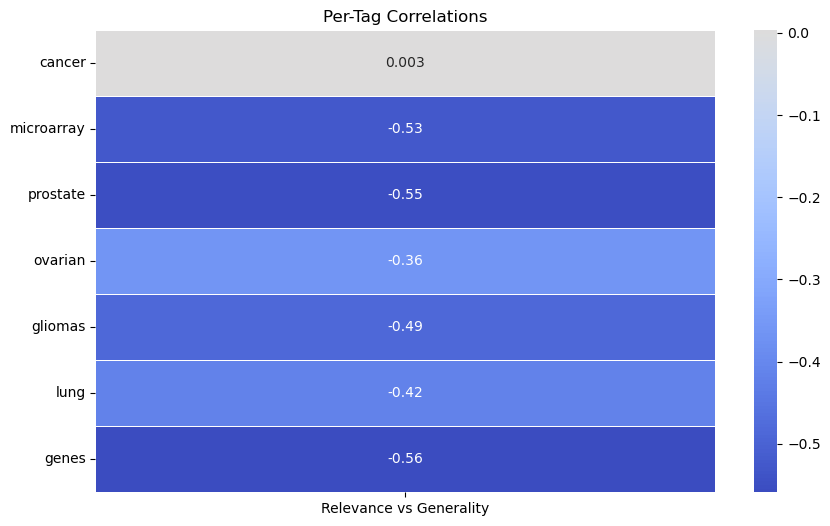

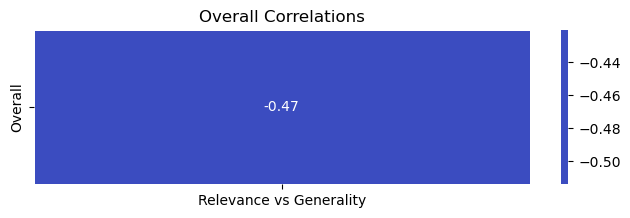

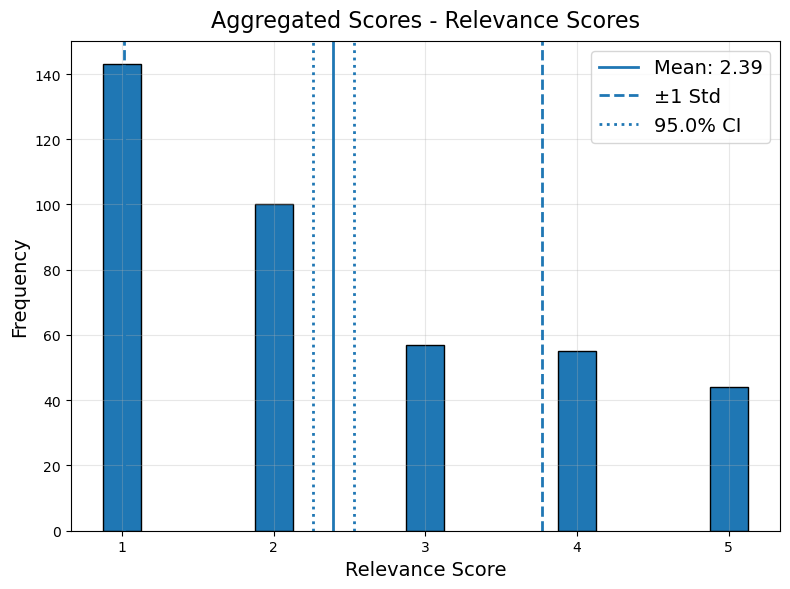

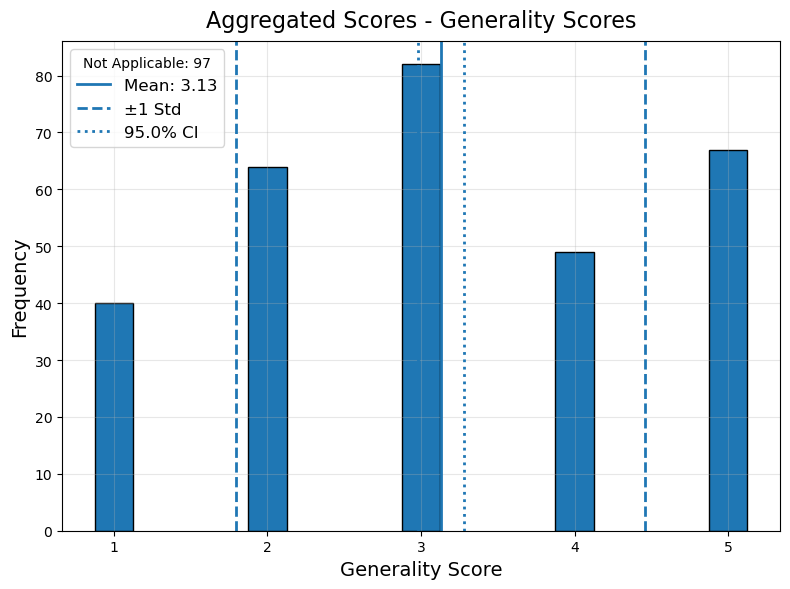

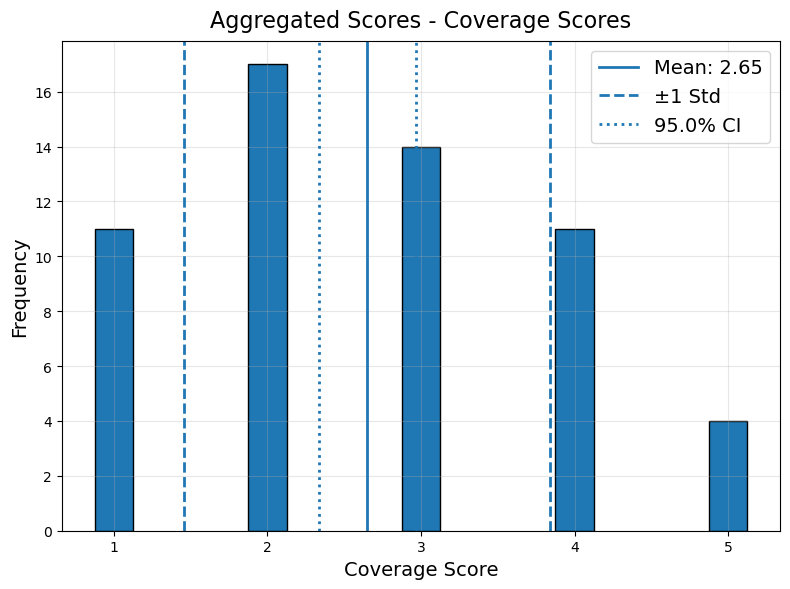


Aggregated Correlations (pandas):
            Relevance  Generality
Relevance    1.000000   -0.423295
Generality  -0.423295    1.000000


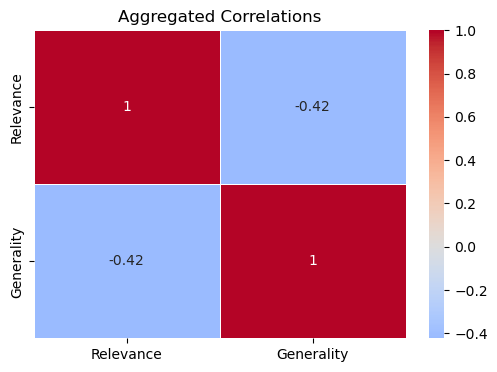

ICC for Relevance:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.451699  16.652478   20  378   
1   ICC2     Single random raters  0.457298  25.918281   20  360   
2   ICC3      Single fixed raters  0.567378  25.918281   20  360   
3  ICC1k  Average raters absolute  0.939949  16.652478   20  378   
4  ICC2k    Average random raters  0.941211  25.918281   20  360   
5  ICC3k     Average fixed raters  0.961417  25.918281   20  360   

           pval         CI95%  
0  1.683838e-40  [0.31, 0.64]  
1  1.177984e-57  [0.31, 0.65]  
2  1.177984e-57  [0.42, 0.74]  
3  1.683838e-40   [0.9, 0.97]  
4  1.177984e-57  [0.89, 0.97]  
5  1.177984e-57  [0.93, 0.98]


ICC for Generality:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.025137  0.534117    4   90  0.710984   
1   ICC2     Single random raters -0.000143  0.994927    4   72  0.416003   
2   ICC3      Single fixed raters -0.000267  0.994927    4   72  0.416003   
3  ICC1k  Average raters absolute -0.872249  0.534117    4   90  0.710984   
4  ICC2k    Average random raters -0.002731  0.994927    4   72  0.416003   
5  ICC3k     Average fixed raters -0.005099  0.994927    4   72  0.416003   

           CI95%  
0  [-0.04, 0.15]  
1  [-0.02, 0.17]  
2  [-0.04, 0.28]  
3  [-4.49, 0.78]  
4   [-0.56, 0.8]  
5  [-1.98, 0.88]


ICC for Coverage:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.325265  10.159213    2   54   
1   ICC2     Single random raters  0.337678  21.511364    2   36   
2   ICC3      Single fixed raters  0.519126  21.511364    2   36   
3  ICC1k  Average raters absolute  0.901567  10.159213    2   54   
4  ICC2k    Average random raters  0.906428  21.511364    2   36   
5  ICC3k     Average fixed raters  0.953513  21.511364    2   36   

           pval         CI95%  
0  1.798978e-04  [0.08, 0.95]  
1  7.143462e-07   [0.1, 0.95]  
2  7.143462e-07  [0.18, 0.98]  
3  1.798978e-04   [0.61, 1.0]  
4  7.143462e-07   [0.67, 1.0]  
5  7.143462e-07   [0.81, 1.0]


ICC for Shared Coverage:


Type              Description       ICC        F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.035001  1.68915    1   36  0.201974   
1   ICC2     Single random raters  0.060606  3.64557    1   18  0.072290   
2   ICC3      Single fixed raters  0.122222  3.64557    1   18  0.072290   
3  ICC1k  Average raters absolute  0.407986  1.68915    1   36  0.201974   
4  ICC2k    Average random raters  0.550725  3.64557    1   18  0.072290   
5  ICC3k     Average fixed raters  0.725694  3.64557    1   18  0.072290   

           CI95%  
0  [-0.04, 0.99]  
1  [-0.01, 0.99]  
2  [-0.02, 0.99]  
3   [-2.24, 1.0]  
4   [-0.18, 1.0]  
5   [-0.64, 1.0]


Fleiss' Kappa for Relevance: 0.1519
Fleiss' Kappa for Generality: -0.0164
Fleiss' Kappa for Coverage: 0.0270
Fleiss' Kappa for Shared Coverage: 0.0275

Krippendorff's Alpha for Relevance: 0.1687
Krippendorff's Alpha for Generality: 0.2863
Krippendorff's Alpha for Coverage: 0.2600
Krippendorff's Alpha for Shared Coverage: 0.4818


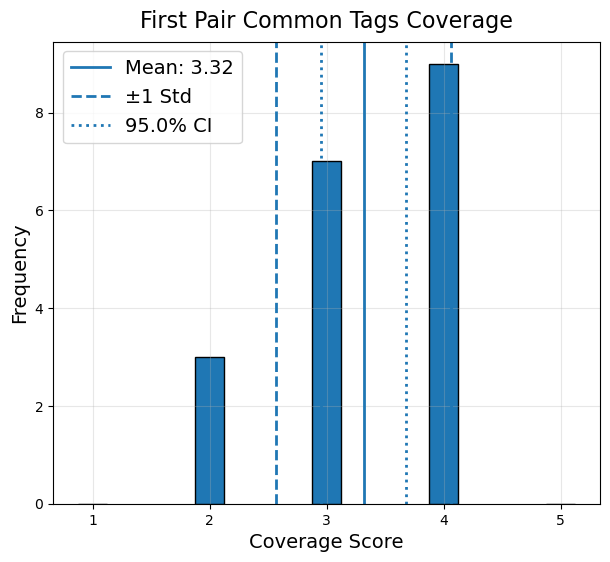

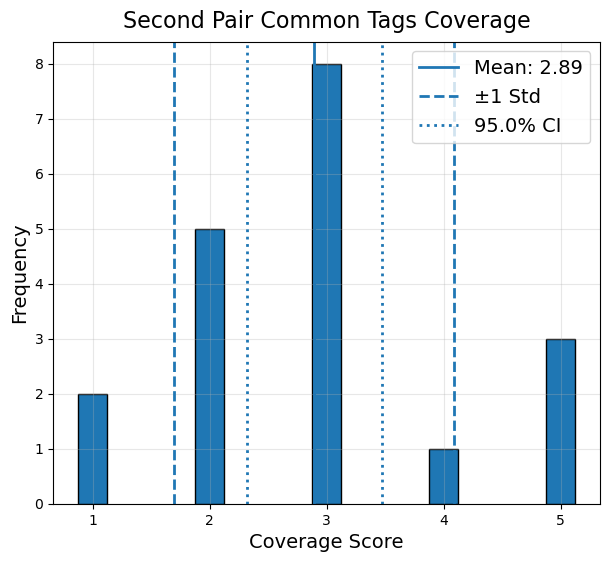


Metrics for First Pair Common Tags:
Accuracy: 0.69
Precision: 0.40
Recall: 0.47
Specificity: 0.76
F1-Score: 0.43

Metrics for Second Pair Common Tags:
Accuracy: 0.60
Precision: 1.00
Recall: 0.29
Specificity: 1.00
F1-Score: 0.45


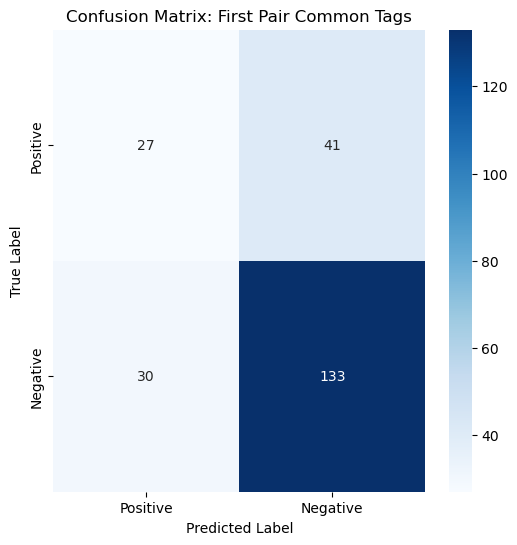

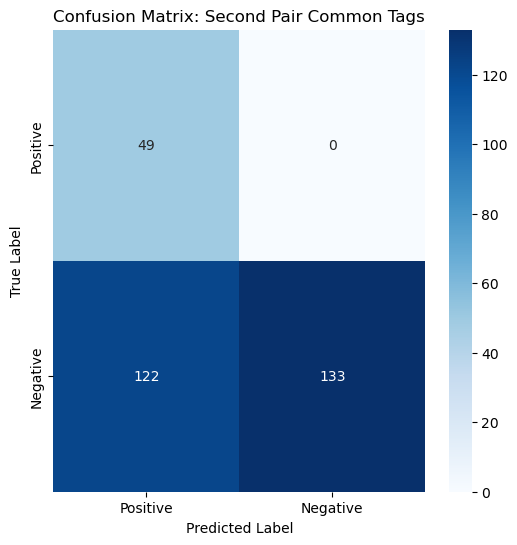

In [1076]:
analyze_tags(
    df_baseline_generated,
    relevance_columns_list=[
        baseline_first_document_relevance_columns, 
        baseline_second_document_relevance_columns,
        baseline_third_document_relevance_columns
    ],
    spec_columns_list=[
        baseline_first_document_spec_columns, 
        baseline_second_document_spec_columns,
        baseline_third_document_spec_columns
    ],
    coverage_columns_list=[
        baseline_first_document_coverage_columns, 
        baseline_second_document_coverage_columns,
        baseline_third_document_coverage_columns
    ],
    suggested_columns_list=[
        baseline_first_document_suggested_columns,
        baseline_second_document_suggested_columns,
        baseline_third_document_suggested_columns
    ],
    common_tags_columns_1=baseline_first_pair_common_tags_columns,
    common_tags_true_tags_1=baseline_first_pair_common_tags_true_tags,
    common_tags_coverage_1=baseline_first_pair_coverage_columns,
    common_tags_columns_2=baseline_second_pair_common_tags_columns,
    common_tags_true_tags_2=baseline_second_pair_common_tags_true_tags,
    common_tags_coverage_2=baseline_second_pair_coverage_columns,
    save_path_aggregated="../../latex/thesis/figures/tags_analysis_baseline.pdf",
    save_path_correlations="../../latex/thesis/figures/tags_correlations_baseline.pdf",
    save_path_first_pair_coverage="../../latex/thesis/figures/first_pair_common_tags_coverage_baseline.pdf",
    save_path_second_pair_coverage="../../latex/thesis/figures/second_pair_common_tags_coverage_baseline.pdf",
    save_path_first_pair_confusion_matrix="../../latex/thesis/figures/first_pair_common_tags_confusion_matrix_baseline.pdf",
    save_path_second_pair_confusion_matrix="../../latex/thesis/figures/second_pair_common_tags_confusion_matrix_baseline.pdf"
)

In [1077]:
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [1078]:
def calculate_stats(data, confidence_level=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    if n > 1:
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
    else:
        ci_lower, ci_upper = mean, mean
    
    return mean, std, ci_lower, ci_upper

def plot_relevance_specificity_multiple_documents(df, doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names, save_path=None):
    """
    This function plots relevance and specificity by tag type (regular and overarching) for multiple documents.
    It also accumulates data for all documents and plots the cumulative result at the end.
    """
    
    cumulative_data = {
        'regular_relevance': [],
        'overarching_relevance': [],
        'regular_spec': [],
        'overarching_spec': []
    }
    
    for i, (relevance_columns, spec_columns, tag_types, document_name) in enumerate(zip(doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names)):
        
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        regular_relevance_cols = tag_types['regular']
        overarching_relevance_cols = tag_types['overarching']

        regular_spec_cols = [spec_columns[relevance_columns.index(col)] for col in regular_relevance_cols]
        overarching_spec_cols = [spec_columns[relevance_columns.index(col)] for col in overarching_relevance_cols]

        regular_relevance = df[regular_relevance_cols].values.flatten()
        overarching_relevance = df[overarching_relevance_cols].values.flatten()

        regular_spec = df[regular_spec_cols].values.flatten()
        overarching_spec = df[overarching_spec_cols].values.flatten()

        cumulative_data['regular_relevance'].extend(regular_relevance)
        cumulative_data['overarching_relevance'].extend(overarching_relevance)
        cumulative_data['regular_spec'].extend(regular_spec)
        cumulative_data['overarching_spec'].extend(overarching_spec)

        # Plotting
        fig1 = plt.figure(figsize=(8, 6))
        ax1 = fig1.add_subplot(111)
        
        fig2 = plt.figure(figsize=(8, 6))
        ax2 = fig2.add_subplot(111)
        
        # Colors and labels
        colors = ["#1f77b4", "#ff7f0e"]
        labels = ['Regular Tags', 'Overarching Tags']
        bar_width = 0.25
        
        # Relevance Plot
        for idx, (data, color, label) in enumerate(zip([regular_relevance, overarching_relevance], colors, labels)):
            mean, std, ci_lower, ci_upper = calculate_stats(data)
            
            bins = np.arange(0.5 + (idx-1)*bar_width, 6.5 + (idx-1)*bar_width, 1)
            ax1.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7, label=label, rwidth=bar_width)
            
            ax1.axvline(mean, color=color, linestyle='solid', linewidth=2, 
                       label=f'{label} Mean: {mean:.2f}')
            ax1.axvline(mean - std, color=color, linestyle='dashed', linewidth=2, 
                       label=f'{label} ±1 Std')
            ax1.axvline(mean + std, color=color, linestyle='dashed', linewidth=2)
            ax1.axvline(ci_lower, color=color, linestyle='dotted', linewidth=2, 
                       label=f'{label} 95% CI')
            ax1.axvline(ci_upper, color=color, linestyle='dotted', linewidth=2)

        ax1.set_title(f'{document_name} - Relevance Scores by Tag Type', fontsize=16, pad=10)
        ax1.set_xlabel('Relevance Score', fontsize=14)
        ax1.set_ylabel('Frequency', fontsize=14)
        ax1.grid(True, alpha=0.3)
        ax1.legend(fontsize=14)
        ax1.set_xticks(range(1, 6))

        # Specificity Plot
        for idx, (data, color, label) in enumerate(zip([regular_spec, overarching_spec], colors, labels)):
            mean, std, ci_lower, ci_upper = calculate_stats(data)
            
            bins = np.arange(0.5 + (idx-1)*bar_width, 6.5 + (idx-1)*bar_width, 1)
            ax2.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7, label=label, rwidth=bar_width)
            
            ax2.axvline(mean, color=color, linestyle='solid', linewidth=2, 
                       label=f'{label} Mean: {mean:.2f}')
            ax2.axvline(mean - std, color=color, linestyle='dashed', linewidth=2, 
                       label=f'{label} ±1 Std')
            ax2.axvline(mean + std, color=color, linestyle='dashed', linewidth=2)
            ax2.axvline(ci_lower, color=color, linestyle='dotted', linewidth=2, 
                       label=f'{label} 95% CI')
            ax2.axvline(ci_upper, color=color, linestyle='dotted', linewidth=2)

        ax2.set_title(f'{document_name} - Generality Scores by Tag Type', fontsize=16, pad=10)
        ax2.set_xlabel('Generality Score', fontsize=14)
        ax2.set_ylabel('Frequency', fontsize=14)
        ax2.grid(True, alpha=0.3)
        ax2.legend(fontsize=14)
        ax2.set_xticks(range(1, 6))

        plt.show()

    plot_cumulative_relevance_specificity(cumulative_data, save_path)

def plot_cumulative_relevance_specificity(cumulative_data, save_path=None):
    """
    This function plots the cumulative relevance and specificity scores for all documents combined.
    """
    
    fig1 = plt.figure(figsize=(8, 6))
    ax1 = fig1.add_subplot(111)
    
    fig2 = plt.figure(figsize=(8, 6))
    ax2 = fig2.add_subplot(111)
    
    # Colors and labels
    colors = ["#1f77b4", "#ff7f0e"]
    labels = ['Regular Tags', 'Overarching Tags']
    bar_width = 0.25

    # Relevance Plot
    for idx, (data, color, label) in enumerate(zip([cumulative_data['regular_relevance'], 
                                                   cumulative_data['overarching_relevance']], 
                                                  colors, labels)):
        mean, std, ci_lower, ci_upper = calculate_stats(data)
        
        bins = np.arange(0.5 + (idx-1)*bar_width, 6.5 + (idx-1)*bar_width, 1)
        ax1.hist(data, bins=bins, color=color, edgecolor='black', label=label, rwidth=bar_width)
        
        ax1.axvline(mean, color=color, linestyle='solid', linewidth=2, 
                   label=f'{label} Mean: {mean:.2f}')
        ax1.axvline(mean - std, color=color, linestyle='dashed', linewidth=2, 
                   label=f'{label} ±1 Std')
        ax1.axvline(mean + std, color=color, linestyle='dashed', linewidth=2)
        ax1.axvline(ci_lower, color=color, linestyle='dotted', linewidth=2, 
                   label=f'{label} 95% CI')
        ax1.axvline(ci_upper, color=color, linestyle='dotted', linewidth=2)

    ax1.set_title('Aggregated - Relevance Scores by Tag Type', fontsize=16, pad=10)
    ax1.set_xlabel('Relevance Score', fontsize=14)
    ax1.set_ylabel('Frequency', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=14)
    ax1.set_xticks(range(1, 6))

    # Specificity Plot
    for idx, (data, color, label) in enumerate(zip([cumulative_data['regular_spec'], 
                                                   cumulative_data['overarching_spec']], 
                                                  colors, labels)):
        mean, std, ci_lower, ci_upper = calculate_stats(data)
        
        bins = np.arange(0.5 + (idx-1)*bar_width, 6.5 + (idx-1)*bar_width, 1)
        ax2.hist(data, bins=bins, color=color, edgecolor='black', label=label, rwidth=bar_width)
        
        ax2.axvline(mean, color=color, linestyle='solid', linewidth=2, 
                   label=f'{label} Mean: {mean:.2f}')
        ax2.axvline(mean - std, color=color, linestyle='dashed', linewidth=2, 
                   label=f'{label} ±1 Std')
        ax2.axvline(mean + std, color=color, linestyle='dashed', linewidth=2)
        ax2.axvline(ci_lower, color=color, linestyle='dotted', linewidth=2, 
                   label=f'{label} 95% CI')
        ax2.axvline(ci_upper, color=color, linestyle='dotted', linewidth=2)

    ax2.set_title('Aggregated - Generality Scores by Tag Type', fontsize=16, pad=10)
    ax2.set_xlabel('Generality Score', fontsize=14)
    ax2.set_ylabel('Frequency', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=14)
    ax2.set_xticks(range(1, 6))

    if save_path:
        fig1.savefig(save_path.replace('.pdf', '_relevance.pdf'), format='pdf', bbox_inches='tight')
        fig2.savefig(save_path.replace('.pdf', '_generality.pdf'), format='pdf', bbox_inches='tight')
    plt.show()

In [1079]:
human_first_document_relevance_columns = ['tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena']
human_first_document_spec_columns = ['spec_lol', 'spec_video_games', 'spec_multiplayer', 'spec_game_data', 'spec_riot_api', 'spec_battle_arena']
human_first_document_coverage_columns = ['tags_coverage_lol']
human_first_document_suggested_columns = ['suggested_tags_lol']
human_first_document_tag_types = {
    'regular': ['tag_lol', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena'],
    'overarching': ['tag_video_games']
}

human_second_document_relevance_columns = ['tag_hist_price', 'tag_forex', 'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high']
human_second_document_spec_columns = ['spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs', 'spec_yearly_data', 'spec_finance', 'spec_minute_high']
human_second_document_coverage_columns = ['tags_coverage_forex']
human_second_document_suggested_columns = ['suggested_tags_forex']
human_second_document_tag_types = {
    'regular': ['tag_hist_price', 'tag_usd_jpy', 'tag_yearly_data', 'tag_minute_high'],
    'overarching': ['tag_forex', 'tag_currency_pairs', 'tag_finance']
}

human_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr']
human_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology', 'spec_carcinomas', 'spec_gene_expr']
human_third_document_coverage_columns = ['tags_coverage_lung']
human_third_document_suggested_columns = ['suggested_tags_lung']
human_third_document_tag_types = {
    'regular': ['tag_lung_cancer', 'tag_mrna_prof', 'tag_carcinomas', 'tag_gene_expr'],
    'overarching': ['tag_cancer', 'tag_oncology', 'tag_biology']
}

human_first_pair_common_tags_columns = ['common_tags1']
human_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
human_first_pair_coverage_columns = ['common_tags_coverage1']

human_second_pair_common_tags_columns = ['common_tags2']
human_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Film Information"]
human_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
       tag_lol  tag_video_games  tag_multiplayer  tag_game_data  tag_riot_api  \
std   0.685994         1.131833         0.998365       0.766965      0.998365   
min   3.000000         2.000000         2.000000       3.000000      2.000000   
max   5.000000         5.000000         5.000000       5.000000      5.000000   
mean  4.666667         4.111111         3.944444       4.333333      4.055556   

      tag_battle_arena  
std           1.127494  
min           1.000000  
max           5.000000  
mean          3.277778  
Document 1 Generality Distribution:
      spec_lol  spec_video_games  spec_multiplayer  spec_game_data  \
std   0.840168          0.848875          0.951006        1.078610   
min   1.000000          3.000000          2.000000        2.000000   
max   3.000000          5.000000          5.000000        5.000000   
mean  1.666667          4.294118          3.823529        3.111111   

      spec_riot_a

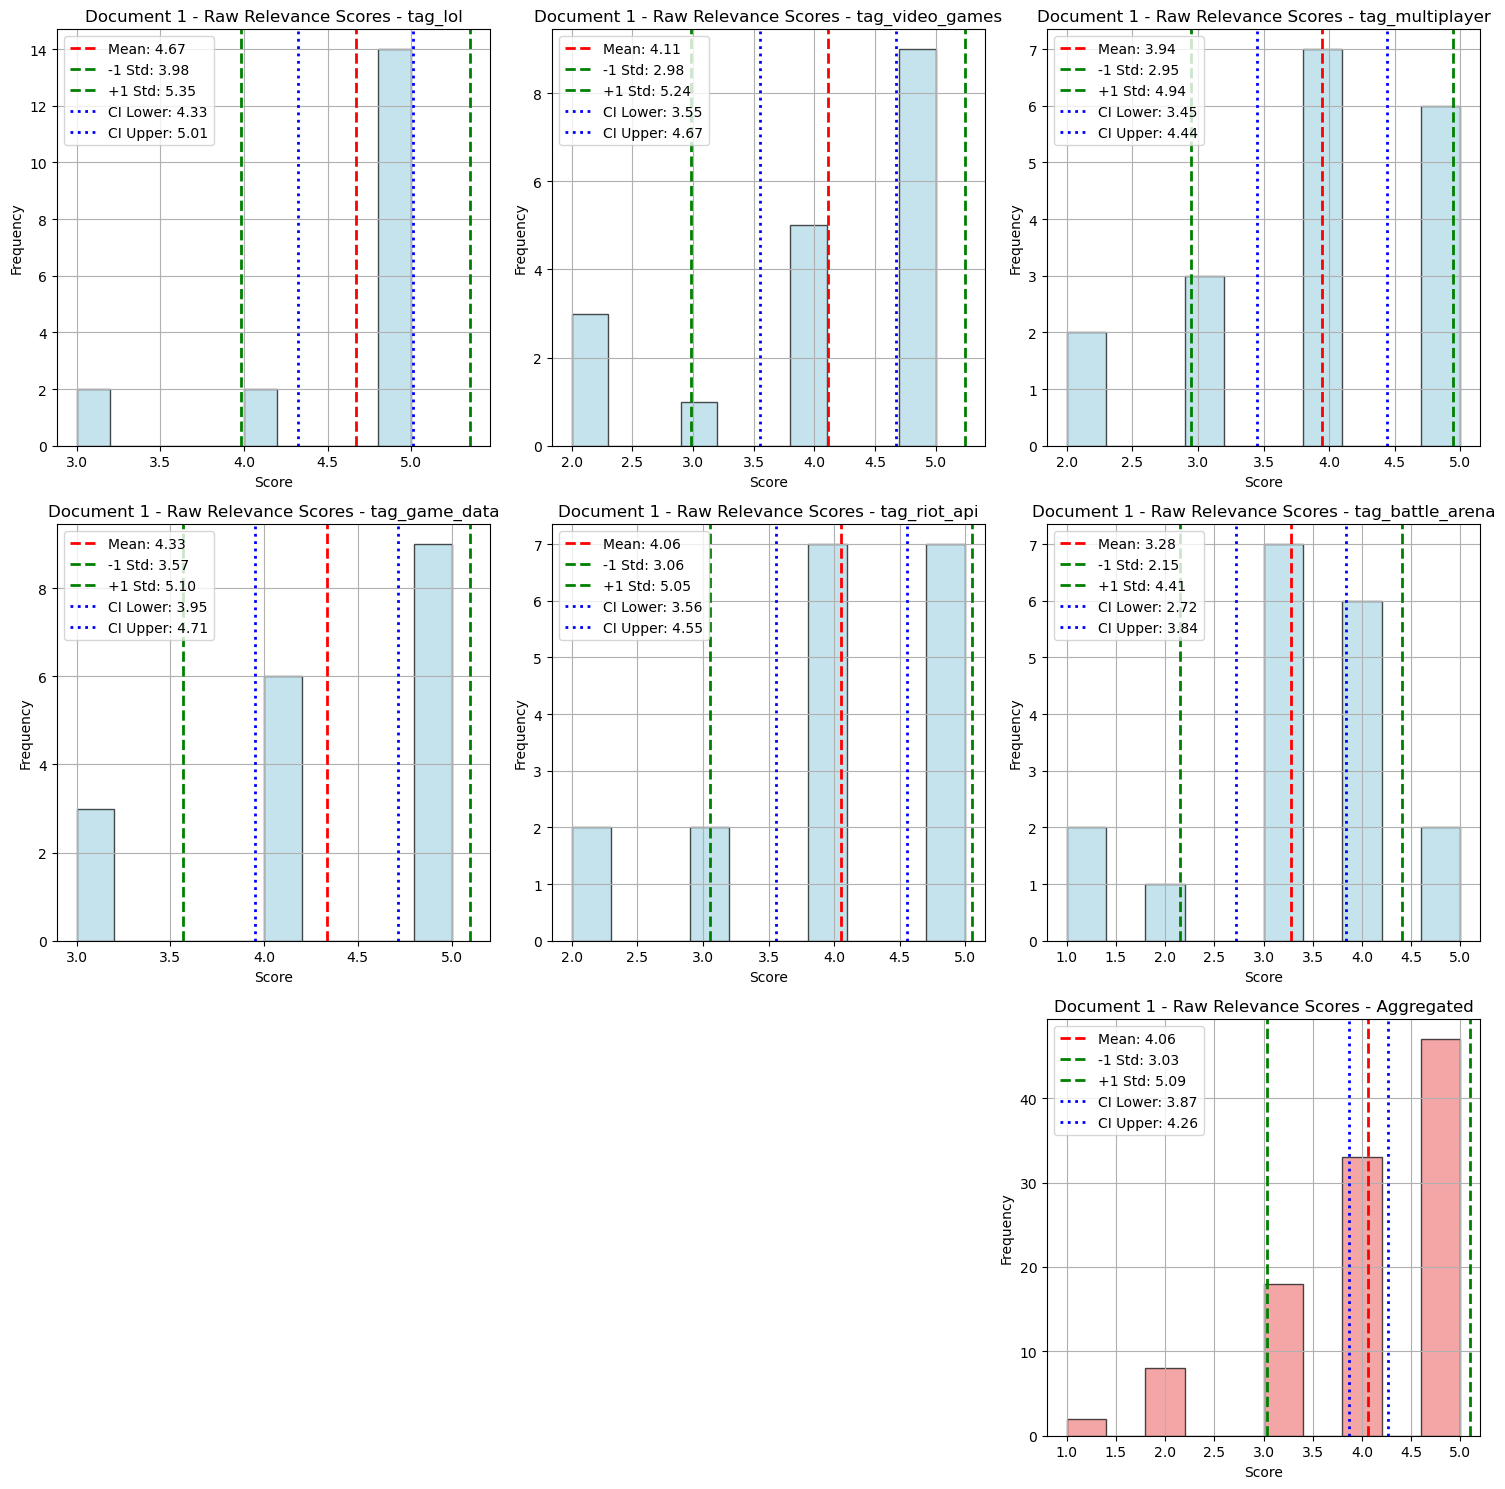

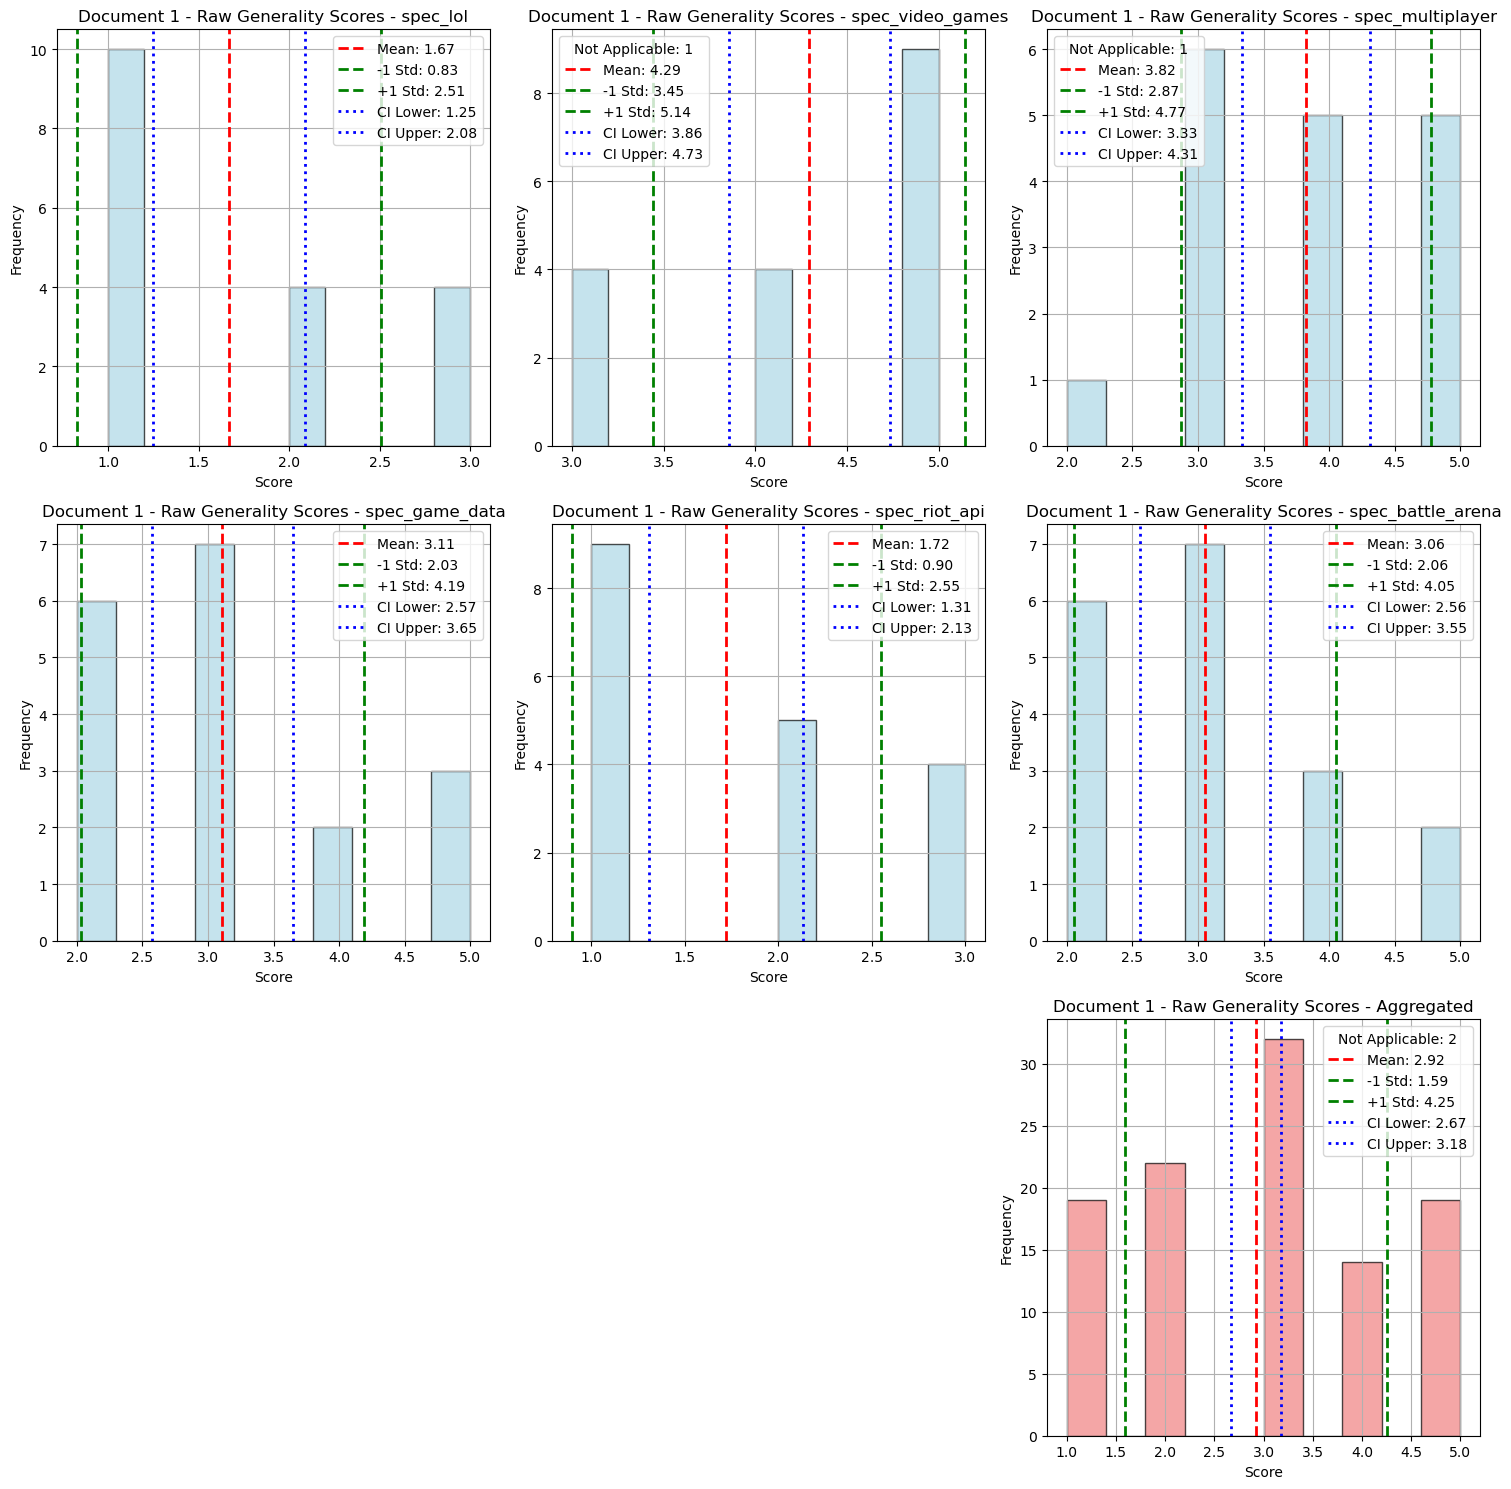

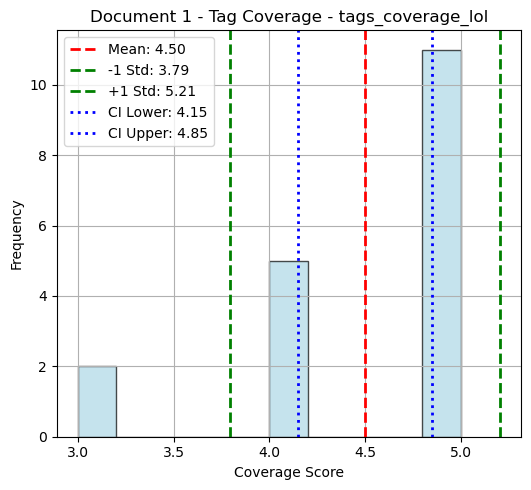

Correlation per Tag:
             Relevance vs Generality
lol                         0.277792
video                       0.519615
multiplayer                 0.112870
game                        0.426324
riot                       -0.048996
battle                     -0.315038

Overall Correlations:
         Relevance vs Generality
Overall                  0.47031


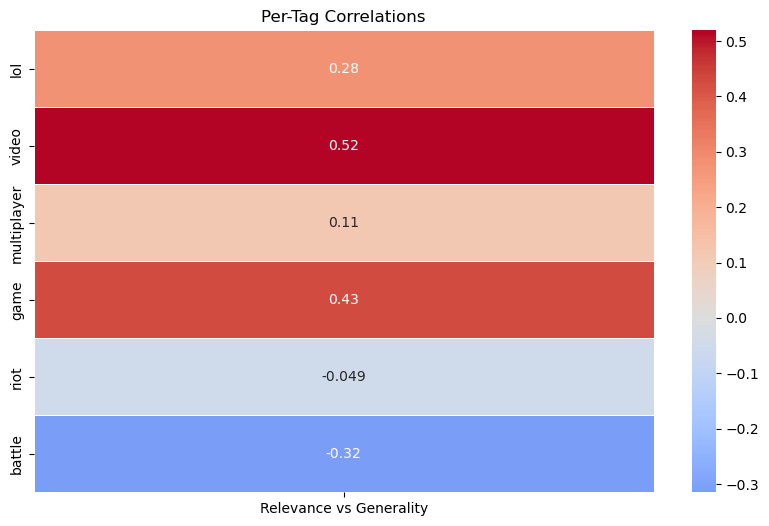

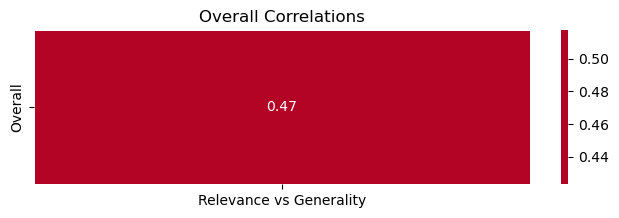


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_hist_price  tag_forex  tag_usd_jpy  tag_currency_pairs  \
std         0.942809   0.777544     1.182663            1.028992   
min         2.000000   3.000000     2.000000            2.000000   
max         5.000000   5.000000     5.000000            5.000000   
mean        4.222222   4.388889     4.111111            3.666667   

      tag_yearly_data  tag_finance  tag_minute_high  
std          0.916444     1.188177         1.500545  
min          2.000000     1.000000         1.000000  
max          5.000000     5.000000         5.000000  
mean         3.611111     3.666667         3.388889  
Document 2 Generality Distribution:
      spec_hist_price  spec_forex  spec_usd_jpy  spec_currency_pairs  \
std          1.551933    1.188177      1.161754             1.188177   
min          1.000000    1.000000      1.000000             1.000000   
max          5.000000    5.000000      5.000000             5.000000   


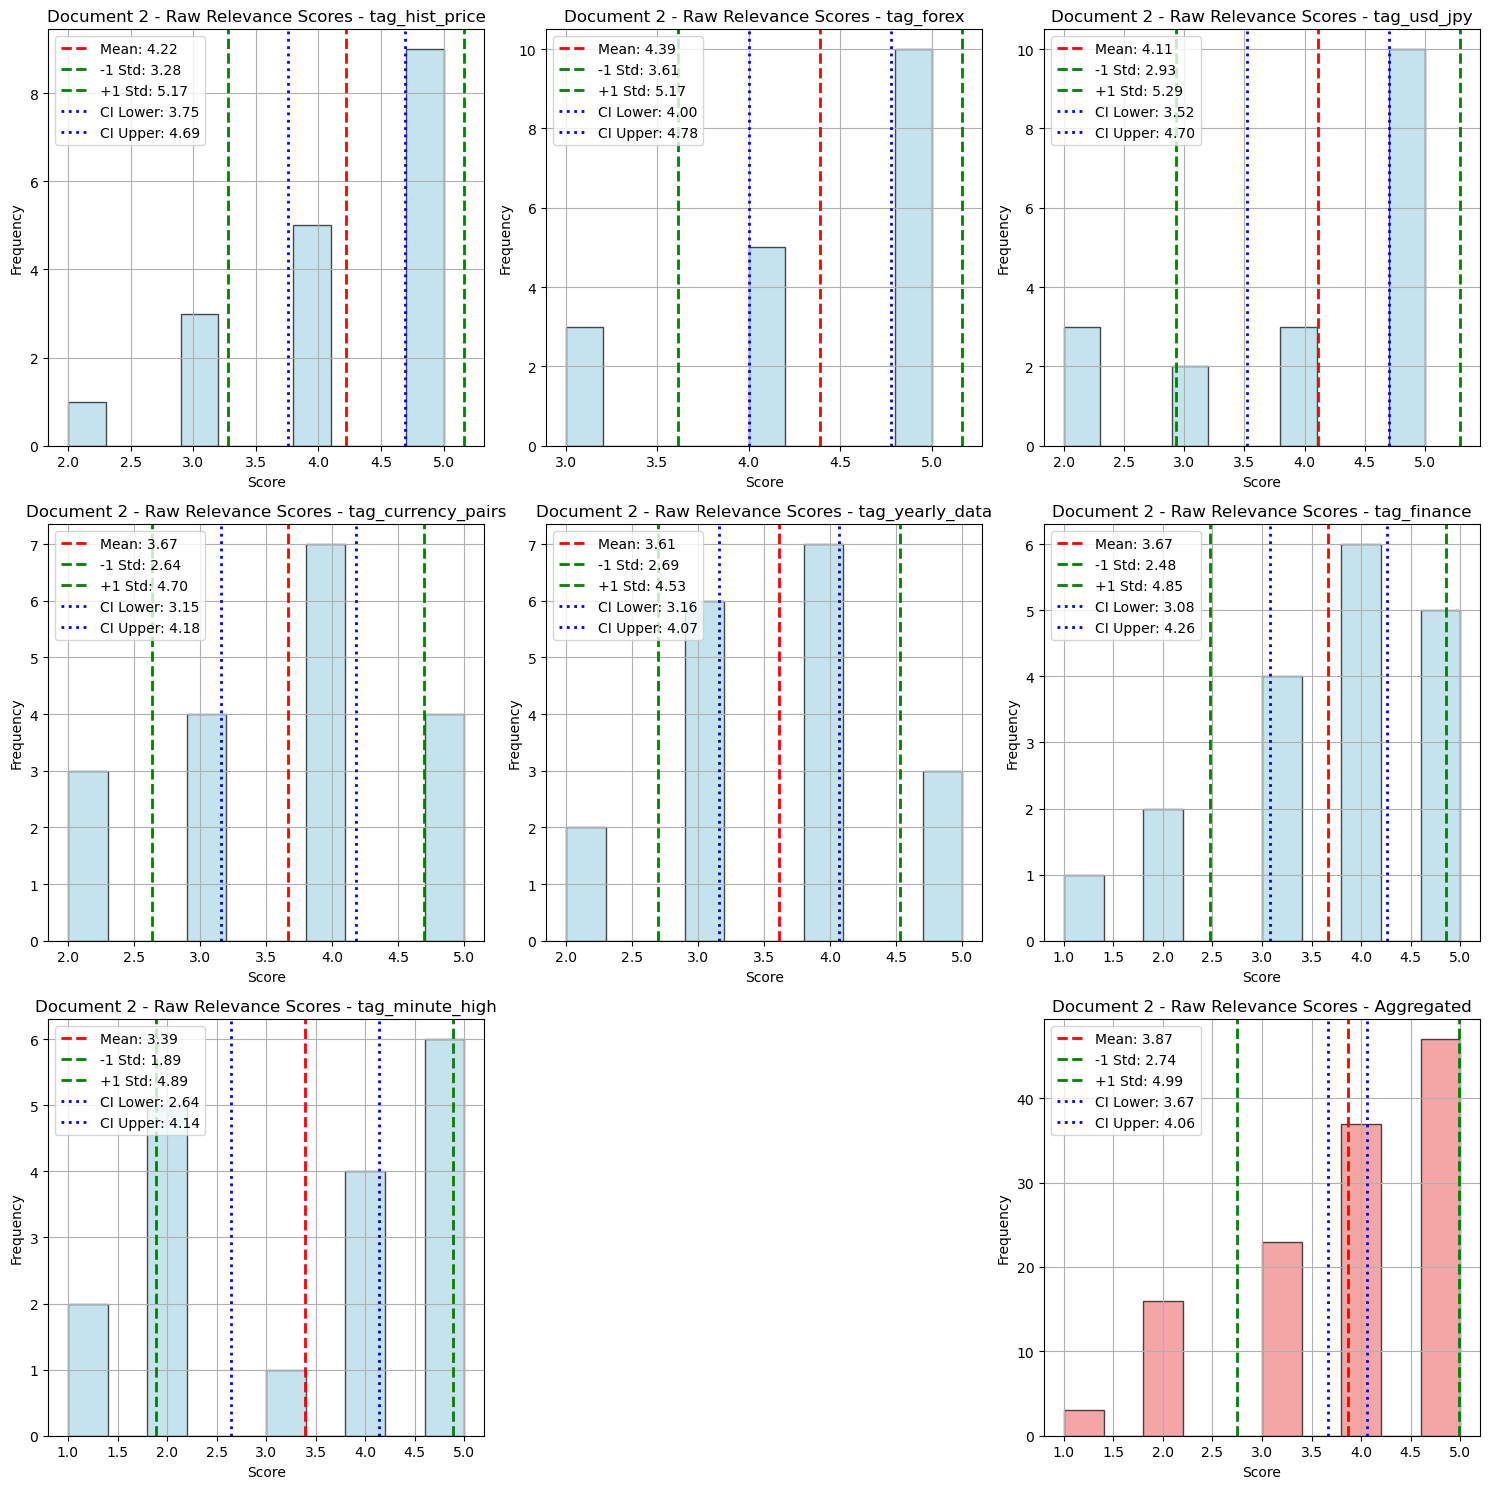

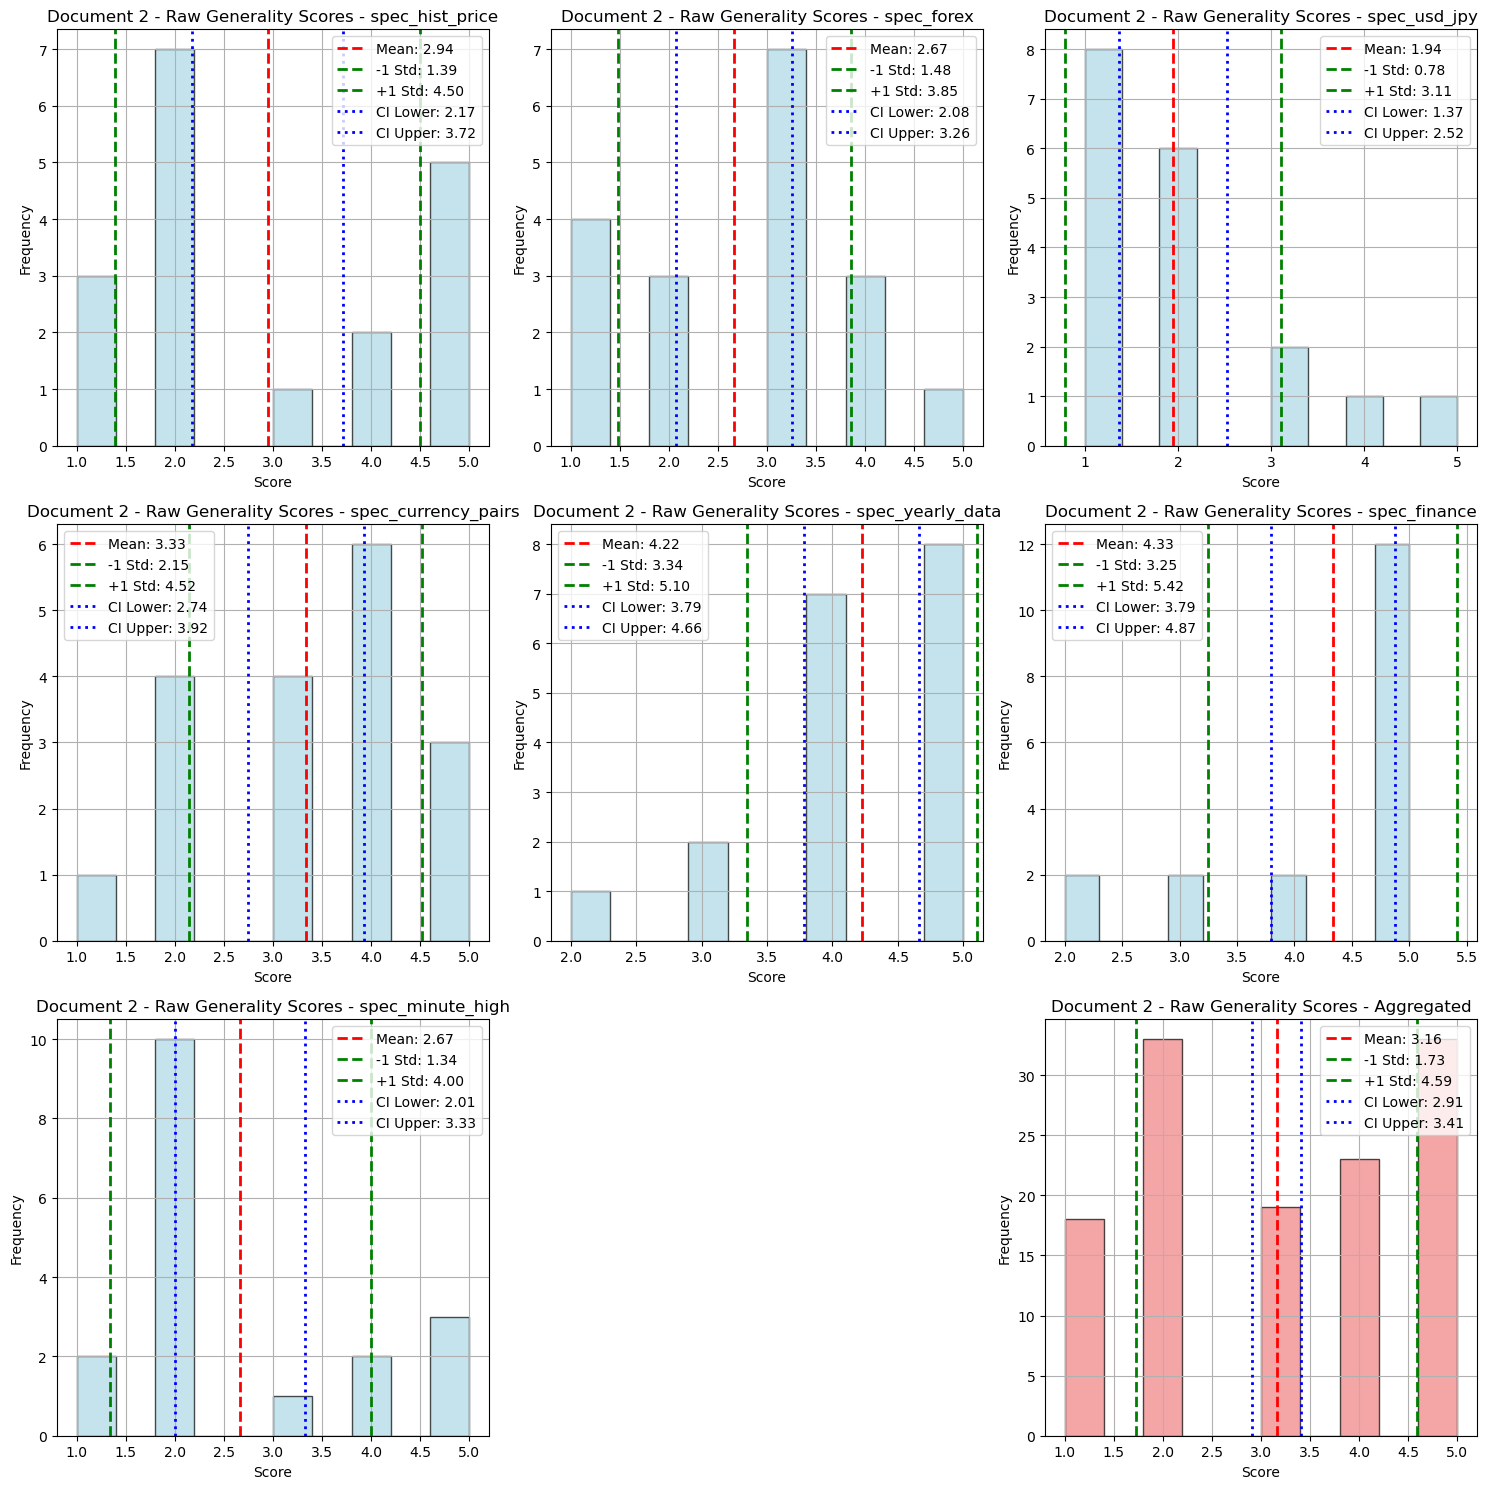

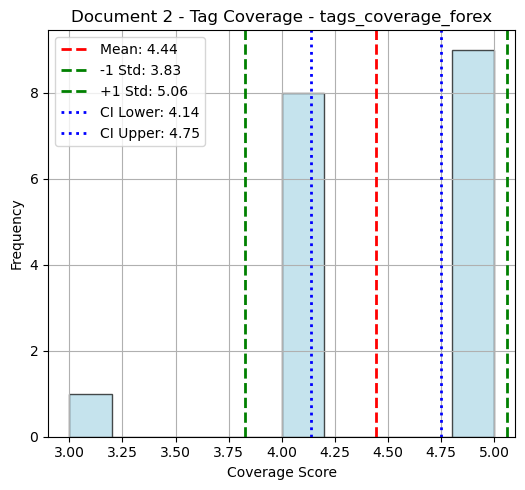

Correlation per Tag:
          Relevance vs Generality
hist                    -0.293252
forex                    0.217827
usd                     -0.180146
currency                 0.033910
yearly                   0.349329
finance                  0.006381
minute                  -0.040053

Overall Correlations:
         Relevance vs Generality
Overall                  0.09295


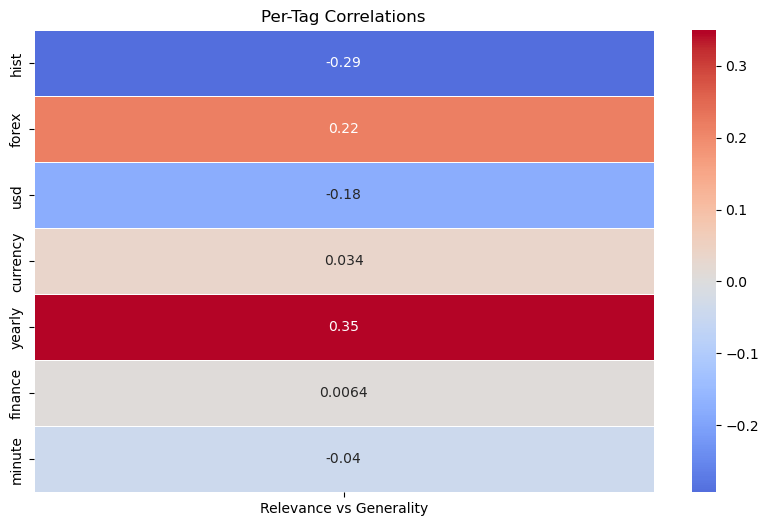

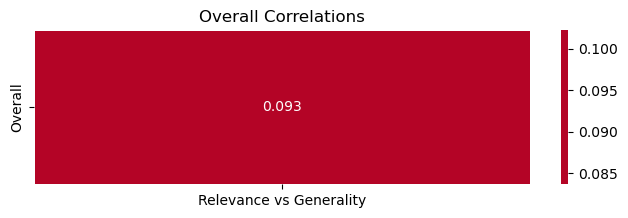


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_oncology  tag_mrna_prof  tag_biology  \
std          0.594089    0.937595      1.211330       1.060275     0.923548   
min          3.000000    2.000000      1.000000       2.000000     1.000000   
max          5.000000    5.000000      5.000000       5.000000     4.000000   
mean         4.666667    4.055556      3.944444       4.222222     2.833333   

      tag_carcinomas  tag_gene_expr  
std         0.894792       0.923548  
min         2.000000       2.000000  
max         5.000000       5.000000  
mean        3.722222       4.166667  
Document 3 Generality Distribution:
      spec_lung_cancer  spec_cancer  spec_oncology  spec_mrna_prof  \
std           0.937595     1.293523       1.243283        1.017815   
min           1.000000     1.000000       1.000000        1.000000   
max           4.000000     5.000000       5.000000        4.000000   
mean          2.055556     3.4444

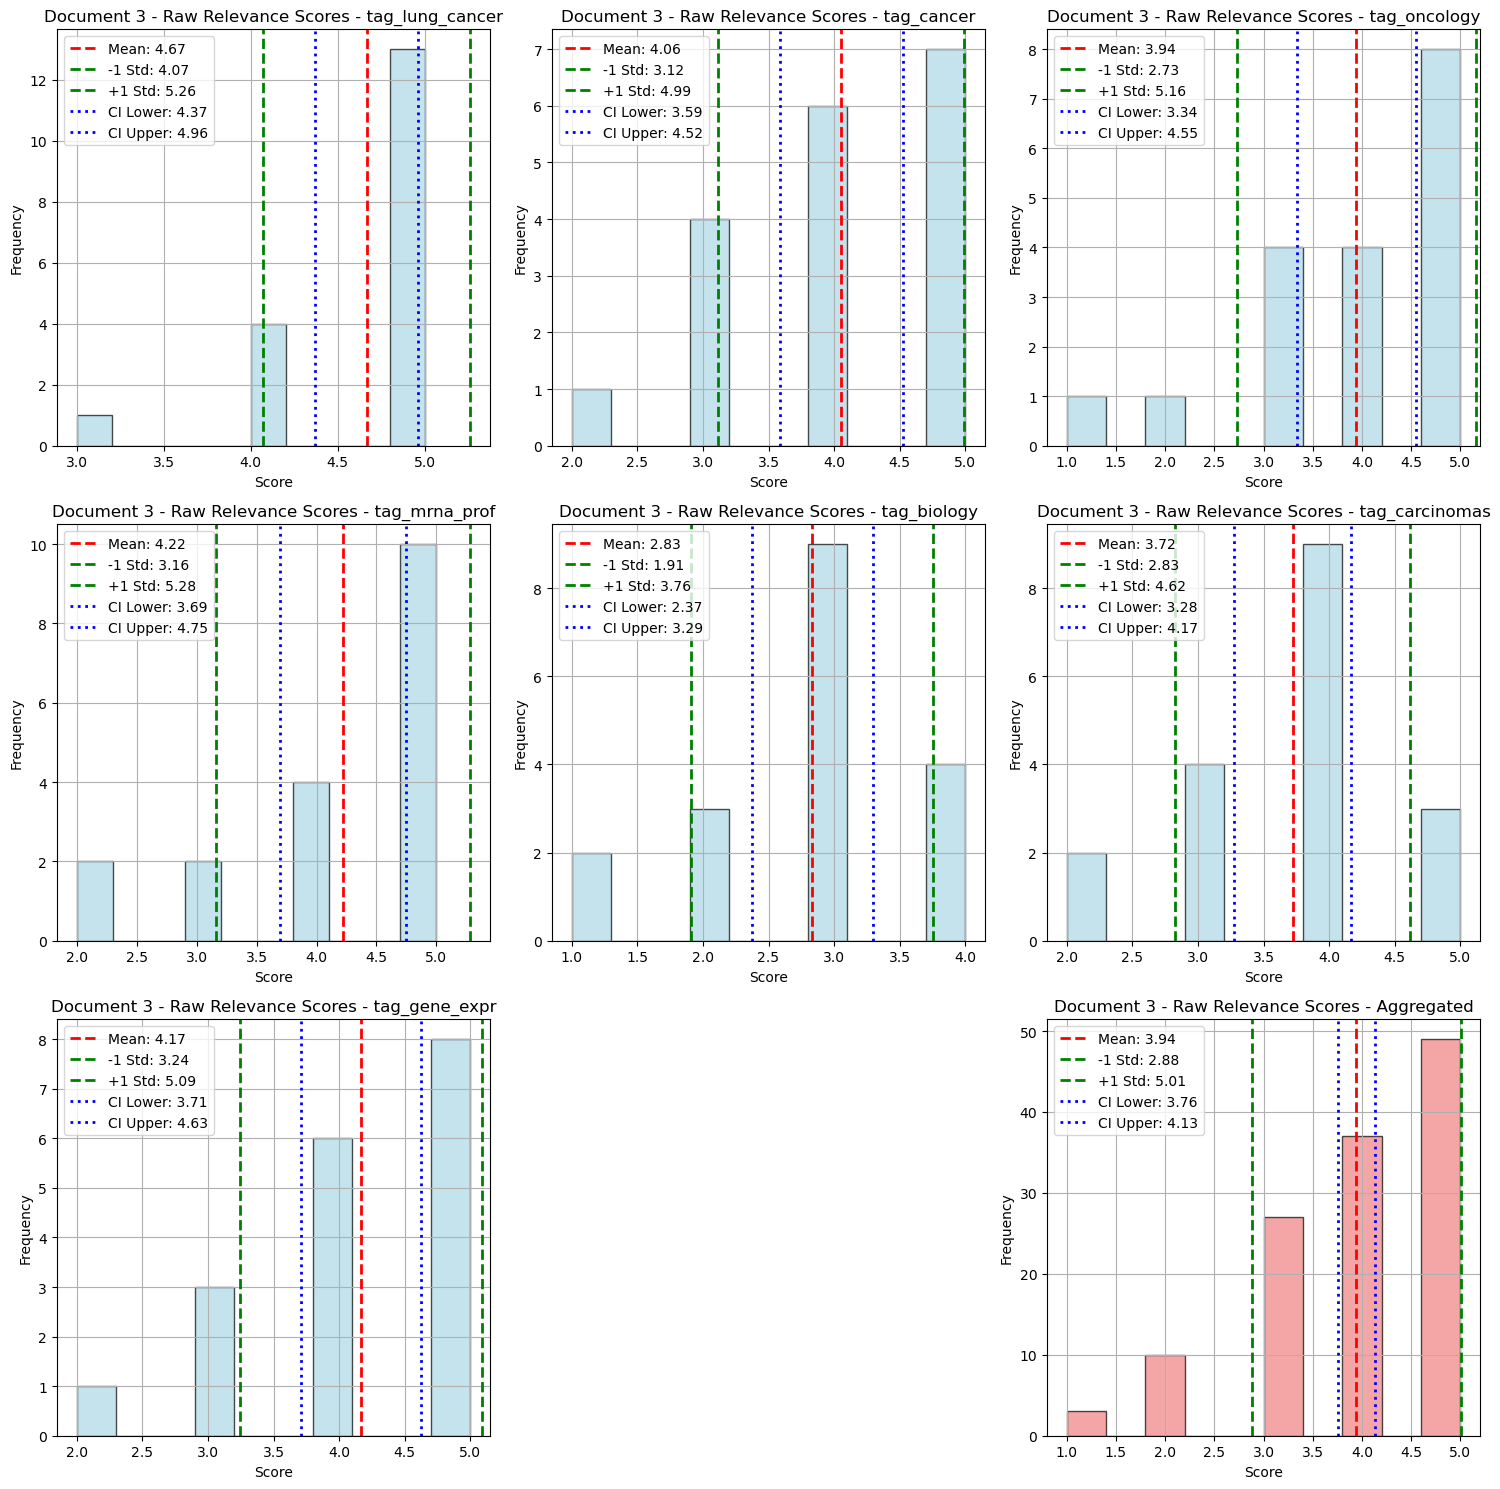

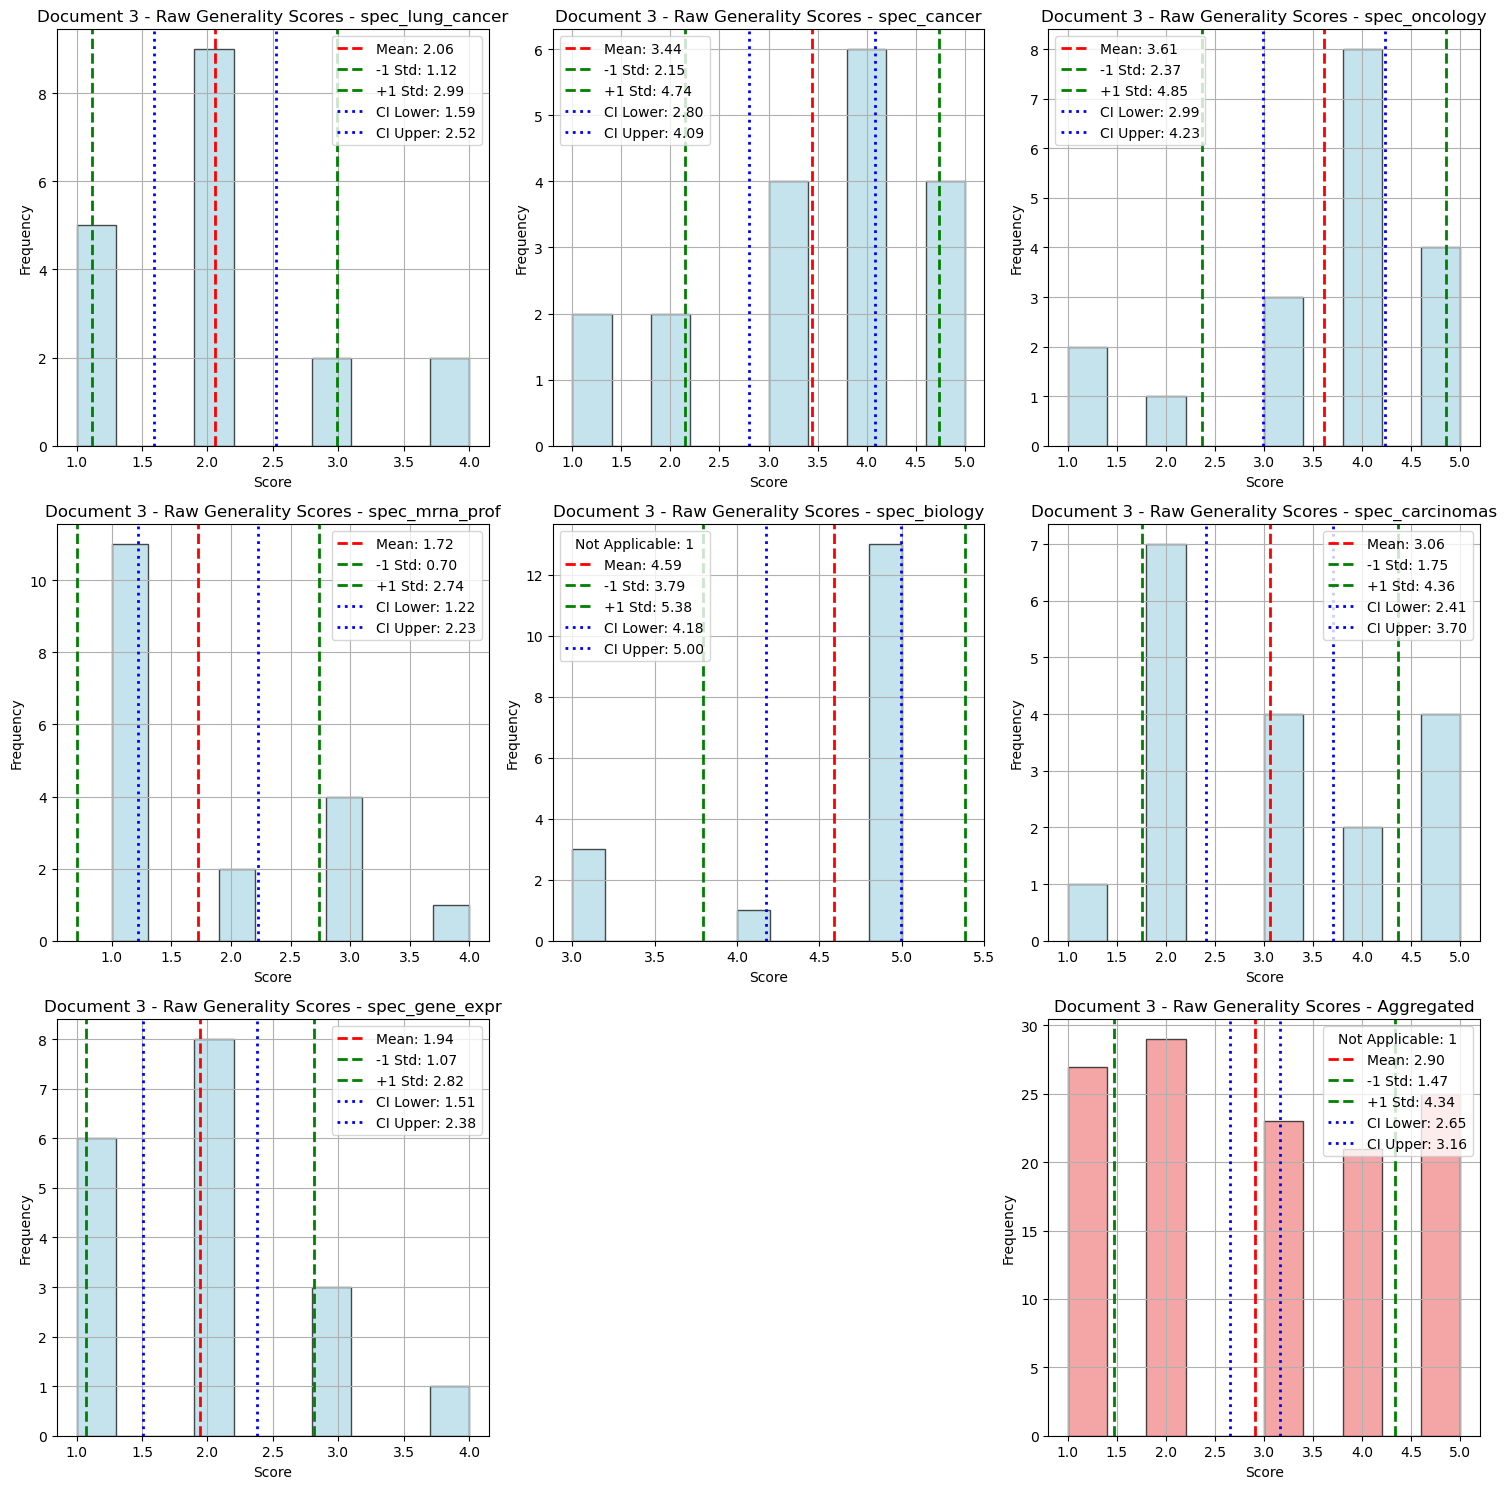

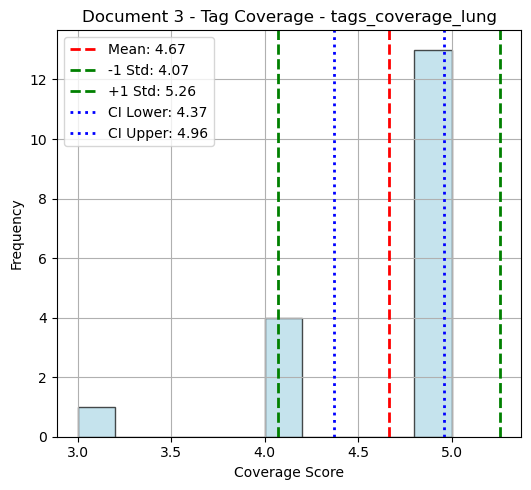

Correlation per Tag:
            Relevance vs Generality
lung                       0.155387
cancer                     0.007868
oncology                   0.292220
mrna                      -0.504890
biology                    0.095884
carcinomas                -0.424921
gene                      -0.360520

Overall Correlations:
         Relevance vs Generality
Overall                 0.070723


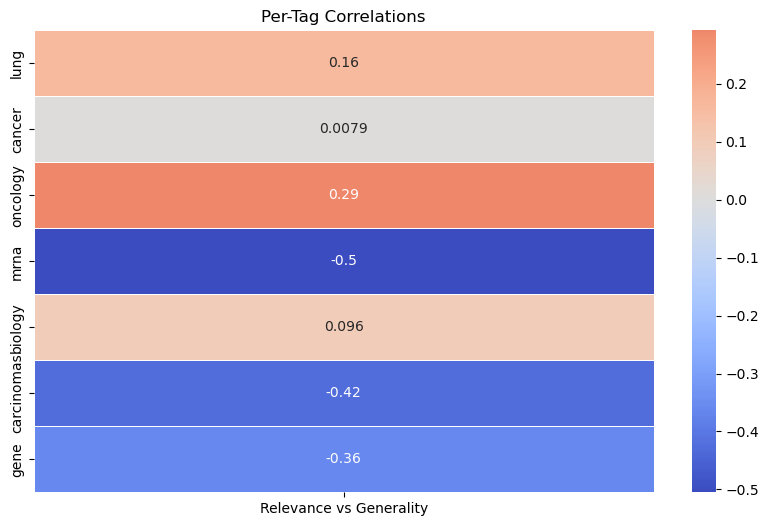

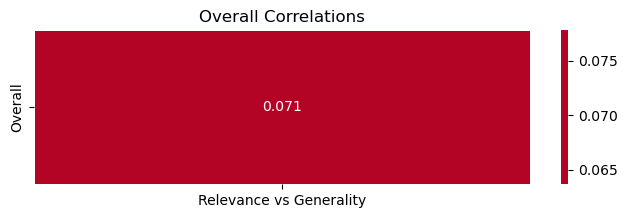

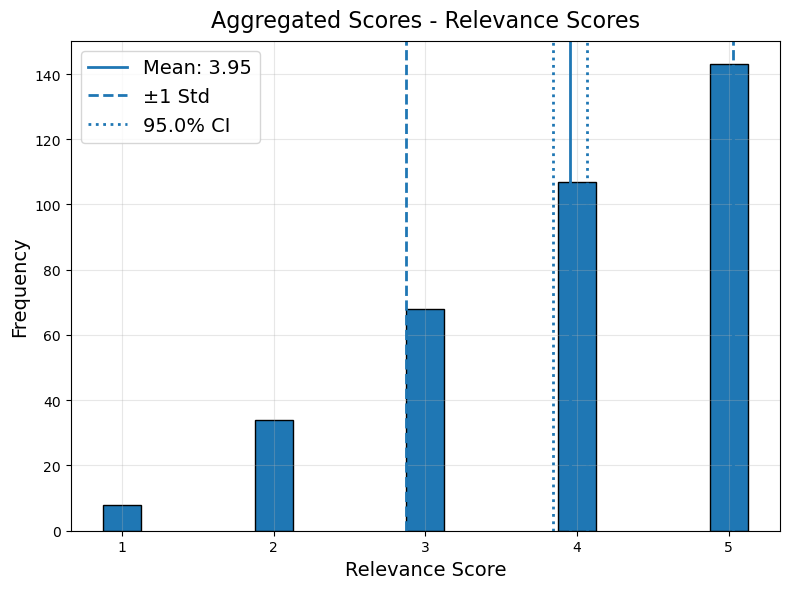

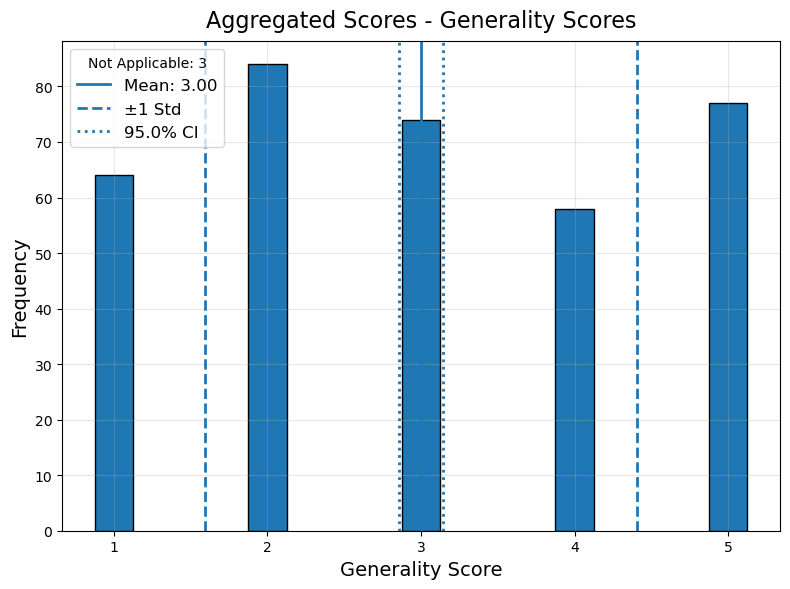

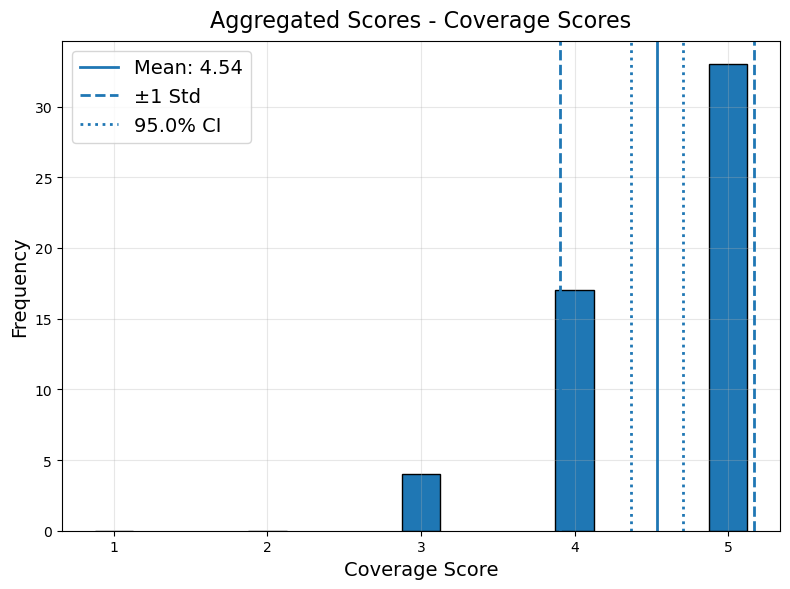


Aggregated Correlations (pandas):
            Relevance  Generality
Relevance    1.000000   -0.187623
Generality  -0.187623    1.000000


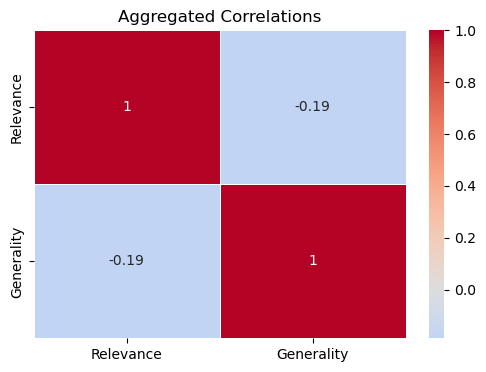

ICC for Relevance:


Type              Description       ICC         F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.130259  3.695827   19  340  5.260564e-07   
1   ICC2     Single random raters  0.153780  8.701059   19  323  7.207838e-20   
2   ICC3      Single fixed raters  0.299640  8.701059   19  323  7.207838e-20   
3  ICC1k  Average raters absolute  0.729425  3.695827   19  340  5.260564e-07   
4  ICC2k    Average random raters  0.765867  8.701059   19  323  7.207838e-20   
5  ICC3k     Average fixed raters  0.885071  8.701059   19  323  7.207838e-20   

          CI95%  
0  [0.06, 0.28]  
1  [0.07, 0.31]  
2   [0.18, 0.5]  
3  [0.52, 0.87]  
4  [0.59, 0.89]  
5   [0.8, 0.95]


ICC for Generality:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.342659  10.383059   16  289   
1   ICC2     Single random raters  0.351664  16.755396   16  272   
2   ICC3      Single fixed raters  0.466752  16.755396   16  272   
3  ICC1k  Average raters absolute  0.903689  10.383059   16  289   
4  ICC2k    Average random raters  0.907092  16.755396   16  272   
5  ICC3k     Average fixed raters  0.940318  16.755396   16  272   

           pval         CI95%  
0  9.382109e-21   [0.2, 0.56]  
1  5.013513e-32  [0.21, 0.57]  
2  5.013513e-32  [0.31, 0.68]  
3  9.382109e-21  [0.82, 0.96]  
4  5.013513e-32  [0.83, 0.96]  
5  5.013513e-32  [0.89, 0.97]


ICC for Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.023529  0.586207    2   51  0.560139   
1   ICC2     Single random raters  0.002646  1.088670    2   34  0.348112   
2   ICC3      Single fixed raters  0.004902  1.088670    2   34  0.348112   
3  ICC1k  Average raters absolute -0.705882  0.586207    2   51  0.560139   
4  ICC2k    Average random raters  0.045570  1.088670    2   34  0.348112   
5  ICC3k     Average fixed raters  0.081448  1.088670    2   34  0.348112   

           CI95%  
0  [-0.05, 0.55]  
1  [-0.02, 0.56]  
2   [-0.04, 0.7]  
3  [-5.77, 0.96]  
4  [-0.65, 0.96]  
5  [-2.78, 0.98]


ICC for Shared Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.104072  3.090909    1   34  0.087731   
1   ICC2     Single random raters  0.116071  4.250000    1   17  0.054883   
2   ICC3      Single fixed raters  0.152941  4.250000    1   17  0.054883   
3  ICC1k  Average raters absolute  0.676471  3.090909    1   34  0.087731   
4  ICC2k    Average random raters  0.702703  4.250000    1   17  0.054883   
5  ICC3k     Average fixed raters  0.764706  4.250000    1   17  0.054883   

           CI95%  
0  [-0.02, 0.99]  
1  [-0.01, 0.99]  
2   [-0.02, 1.0]  
3   [-0.78, 1.0]  
4    [-0.2, 1.0]  
5   [-0.42, 1.0]


Fleiss' Kappa for Relevance: 0.0382
Fleiss' Kappa for Generality: 0.1044
Fleiss' Kappa for Coverage: -0.0226
Fleiss' Kappa for Shared Coverage: -0.0128

Krippendorff's Alpha for Relevance: 0.4692
Krippendorff's Alpha for Generality: 0.2044
Krippendorff's Alpha for Coverage: 0.4503
Krippendorff's Alpha for Shared Coverage: 0.1898


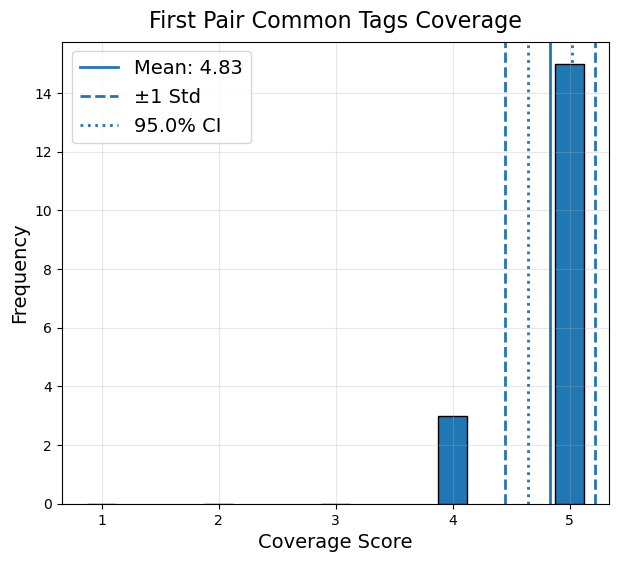

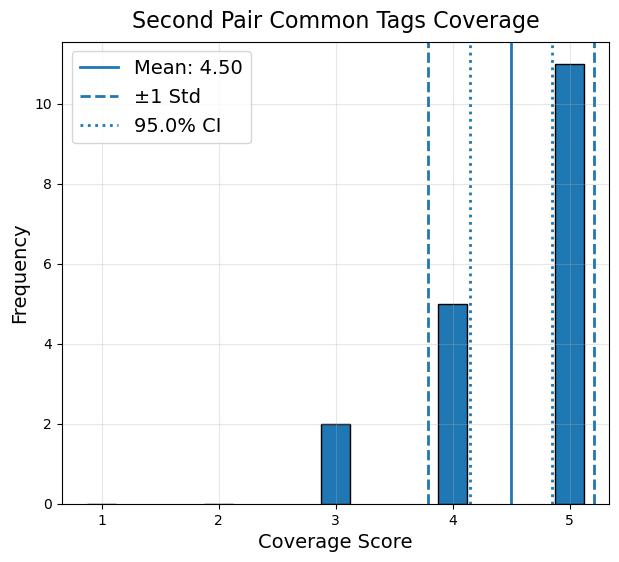


Metrics for First Pair Common Tags:
Accuracy: 0.83
Precision: 0.84
Recall: 0.74
Specificity: 0.89
F1-Score: 0.79

Metrics for Second Pair Common Tags:
Accuracy: 0.86
Precision: 0.69
Recall: 0.85
Specificity: 0.86
F1-Score: 0.76


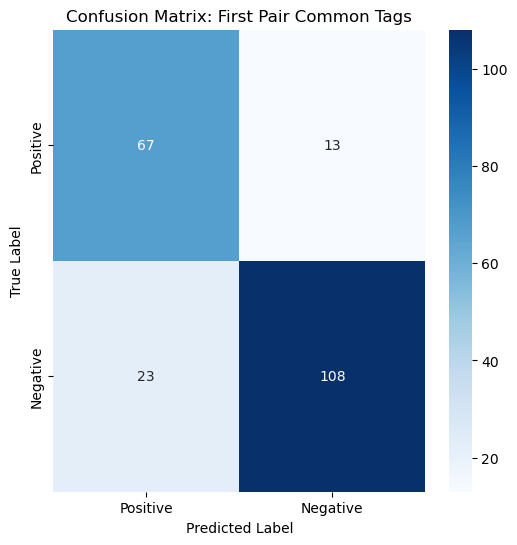

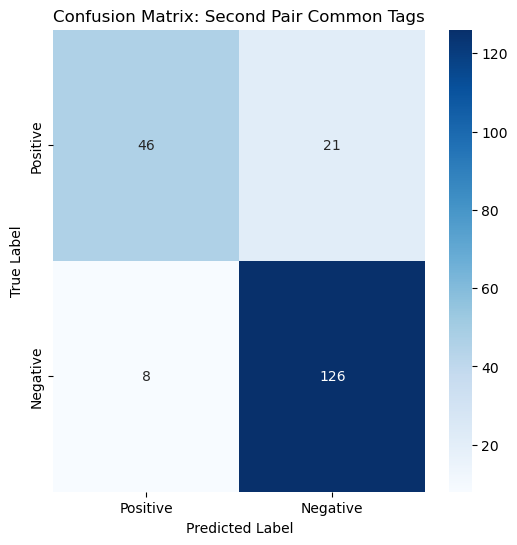

In [1080]:
analyze_tags(
    df_human_generated,
    relevance_columns_list=[
        human_first_document_relevance_columns, 
        human_second_document_relevance_columns,
        human_third_document_relevance_columns
    ],
    spec_columns_list=[
        human_first_document_spec_columns, 
        human_second_document_spec_columns,
        human_third_document_spec_columns
    ],
    coverage_columns_list=[
        human_first_document_coverage_columns, 
        human_second_document_coverage_columns,
        human_third_document_coverage_columns
    ],
    suggested_columns_list=[
        human_first_document_suggested_columns,
        human_second_document_suggested_columns,
        human_third_document_suggested_columns
    ],
    common_tags_columns_1=human_first_pair_common_tags_columns,
    common_tags_true_tags_1=human_first_pair_common_tags_true_tags,
    common_tags_coverage_1=human_first_pair_coverage_columns,
    common_tags_columns_2=human_second_pair_common_tags_columns,
    common_tags_true_tags_2=human_second_pair_common_tags_true_tags,
    common_tags_coverage_2=human_second_pair_coverage_columns,
    save_path_aggregated="../../latex/thesis/figures/tags_analysis_human.pdf",
    save_path_correlations="../../latex/thesis/figures/tags_correlations_human.pdf",
    save_path_first_pair_coverage="../../latex/thesis/figures/first_pair_common_tags_coverage_human.pdf",
    save_path_second_pair_coverage="../../latex/thesis/figures/second_pair_common_tags_coverage_human.pdf",
    save_path_first_pair_confusion_matrix="../../latex/thesis/figures/first_pair_common_tags_confusion_matrix_human.pdf",
    save_path_second_pair_confusion_matrix="../../latex/thesis/figures/second_pair_common_tags_confusion_matrix_human.pdf"
)

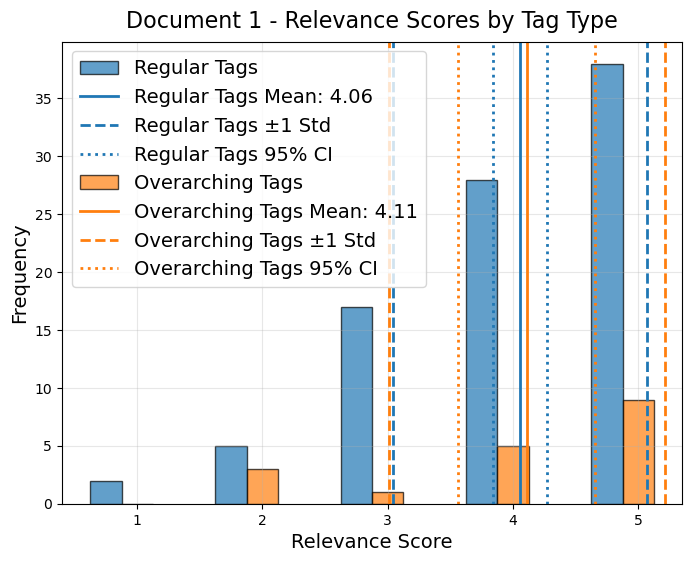

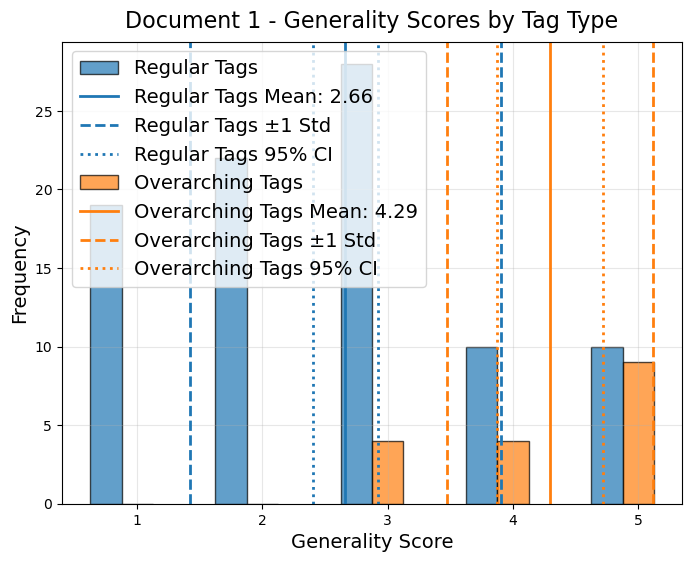

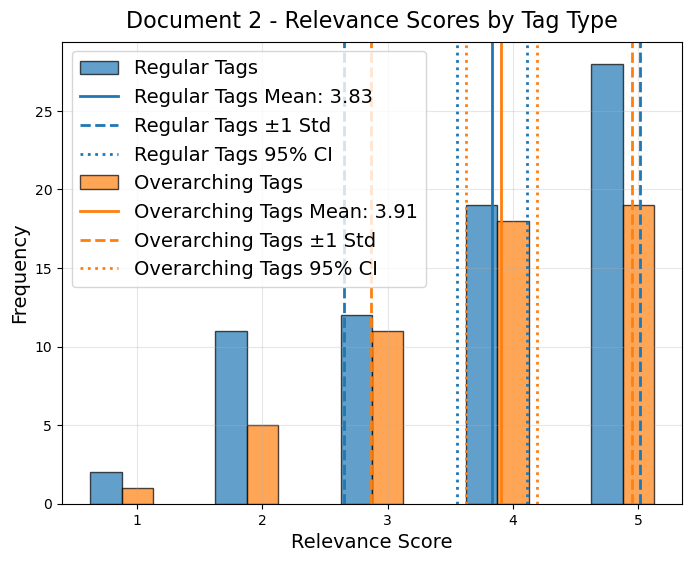

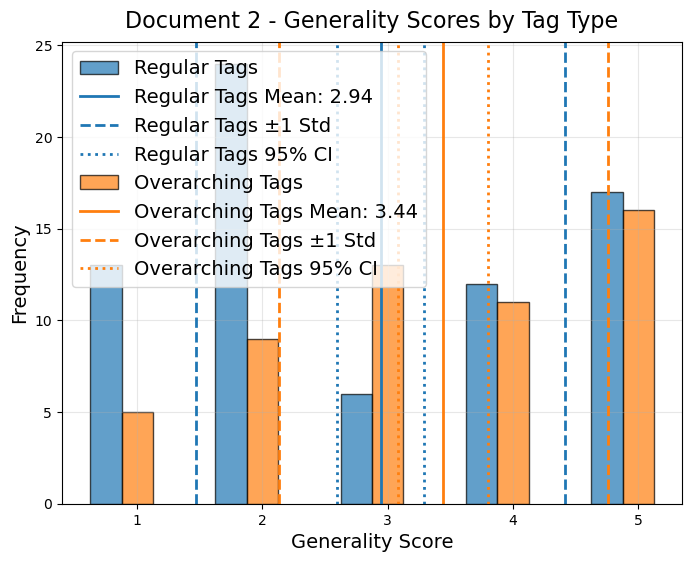

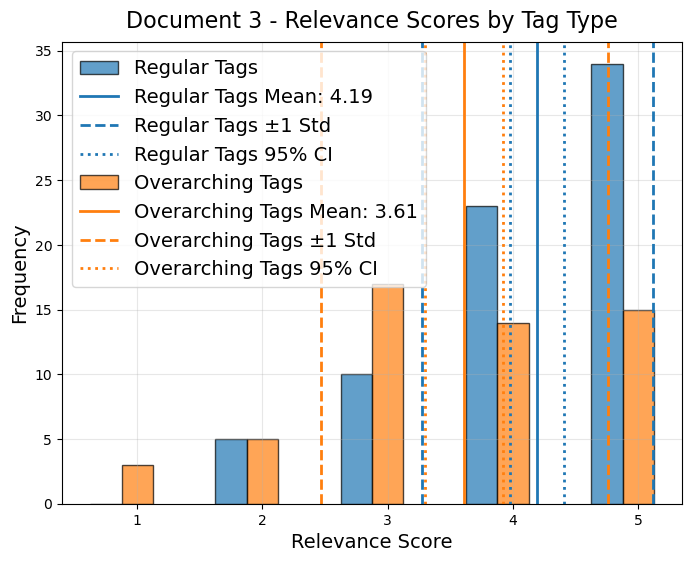

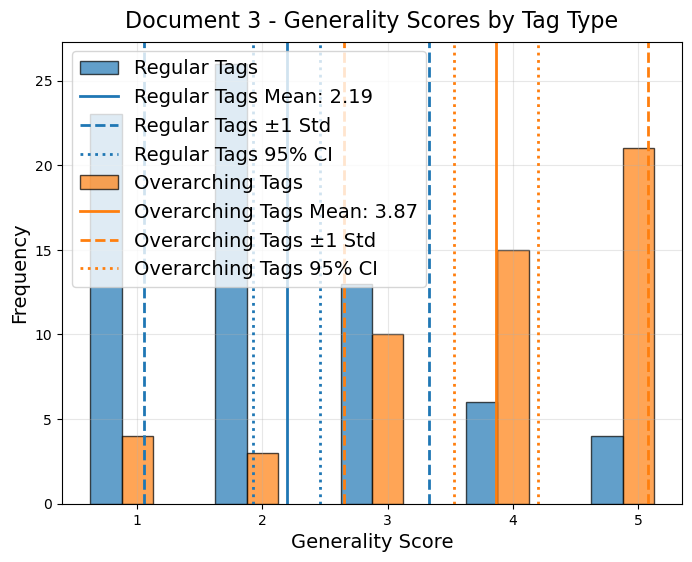

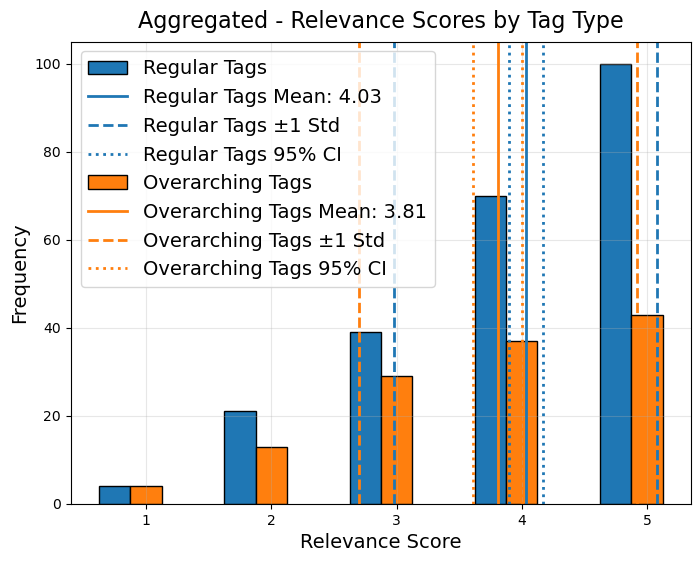

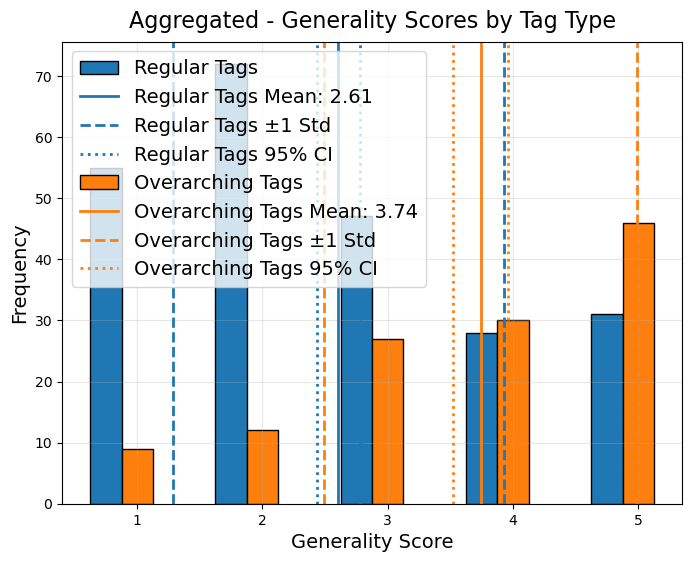

In [1081]:
# Define document-specific relevance columns, specificity columns, tag types, and document names
doc_relevance_columns_list = [
    human_first_document_relevance_columns,
    human_second_document_relevance_columns,
    human_third_document_relevance_columns
]

doc_spec_columns_list = [
    human_first_document_spec_columns,
    human_second_document_spec_columns,
    human_third_document_spec_columns
]

doc_tag_types_list = [
    human_first_document_tag_types,
    human_second_document_tag_types,
    human_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_human_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names,
                                              save_path="../../latex/thesis/figures/tags_analysis_human_multiple_documents.pdf")

In [1082]:
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [1083]:
model_first_document_relevance_columns = ['tag_ranked_matches', 'tag_games', 'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports']
model_first_document_spec_columns = ['spec_ranked_matches', 'spec_games', 'spec_league_of_legends', 'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports']
model_first_document_coverage_columns = ['tags_coverage_lol']
model_first_document_suggested_columns = ['suggested_tags_lol']
model_first_document_tag_types = {
    'overarching': ['tag_games', 'tag_computer_games', 'tag_gaming', 'tag_esports'],
    'regular': ['tag_ranked_matches', 'tag_league_of_legends', 'tag_game_data_analysis']
}

model_second_document_relevance_columns = ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high']
model_second_document_spec_columns = ['spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high']
model_second_document_coverage_columns = ['tags_coverage_forex']
model_second_document_suggested_columns = ['suggested_tags_forex']
model_second_document_tag_types = {
    'regular': ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high'],
    'overarching': []
}

model_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health']
model_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research', 'spec_biology', 'spec_medicine', 'spec_health']
model_third_document_coverage_columns = ['tags_coverage_lung']
model_third_document_suggested_columns = ['suggested_tags_lung']
model_third_document_tag_types = {
    'overarching': ['tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health'],
    'regular': ['tag_lung_cancer']
}

model_first_pair_common_tags_columns = ['common_tags1']
model_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
model_first_pair_coverage = ['common_tags_coverage1']

model_second_pair_common_tags_columns = ['common_tags2']
model_second_pair_common_tags_true_tags = ["Movies", "Film", "Media", "Entertainment"]
model_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_ranked_matches  tag_games  tag_league_of_legends  \
std             0.973457   0.597614               0.538958   
min             1.000000   2.000000               3.000000   
max             5.000000   4.000000               5.000000   
mean            3.952381   3.428571               4.761905   

      tag_game_data_analysis  tag_computer_games  tag_gaming  tag_esports  
std                 0.894427            0.872872    0.845154     1.321975  
min                 2.000000            2.000000    2.000000     1.000000  
max                 5.000000            5.000000    5.000000     5.000000  
mean                4.000000            3.809524    3.714286     3.047619  
Document 1 Generality Distribution:
      spec_ranked_matches  spec_games  spec_league_of_legends  \
std              0.966092    0.768424                0.511766   
min              1.000000    3.000000                1.000000   
max          

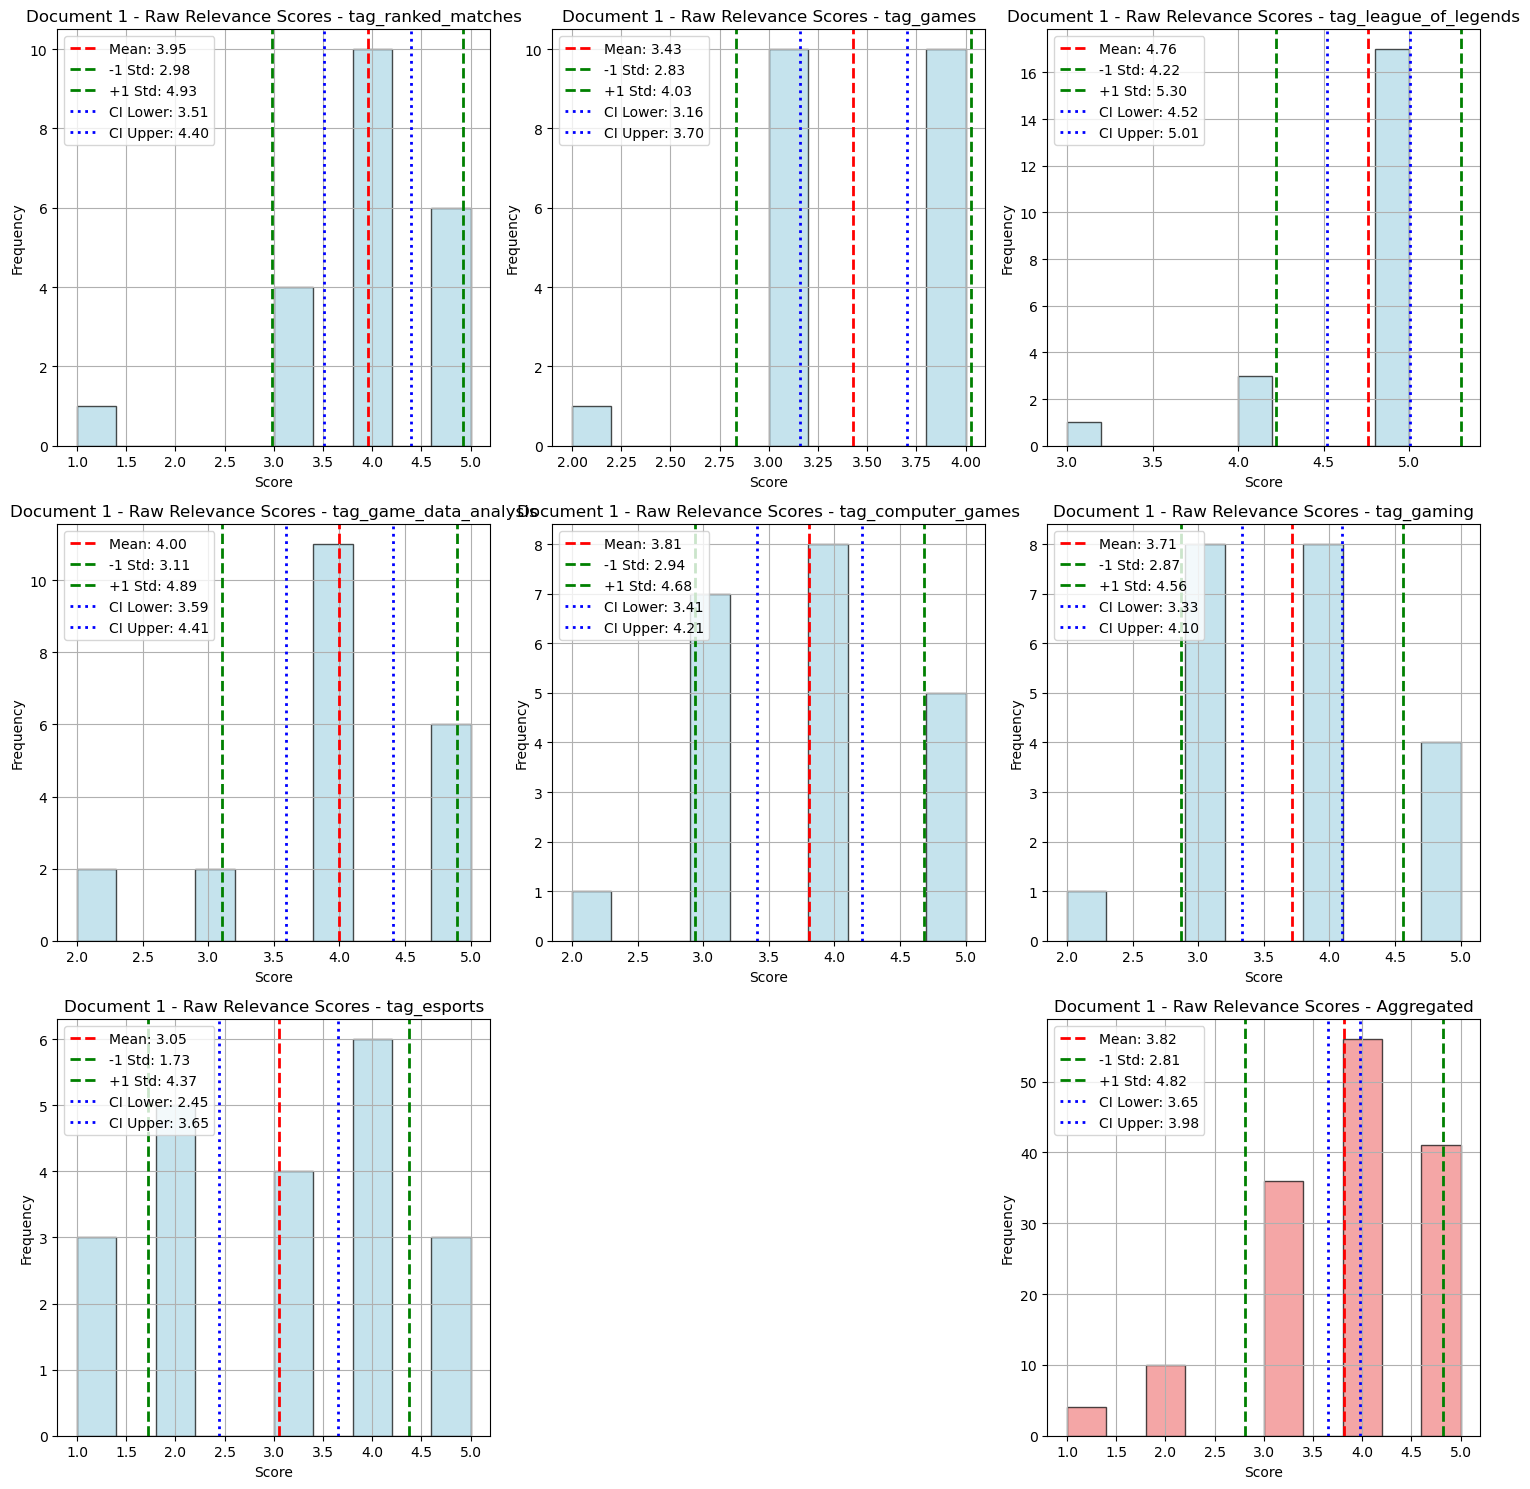

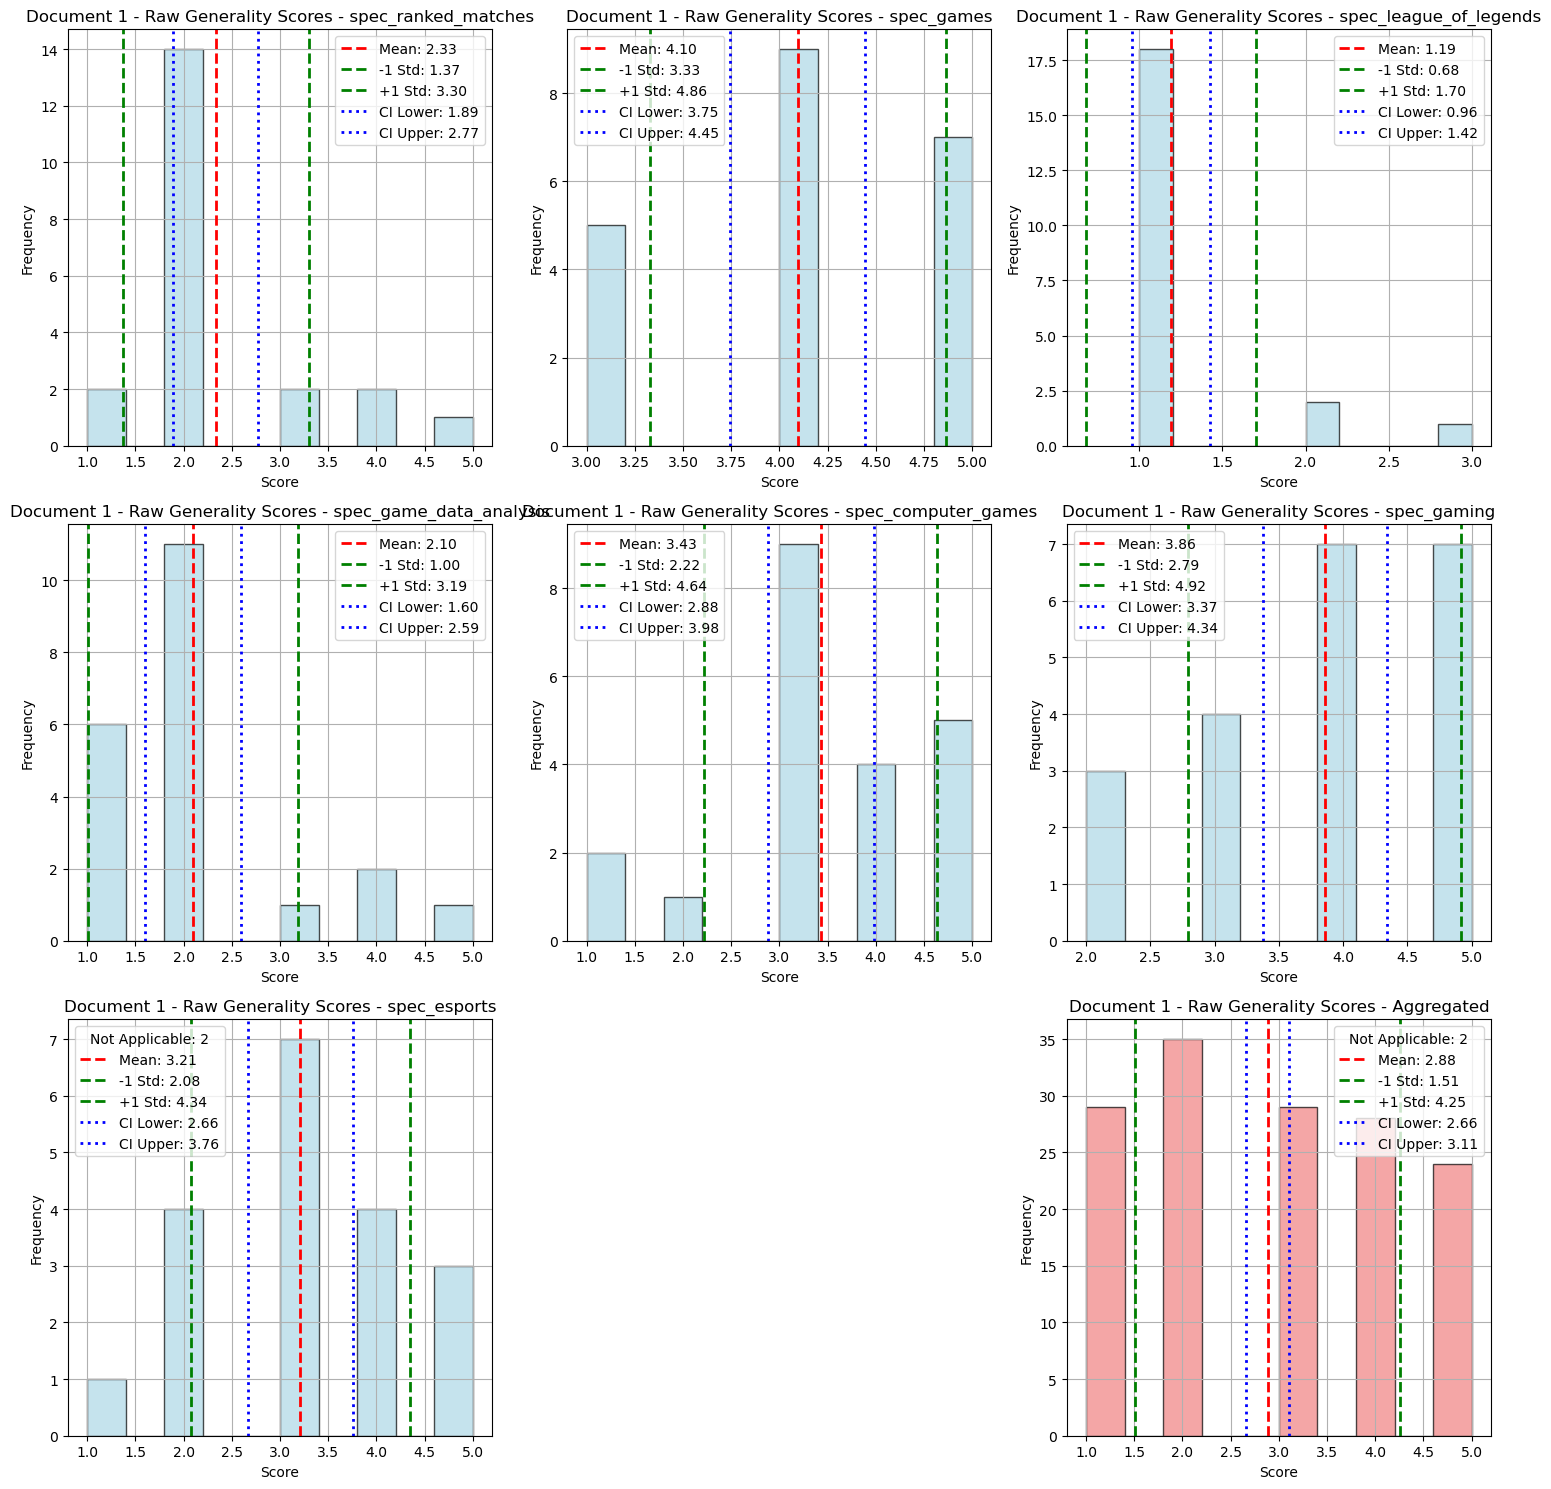

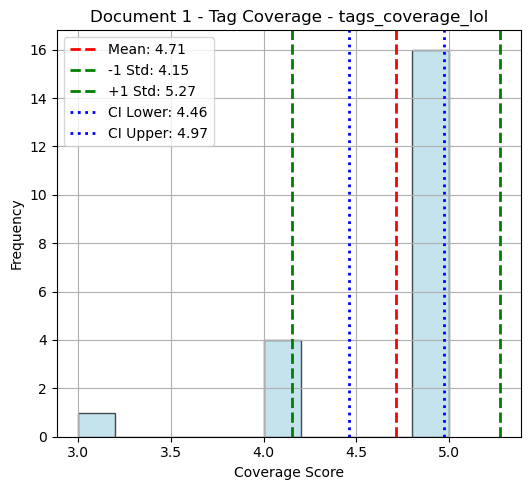

Correlation per Tag:
          Relevance vs Generality
ranked                  -0.514751
games                    0.134092
league                   0.196683
game                    -0.424231
computer                -0.352476
gaming                  -0.333272
esports                 -0.753178

Overall Correlations:
         Relevance vs Generality
Overall                -0.299737


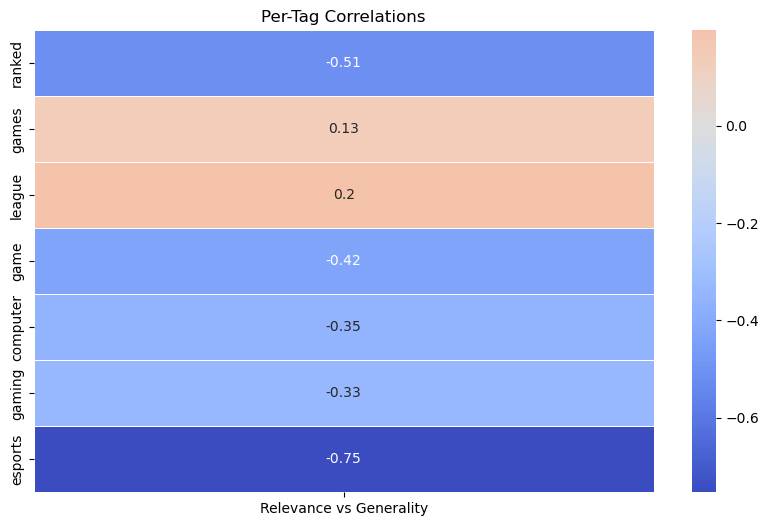

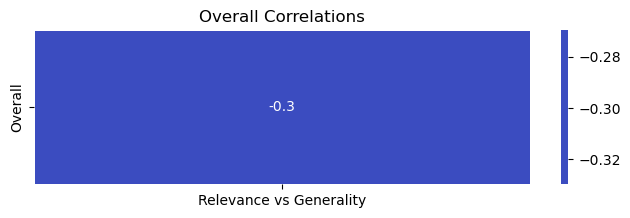


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_historical_price_data  tag_minute_interval  tag_historical_data  \
std                    0.783764             1.220851             0.902378   
min                    2.000000             1.000000             1.000000   
max                    5.000000             5.000000             5.000000   
mean                   4.285714             3.761905             3.285714   

      tag_forex  tag_candlestick  tag_minute  tag_high  
std    0.749603         1.207122    1.325573  1.209093  
min    3.000000         1.000000    1.000000  1.000000  
max    5.000000         5.000000    4.000000  4.000000  
mean   4.476190         3.428571    2.571429  2.190476  
Document 2 Generality Distribution:
      spec_historical_price_data  spec_minute_interval  spec_historical_data  \
std                     0.804748              1.207122              1.145931   
min                     1.000000              1.000000              

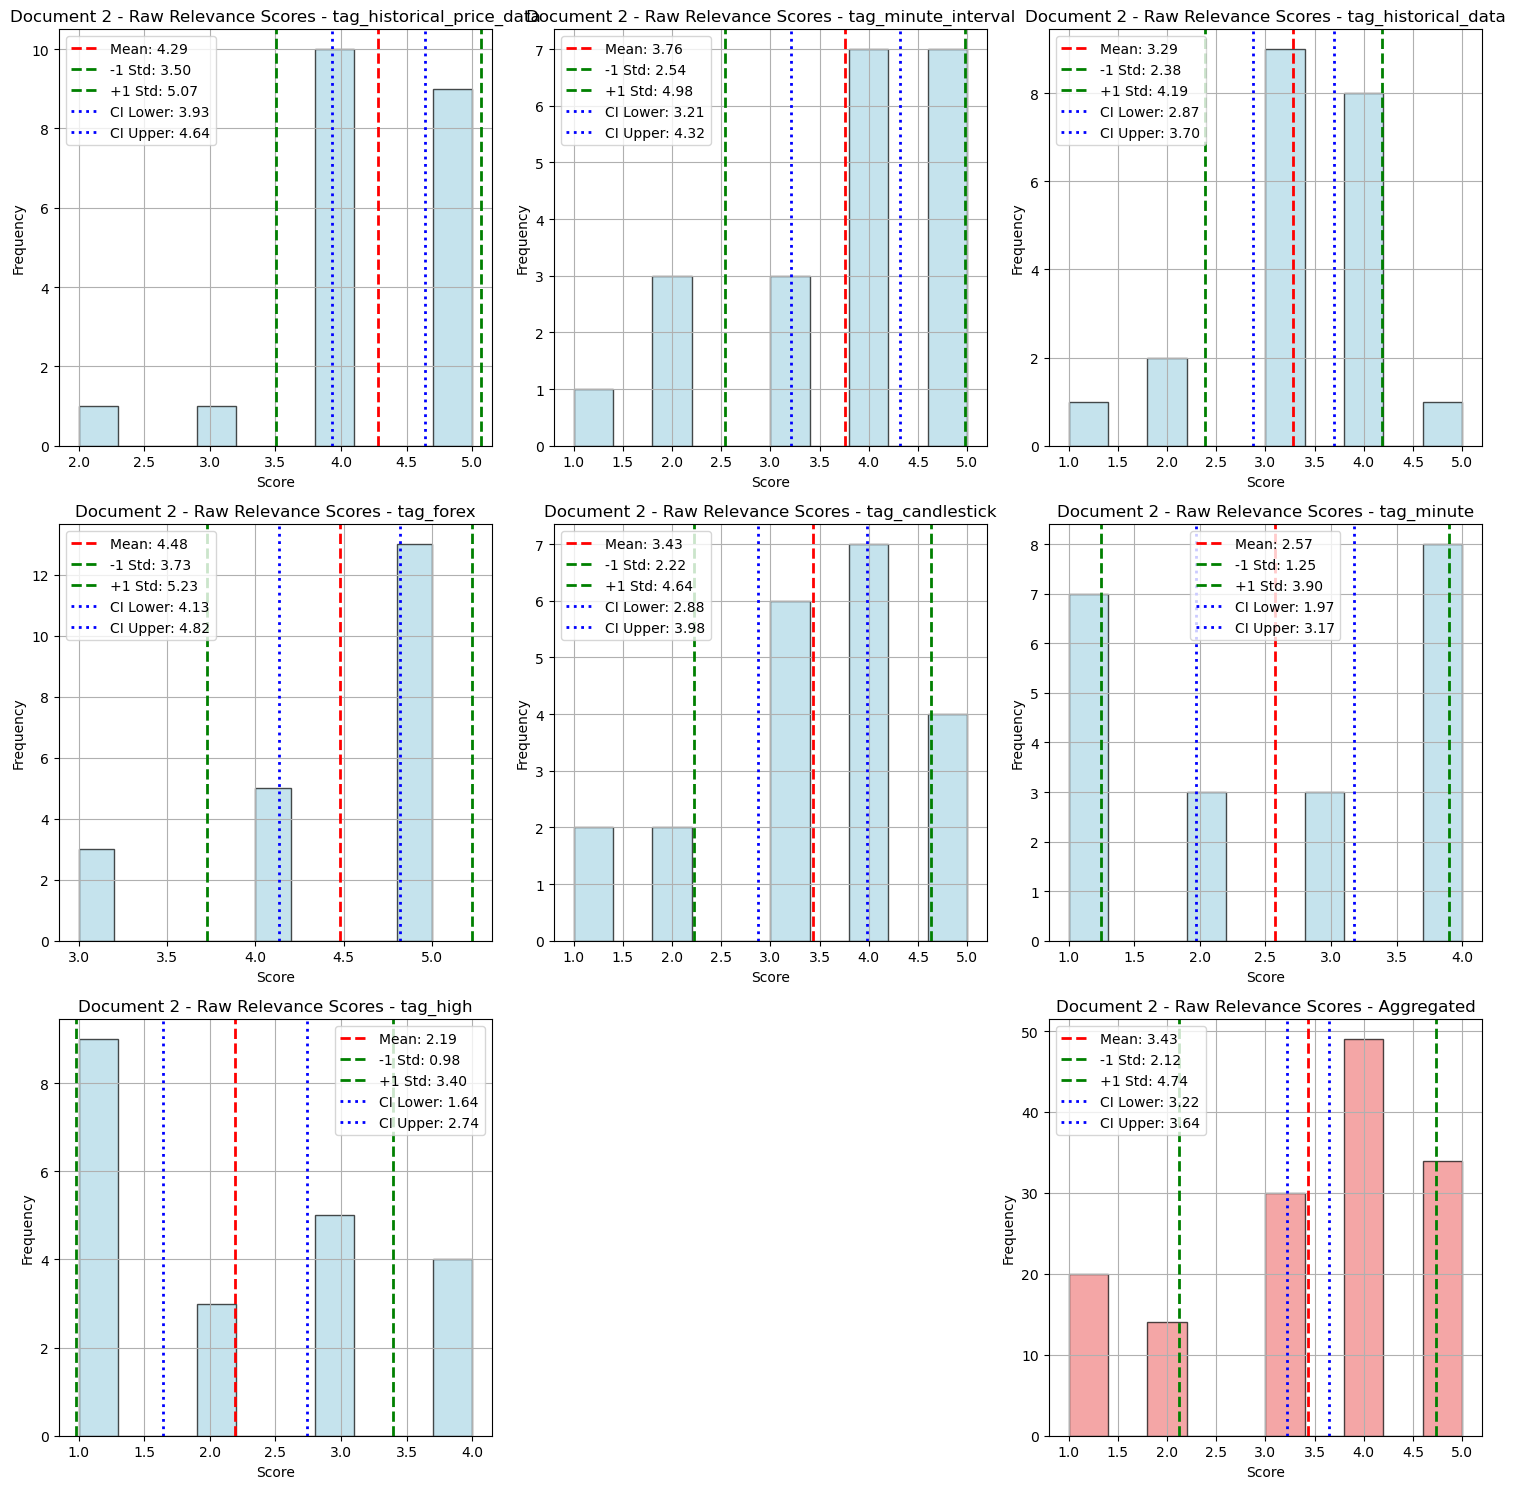

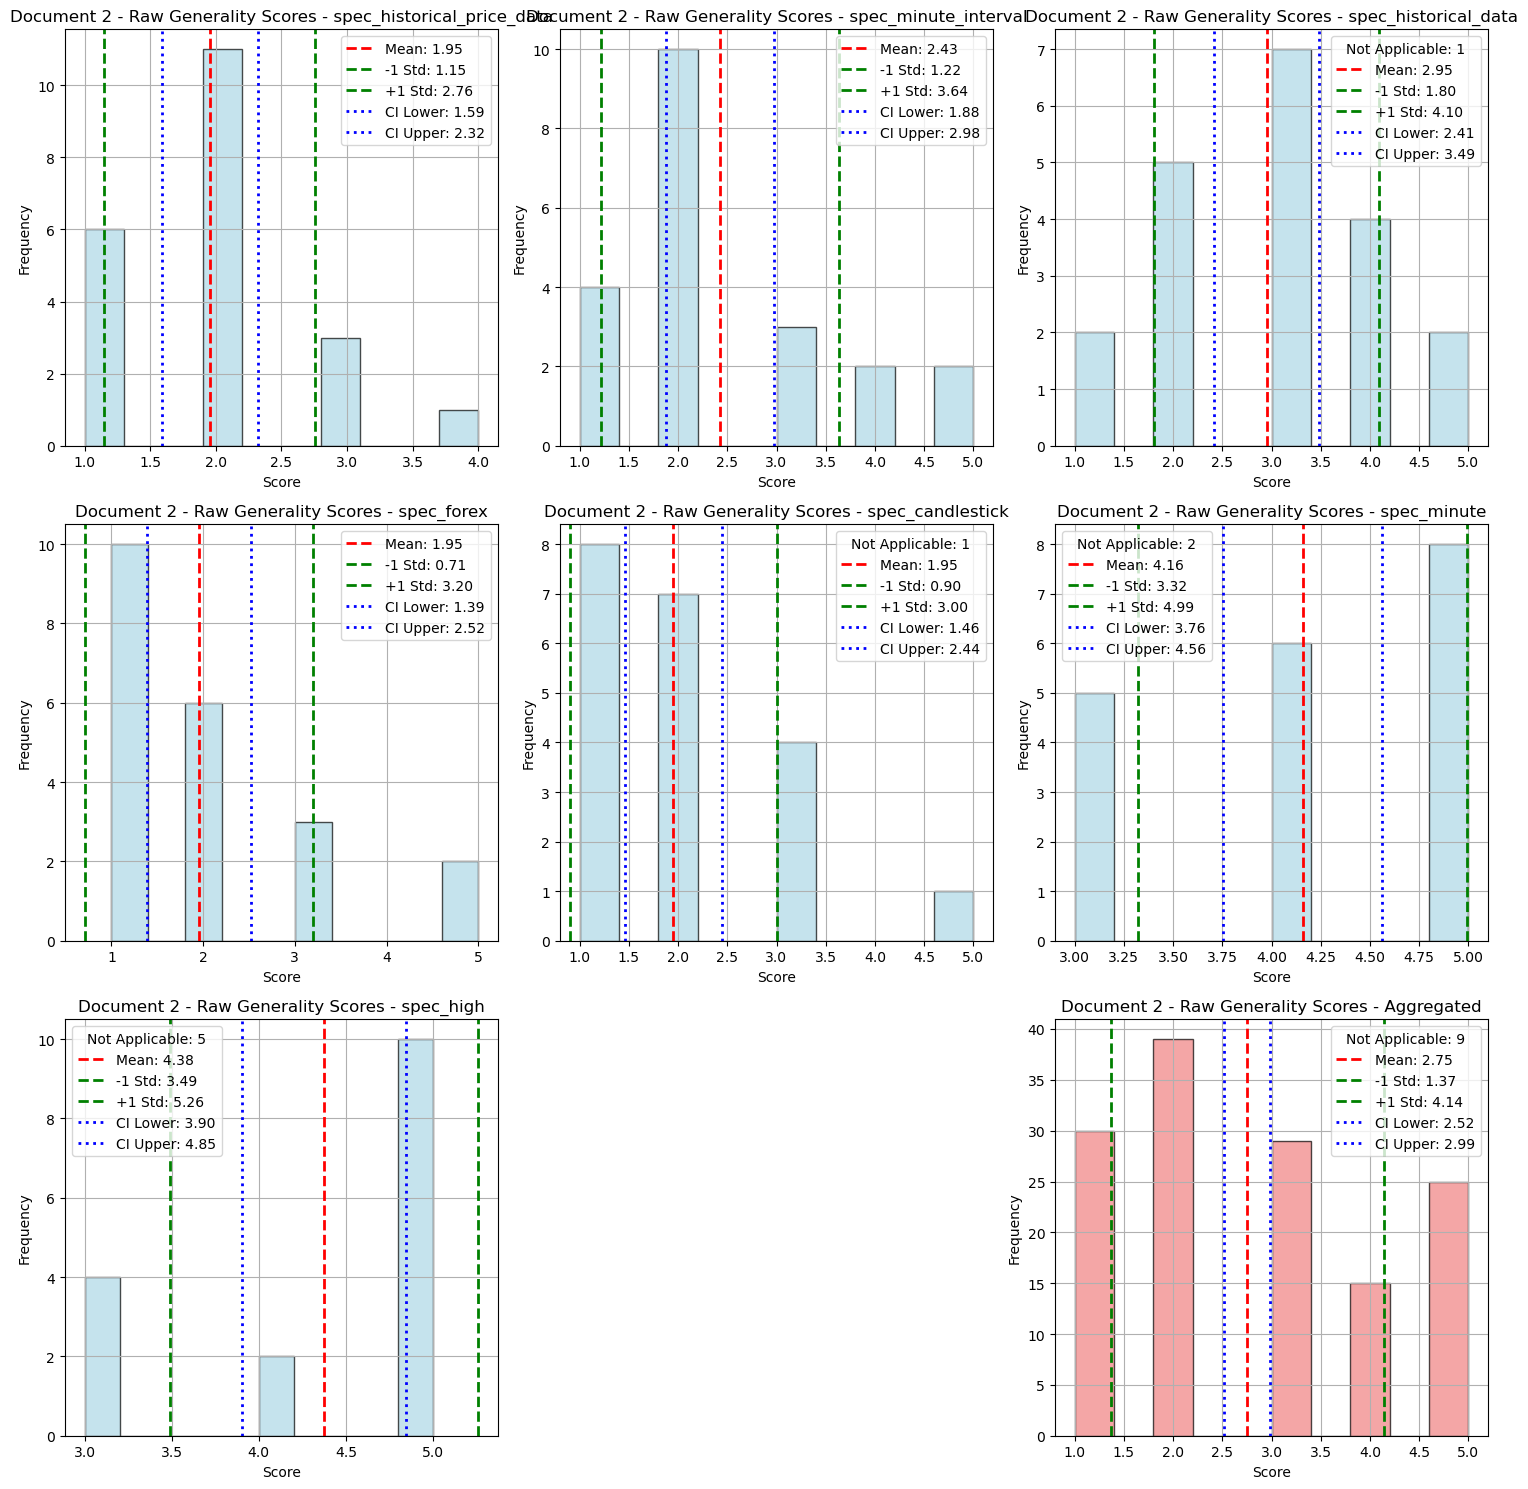

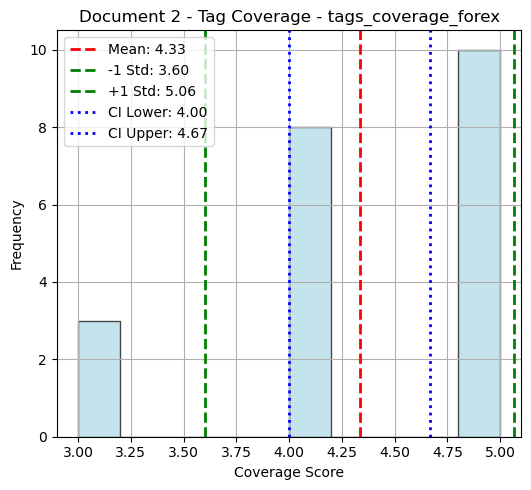

Correlation per Tag:
             Relevance vs Generality
historical                 -0.560465
minute                     -0.673298
forex                      -0.120149
candlestick                -0.325231
high                       -0.397410

Overall Correlations:
         Relevance vs Generality
Overall                -0.250655


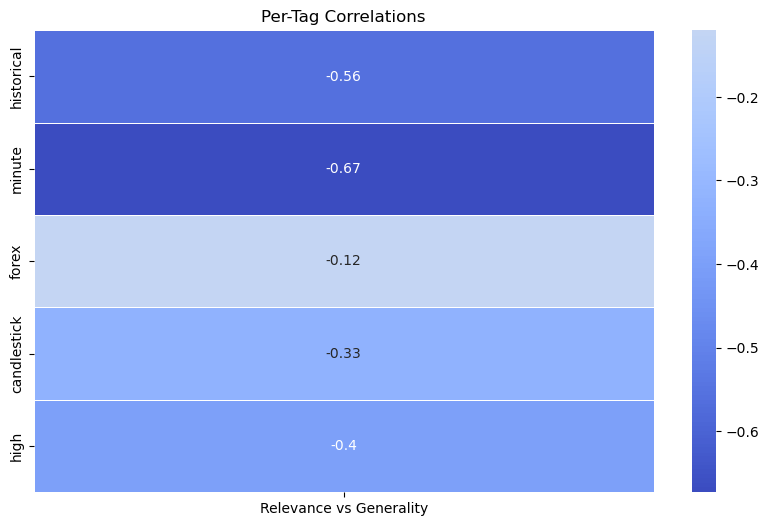

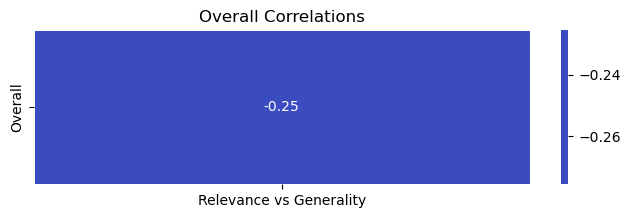


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_science  tag_cancer_research  \
std          0.643650    0.963624     0.870140             0.669043   
min          3.000000    2.000000     1.000000             3.000000   
max          5.000000    5.000000     5.000000             5.000000   
mean         4.714286    4.142857     2.571429             4.380952   

      tag_biology  tag_medicine  tag_health  
std      1.071270      0.870140    0.783764  
min      1.000000      2.000000    2.000000  
max      5.000000      5.000000    5.000000  
mean     2.952381      3.428571    3.285714  
Document 3 Generality Distribution:
      spec_lung_cancer  spec_cancer  spec_science  spec_cancer_research  \
std           0.928388     1.236354      1.167007              1.101946   
min           1.000000     1.000000      1.000000              1.000000   
max           4.000000     5.000000      5.000000              5.000000   
mean         

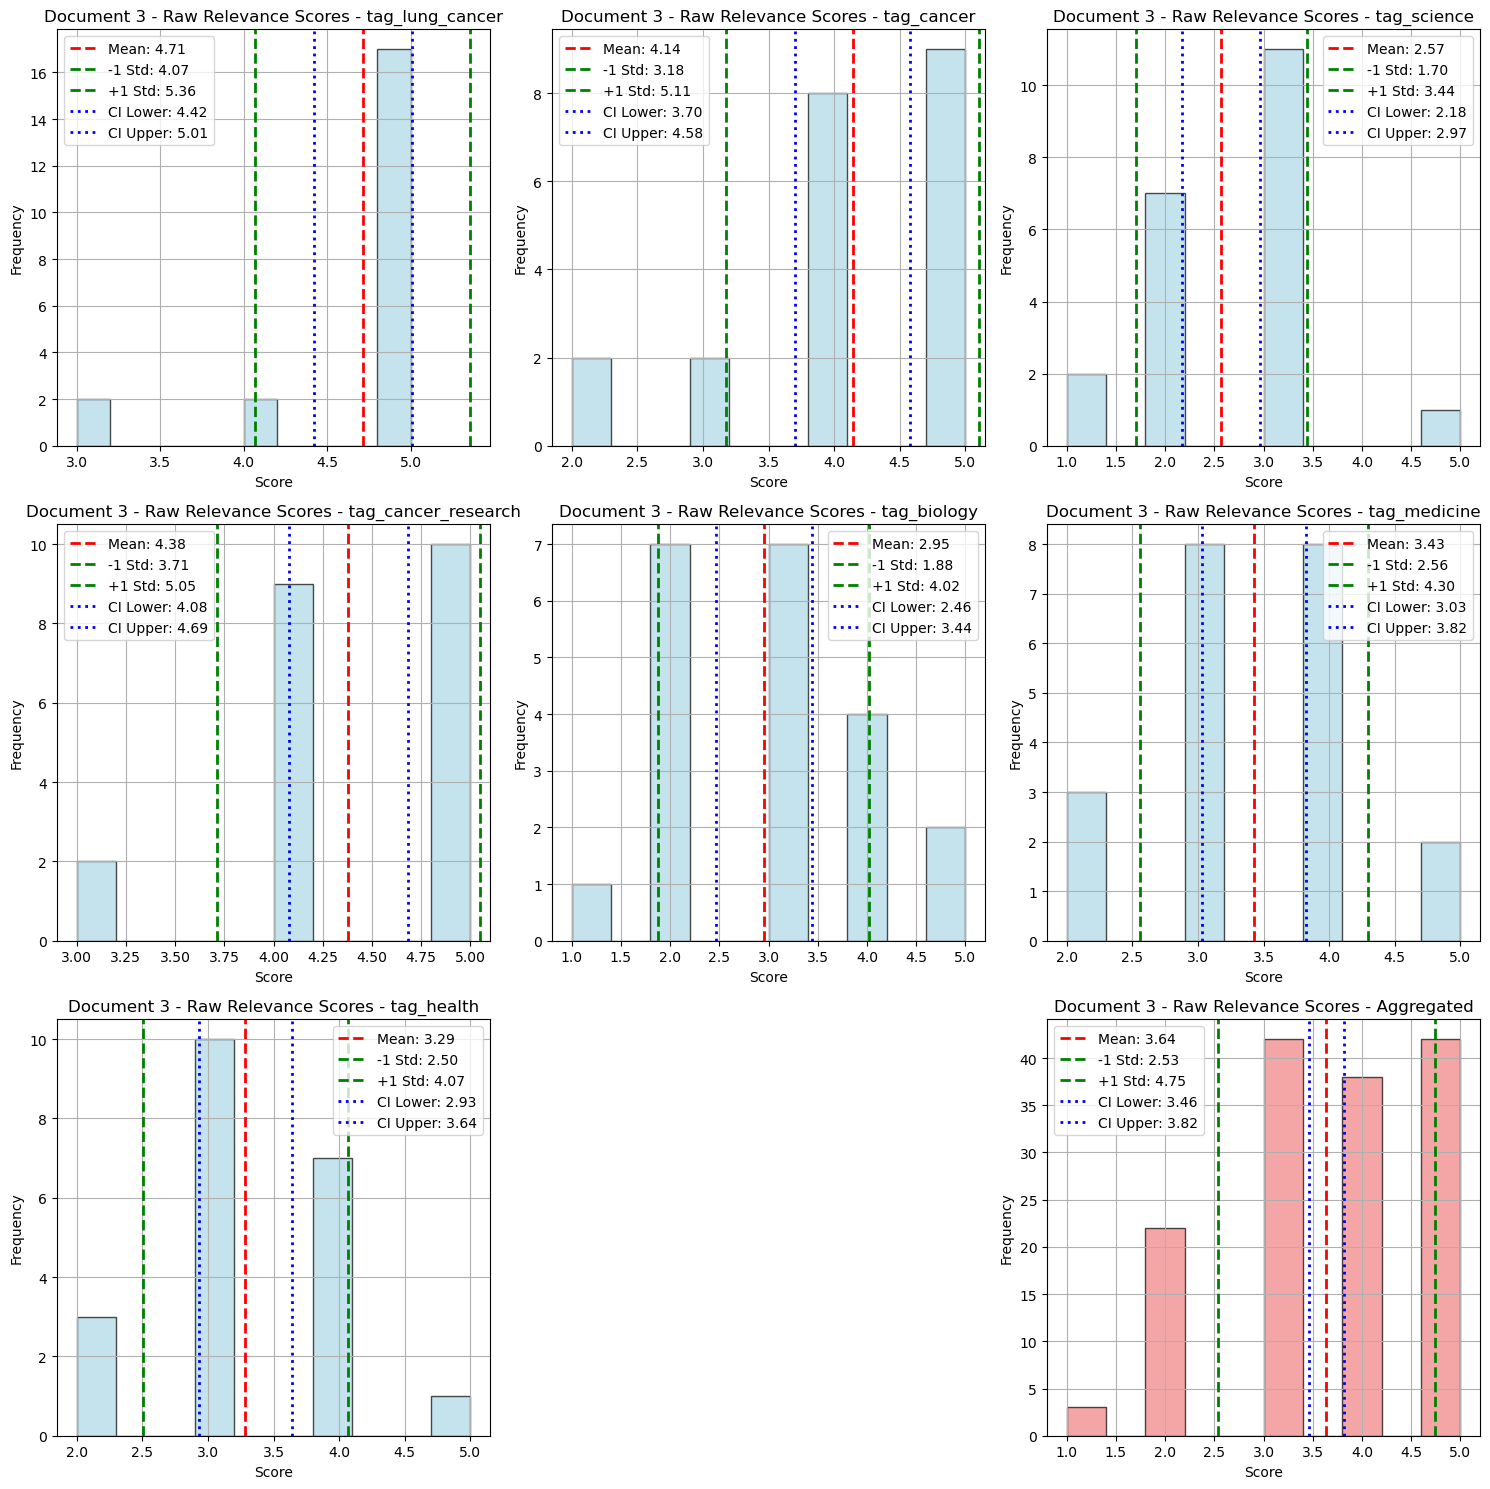

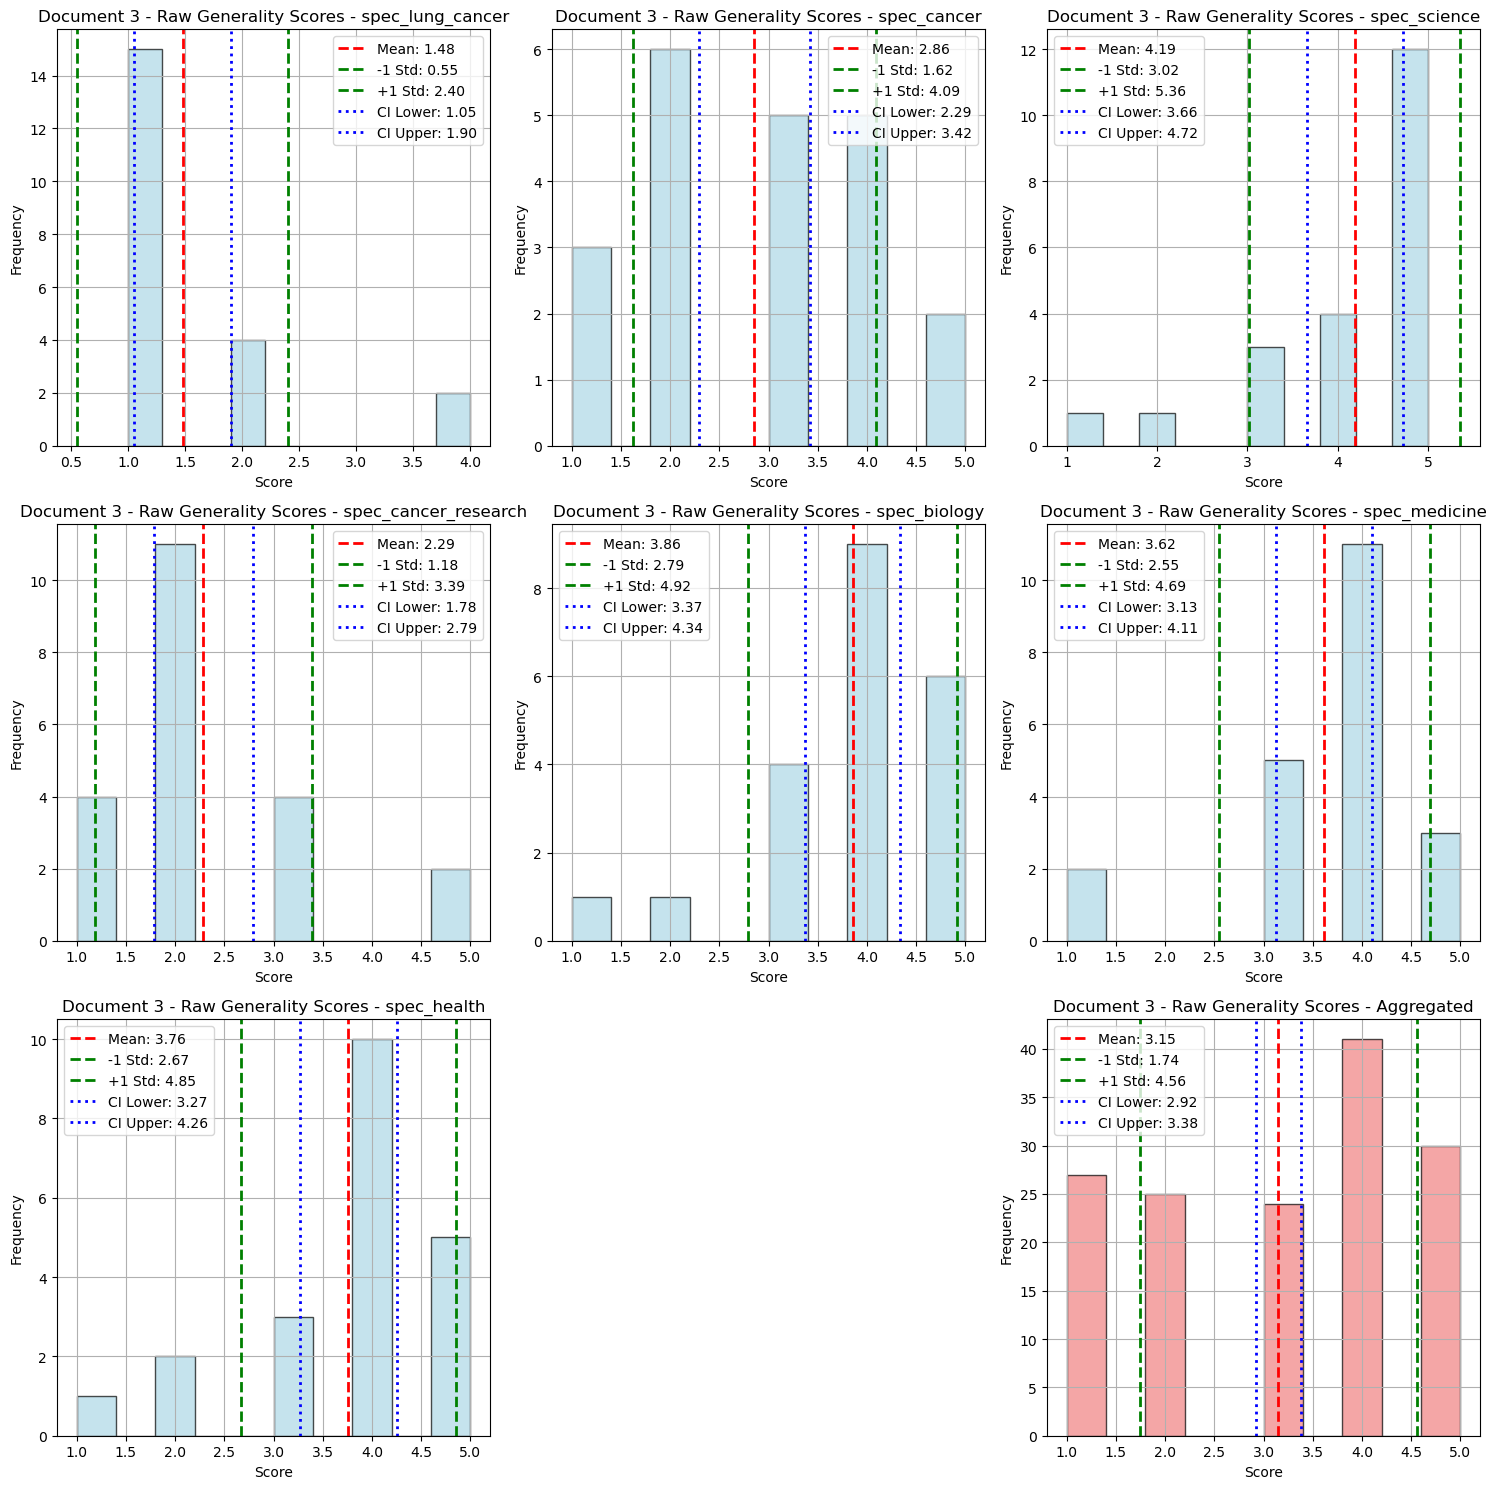

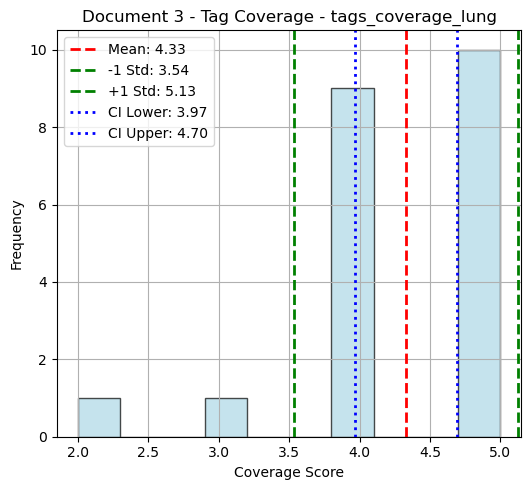

Correlation per Tag:
          Relevance vs Generality
lung                     0.301280
cancer                  -0.245632
science                 -0.261297
biology                 -0.593549
medicine                -0.574966
health                  -0.460452

Overall Correlations:
         Relevance vs Generality
Overall                -0.259002


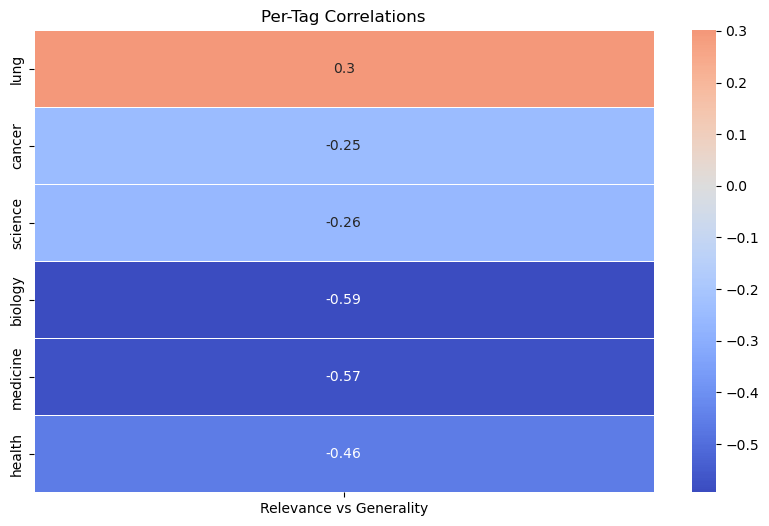

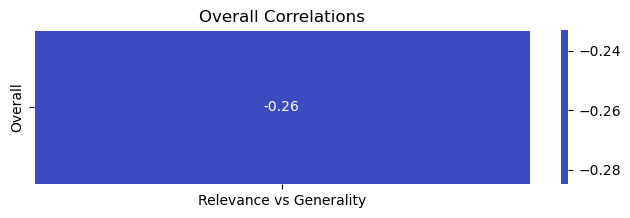

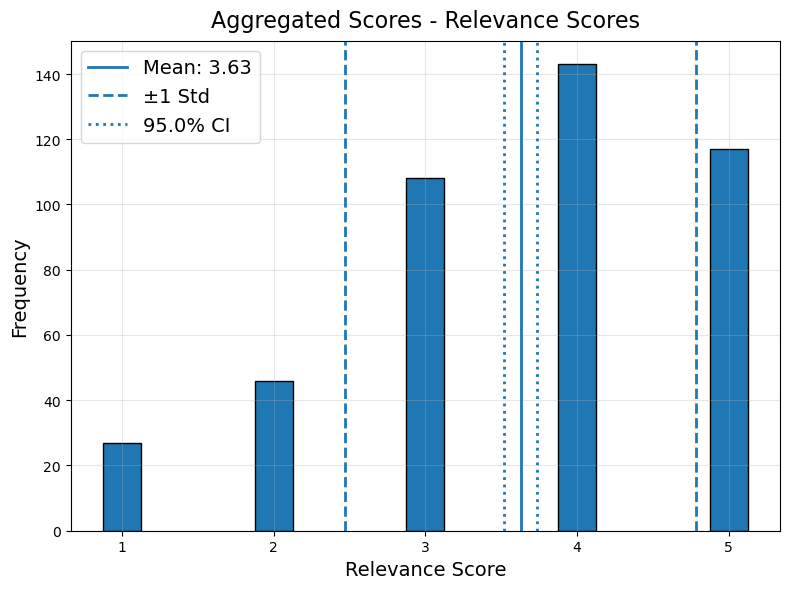

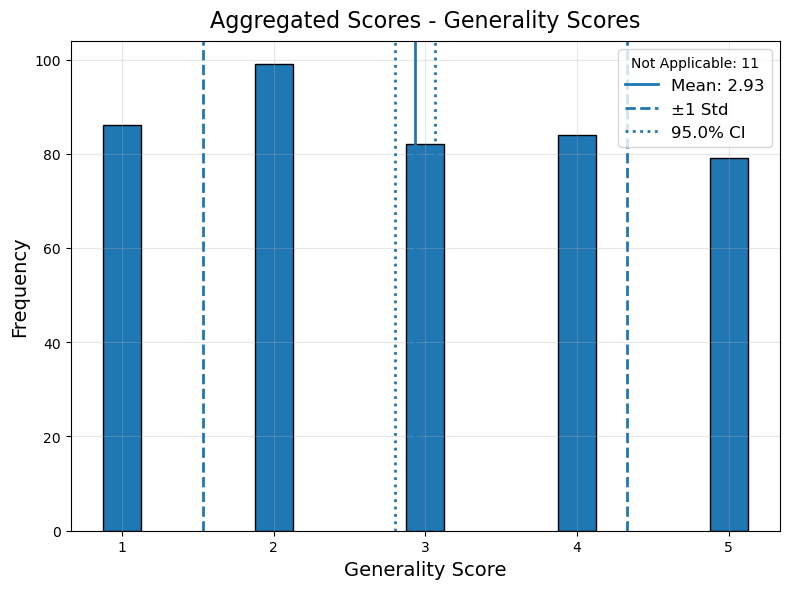

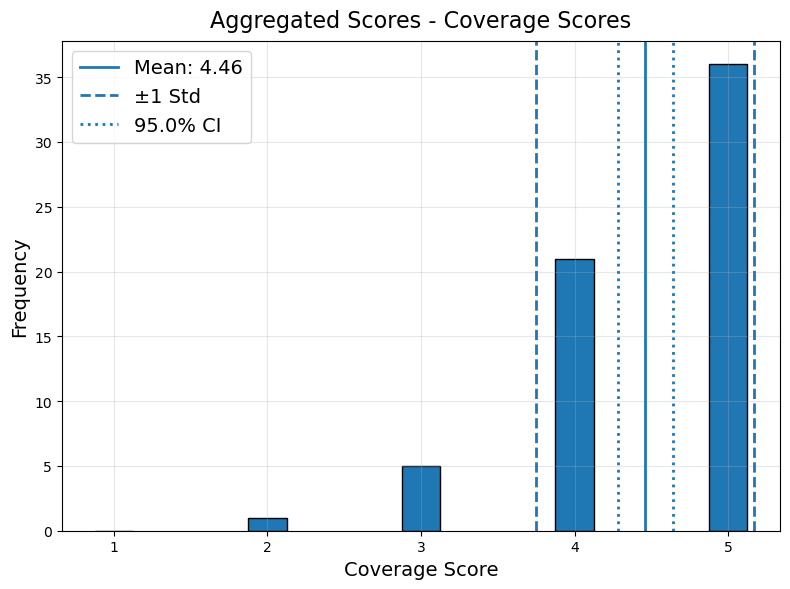


Aggregated Correlations (pandas):
            Relevance  Generality
Relevance    1.000000   -0.587024
Generality  -0.587024    1.000000


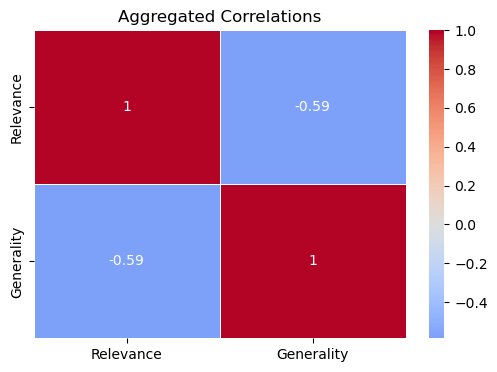

ICC for Relevance:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.342384  11.933536   20  420   
1   ICC2     Single random raters  0.350129  19.265228   20  400   
2   ICC3      Single fixed raters  0.465176  19.265228   20  400   
3  ICC1k  Average raters absolute  0.916203  11.933536   20  420   
4  ICC2k    Average random raters  0.918792  19.265228   20  400   
5  ICC3k     Average fixed raters  0.948093  19.265228   20  400   

           pval         CI95%  
0  2.881635e-30  [0.22, 0.53]  
1  7.718534e-47  [0.22, 0.54]  
2  7.718534e-47  [0.32, 0.65]  
3  2.881635e-30  [0.85, 0.96]  
4  7.718534e-47  [0.86, 0.96]  
5  7.718534e-47  [0.91, 0.98]


ICC for Generality:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.457076  18.679439   15  320   
1   ICC2     Single random raters  0.462784  31.714312   15  300   
2   ICC3      Single fixed raters  0.593923  31.714312   15  300   
3  ICC1k  Average raters absolute  0.946465  18.679439   15  320   
4  ICC2k    Average random raters  0.947618  31.714312   15  300   
5  ICC3k     Average fixed raters  0.968468  31.714312   15  300   

           pval         CI95%  
0  1.938177e-35   [0.3, 0.68]  
1  4.857755e-53   [0.3, 0.69]  
2  4.857755e-53  [0.43, 0.78]  
3  1.938177e-35   [0.9, 0.98]  
4  4.857755e-53   [0.9, 0.98]  
5  4.857755e-53  [0.94, 0.99]


ICC for Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.047959  2.057878    2   60  0.136645   
1   ICC2     Single random raters  0.074405  5.565217    2   40  0.007372   
2   ICC3      Single fixed raters  0.178571  5.565217    2   40  0.007372   
3  ICC1k  Average raters absolute  0.514063  2.057878    2   60  0.136645   
4  ICC2k    Average random raters  0.627990  5.565217    2   40  0.007372   
5  ICC3k     Average fixed raters  0.820313  5.565217    2   40  0.007372   

           CI95%  
0  [-0.02, 0.79]  
1   [0.01, 0.79]  
2   [0.02, 0.91]  
3  [-0.91, 0.99]  
4   [0.12, 0.99]  
5    [0.27, 1.0]


ICC for Shared Coverage:


Type              Description       ICC          F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.192000   5.990099    1   40  0.018872   
1   ICC2     Single random raters  0.204724  10.254237    1   20  0.004473   
2   ICC3      Single fixed raters  0.305882  10.254237    1   20  0.004473   
3  ICC1k  Average raters absolute  0.833058   5.990099    1   40  0.018872   
4  ICC2k    Average random raters  0.843895  10.254237    1   20  0.004473   
5  ICC3k     Average fixed raters  0.902479  10.254237    1   20  0.004473   

         CI95%  
0   [0.0, 1.0]  
1  [0.02, 1.0]  
2  [0.03, 1.0]  
3  [0.09, 1.0]  
4  [0.34, 1.0]  
5  [0.43, 1.0]


Fleiss' Kappa for Relevance: 0.1215
Fleiss' Kappa for Generality: 0.1767
Fleiss' Kappa for Coverage: 0.0090
Fleiss' Kappa for Shared Coverage: 0.0556

Krippendorff's Alpha for Relevance: 0.2263
Krippendorff's Alpha for Generality: 0.1671
Krippendorff's Alpha for Coverage: 0.5647
Krippendorff's Alpha for Shared Coverage: 0.2497


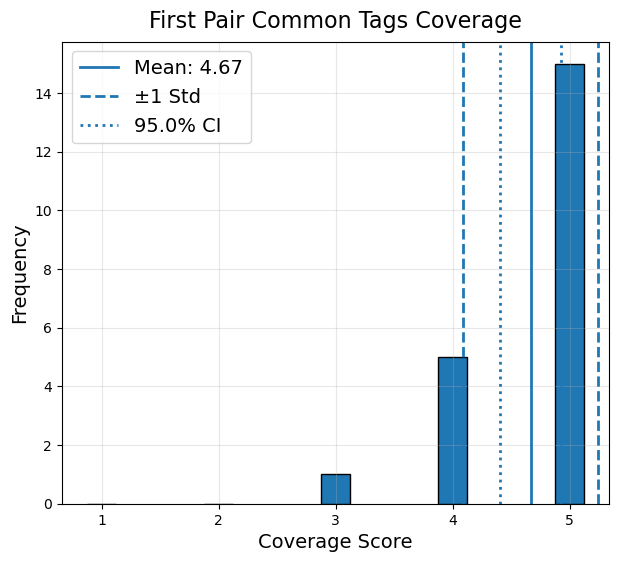

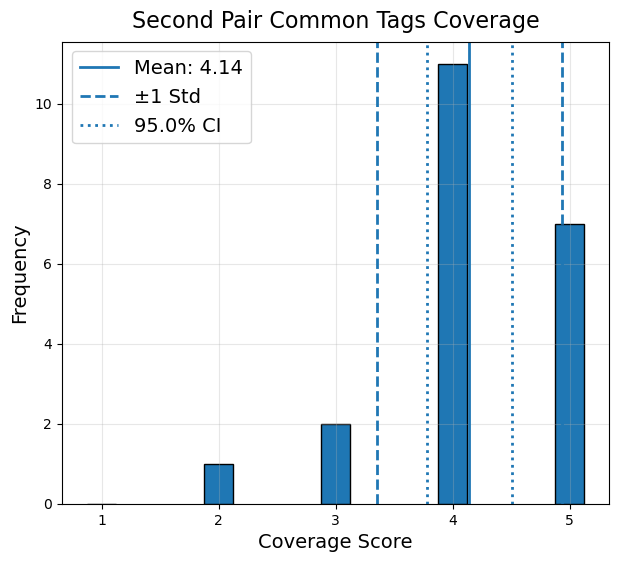


Metrics for First Pair Common Tags:
Accuracy: 0.87
Precision: 0.81
Recall: 0.87
Specificity: 0.87
F1-Score: 0.83

Metrics for Second Pair Common Tags:
Accuracy: 0.76
Precision: 0.58
Recall: 0.79
Specificity: 0.75
F1-Score: 0.67


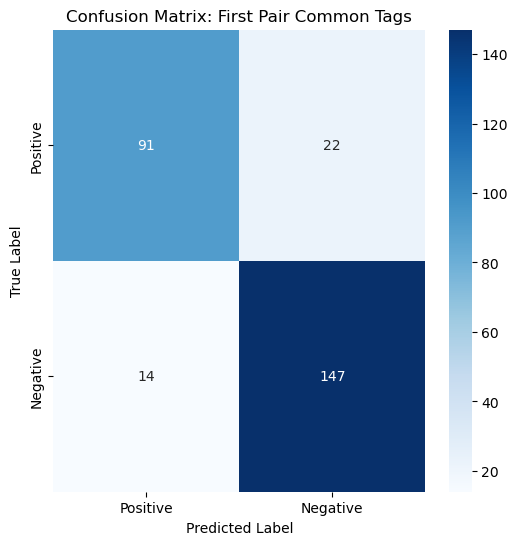

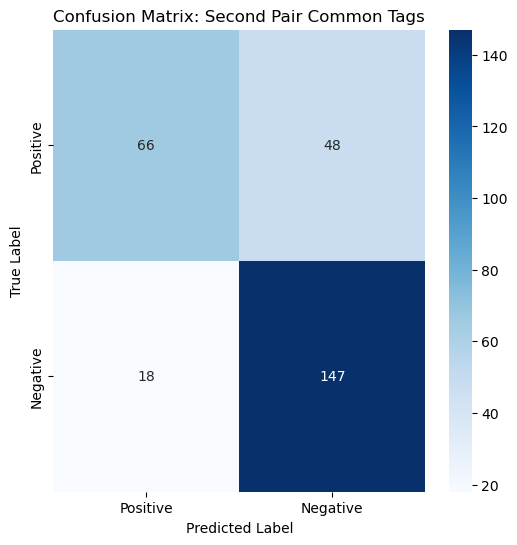

In [1084]:
analyze_tags(
    df_model_generated,
    relevance_columns_list=[
        model_first_document_relevance_columns, 
        model_second_document_relevance_columns,
        model_third_document_relevance_columns
    ],
    spec_columns_list=[
        model_first_document_spec_columns, 
        model_second_document_spec_columns,
        model_third_document_spec_columns
    ],
    coverage_columns_list=[
        model_first_document_coverage_columns, 
        model_second_document_coverage_columns,
        model_third_document_coverage_columns
    ],
    suggested_columns_list=[
        model_first_document_suggested_columns,
        model_second_document_suggested_columns,
        model_third_document_suggested_columns
    ],
    common_tags_columns_1=model_first_pair_common_tags_columns,
    common_tags_true_tags_1=model_first_pair_common_tags_true_tags,
    common_tags_coverage_1=model_first_pair_coverage,
    common_tags_columns_2=model_second_pair_common_tags_columns,
    common_tags_true_tags_2=model_second_pair_common_tags_true_tags,
    common_tags_coverage_2=model_second_pair_coverage_columns,
    save_path_aggregated="../../latex/thesis/figures/tags_analysis_model.pdf",
    save_path_correlations="../../latex/thesis/figures/tags_correlations_model.pdf",
    save_path_first_pair_coverage="../../latex/thesis/figures/first_pair_common_tags_coverage_model.pdf",
    save_path_second_pair_coverage="../../latex/thesis/figures/second_pair_common_tags_coverage_model.pdf",
    save_path_first_pair_confusion_matrix="../../latex/thesis/figures/first_pair_common_tags_confusion_matrix_model.pdf",
    save_path_second_pair_confusion_matrix="../../latex/thesis/figures/second_pair_common_tags_confusion_matrix_model.pdf"
)

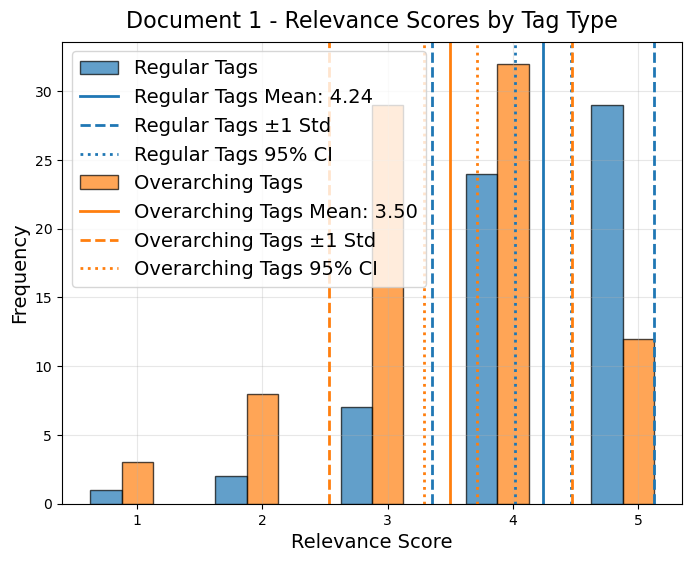

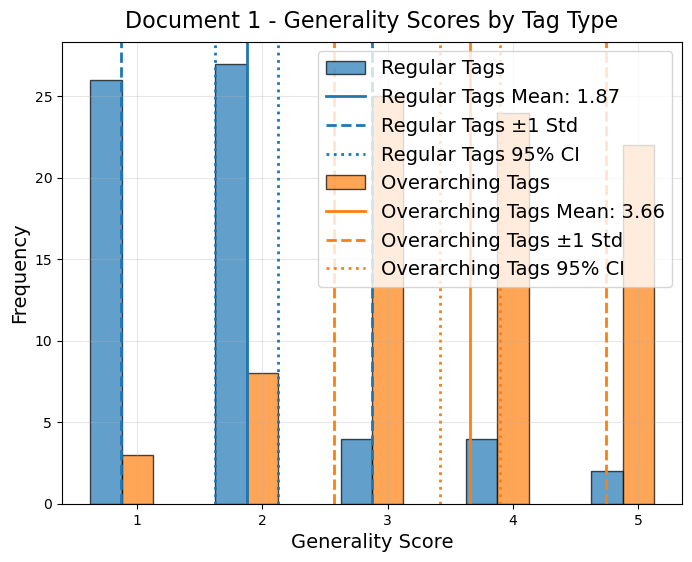

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_6358/240806820.py:4: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


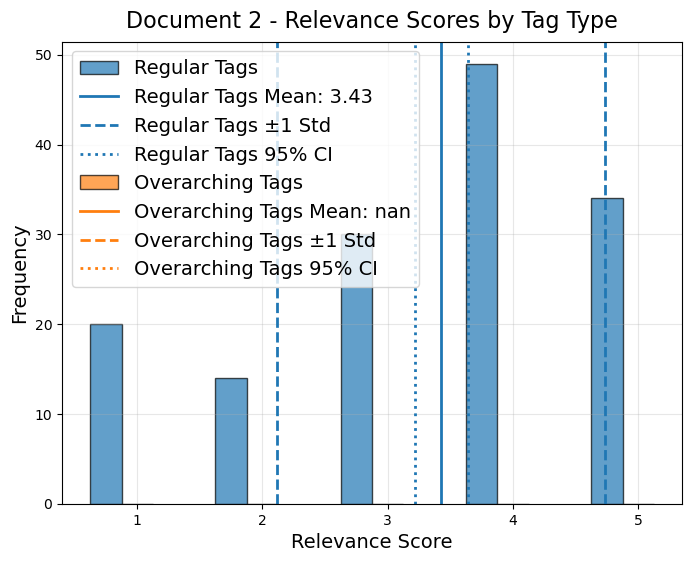

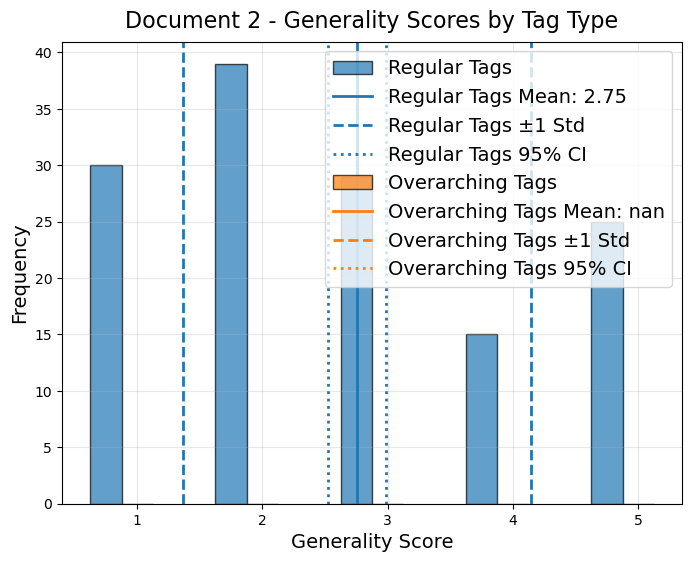

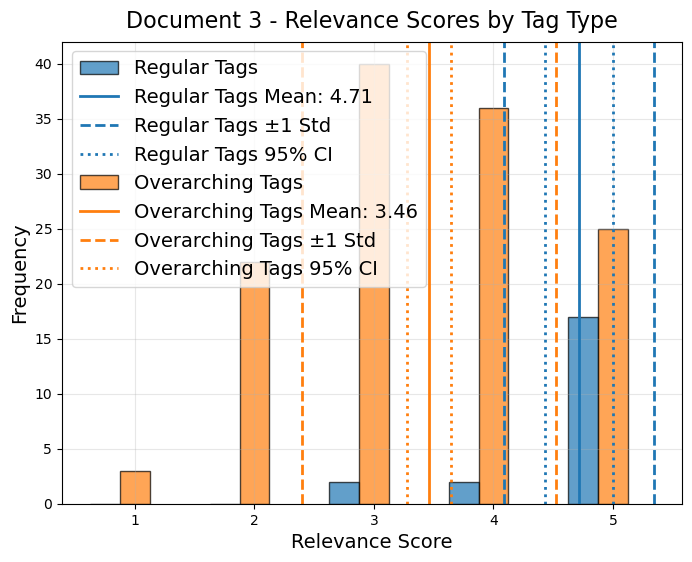

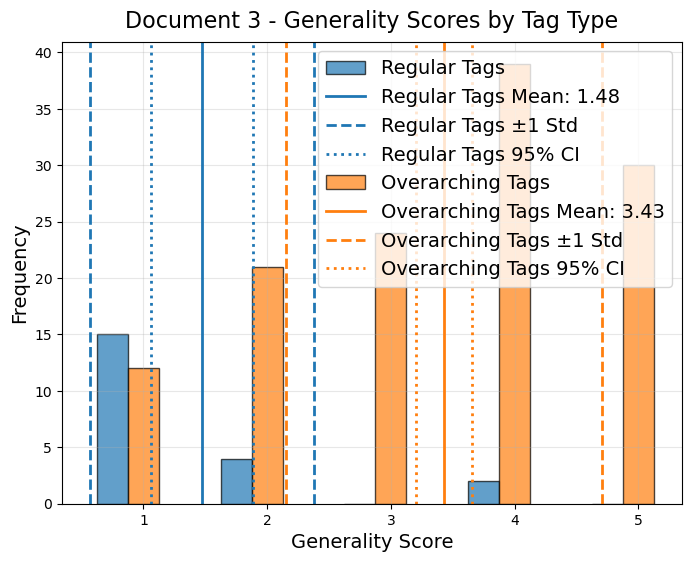

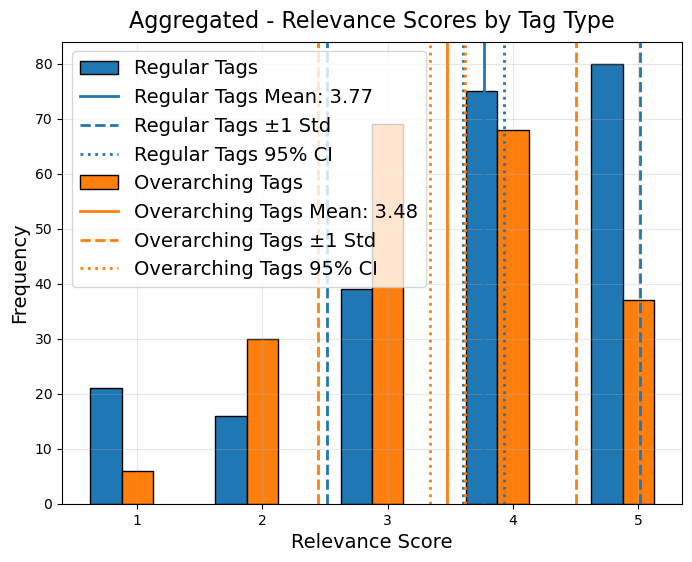

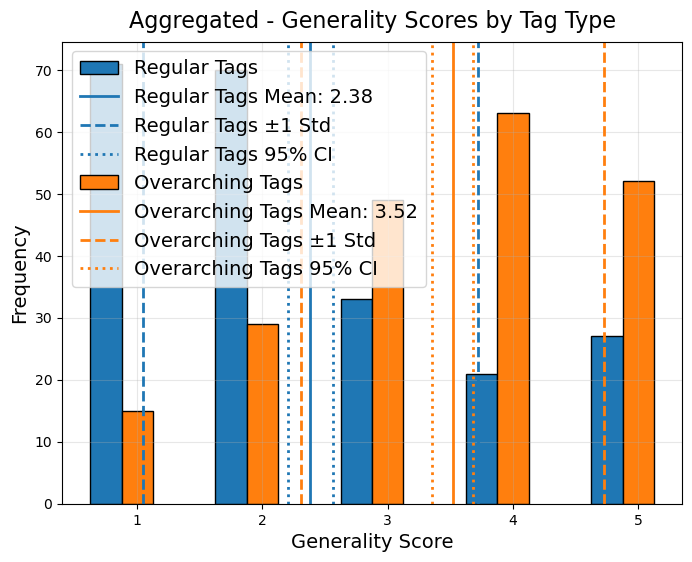

In [1085]:
doc_relevance_columns_list = [
    model_first_document_relevance_columns,
    model_second_document_relevance_columns,
    model_third_document_relevance_columns
]

doc_spec_columns_list = [
    model_first_document_spec_columns,
    model_second_document_spec_columns,
    model_third_document_spec_columns
]

doc_tag_types_list = [
    model_first_document_tag_types,
    model_second_document_tag_types,
    model_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_model_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names,
                                              save_path="../../latex/thesis/figures/tags_analysis_model_multiple_documents.pdf")

In [1086]:
def prepare_data_for_kruskal(df, relevance_columns_list, spec_columns_list, coverage_columns_list, shared_coverage_columns_list):
    all_relevance_data = []
    all_spec_data = []
    all_coverage_data = []
    all_shared_coverage_data = []
    
    for relevance_columns, spec_columns, coverage_columns, shared_coverage_columns in zip(relevance_columns_list, spec_columns_list, coverage_columns_list, shared_coverage_columns_list):
        # Preprocess numerical columns
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        # Extract the data for each document
        relevance_data = df[relevance_columns].values.flatten()
        spec_data = df[spec_columns].dropna().values.flatten()
        coverage_data = df[coverage_columns].values.flatten()
        shared_coverage_data = df[shared_coverage_columns].values.flatten()
        
        all_relevance_data.extend(relevance_data)
        all_spec_data.extend(spec_data)
        all_coverage_data.extend(coverage_data)
        all_shared_coverage_data.extend(shared_coverage_data)
    
    return all_relevance_data, all_spec_data, all_coverage_data, all_shared_coverage_data

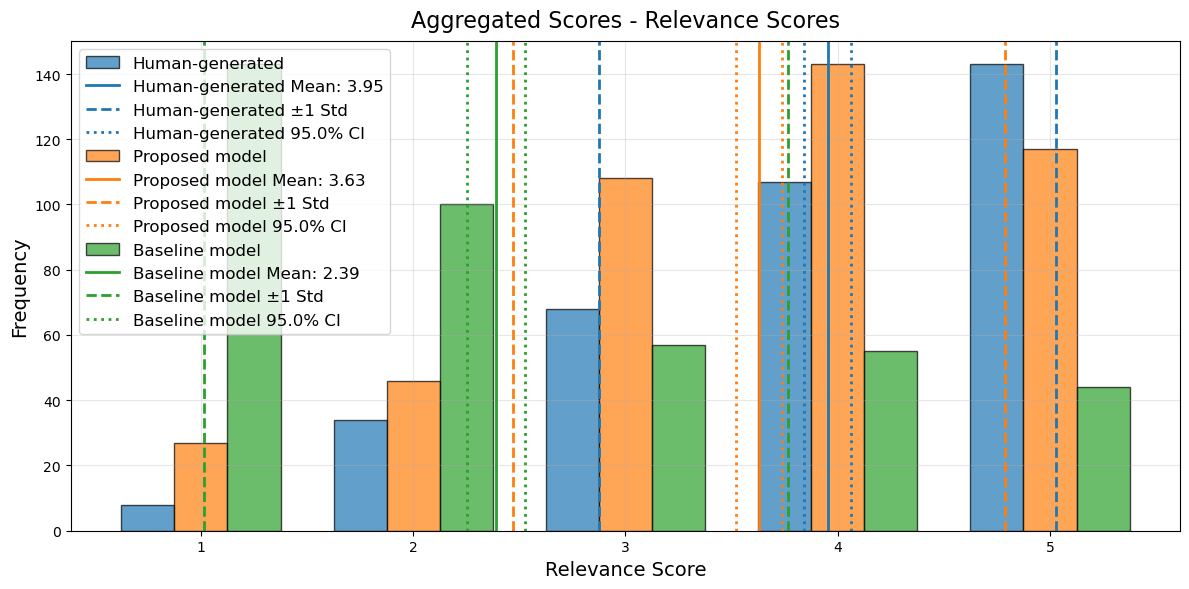

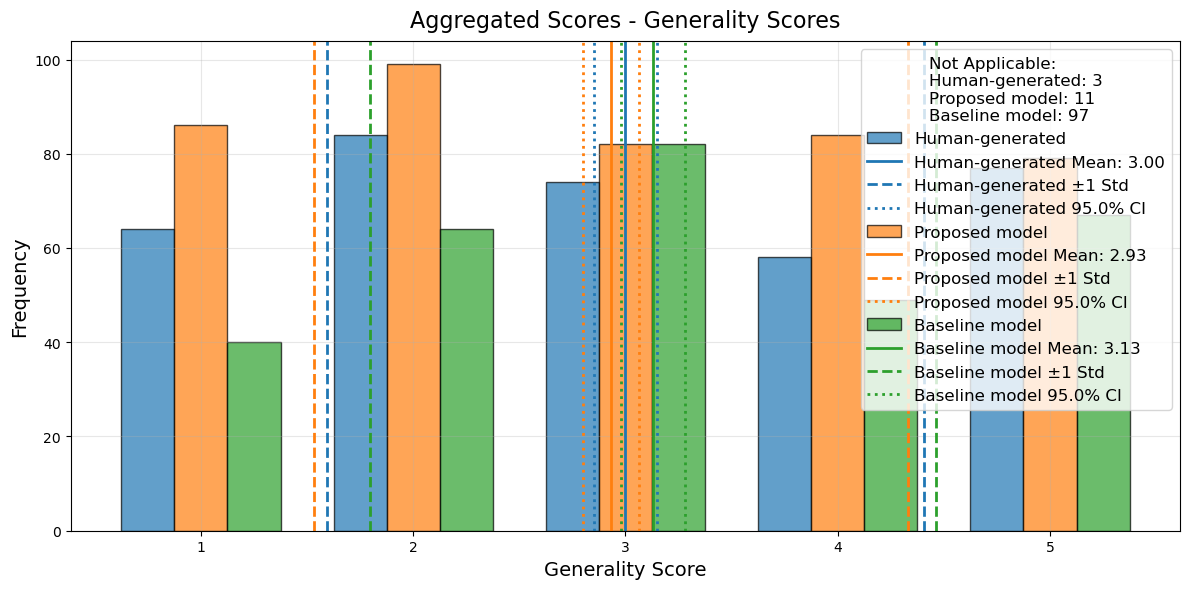

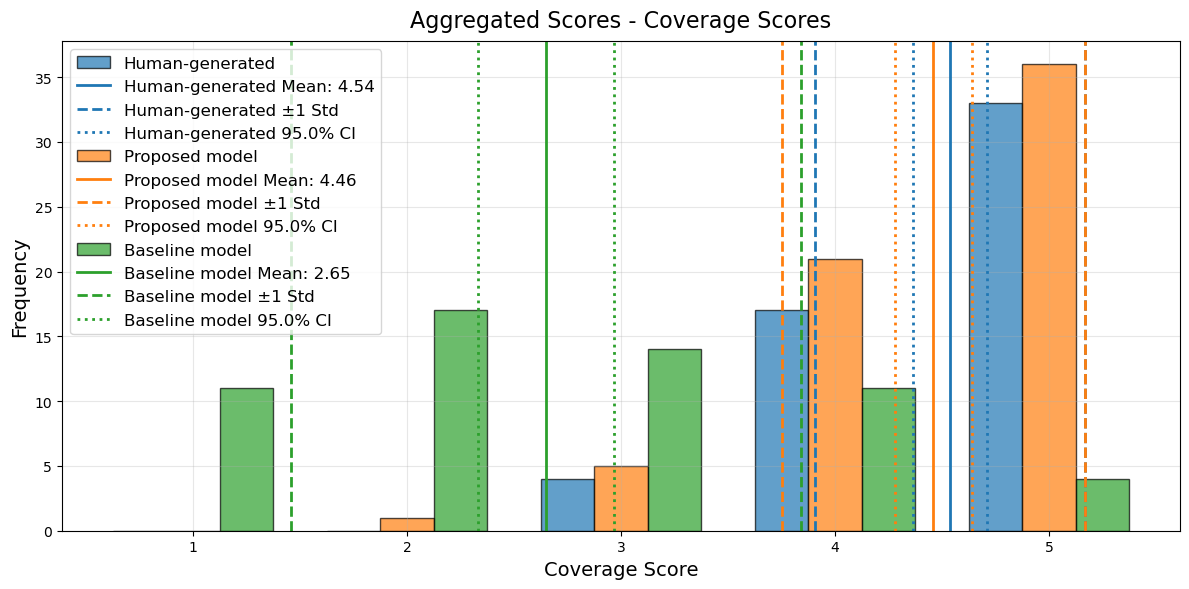

In [1087]:
def plot_comparative_aggregated_scores_from_dfs(df_human, df_model, df_baseline,
                                              human_relevance_columns_list, human_spec_columns_list, human_coverage_columns_list,
                                              model_relevance_columns_list, model_spec_columns_list, model_coverage_columns_list,
                                              baseline_relevance_columns_list, baseline_spec_columns_list, baseline_coverage_columns_list,
                                              title_prefix="Aggregated Scores", confidence_level=0.95, save_path=None):
    """
    Processes and plots comparative distributions of scores between human, model, and baseline data.
    """
    # Create copies of dataframes to avoid modifying originals
    df_human = df_human.copy()
    df_model = df_model.copy()
    df_baseline = df_baseline.copy()
    
    # Process human data
    human_relevance_data = []
    human_spec_data = []
    human_coverage_data = []
    
    for relevance_columns, spec_columns, coverage_columns in zip(
            human_relevance_columns_list, human_spec_columns_list, human_coverage_columns_list):
        columns_to_preprocess = relevance_columns + spec_columns
        df_human = preprocess_numerical_columns(df_human, columns_to_preprocess)
        
        human_relevance_data.extend(df_human[relevance_columns].values.flatten())
        human_spec_data.extend(df_human[spec_columns].values.flatten())
        human_coverage_data.extend(df_human[coverage_columns].values.flatten())
    
    # Process model data
    model_relevance_data = []
    model_spec_data = []
    model_coverage_data = []
    
    for relevance_columns, spec_columns, coverage_columns in zip(
            model_relevance_columns_list, model_spec_columns_list, model_coverage_columns_list):
        columns_to_preprocess = relevance_columns + spec_columns
        df_model = preprocess_numerical_columns(df_model, columns_to_preprocess)
        
        model_relevance_data.extend(df_model[relevance_columns].values.flatten())
        model_spec_data.extend(df_model[spec_columns].values.flatten())
        model_coverage_data.extend(df_model[coverage_columns].values.flatten())
    
    # Process baseline data
    baseline_relevance_data = []
    baseline_spec_data = []
    baseline_coverage_data = []
    
    for relevance_columns, spec_columns, coverage_columns in zip(
            baseline_relevance_columns_list, baseline_spec_columns_list, baseline_coverage_columns_list):
        columns_to_preprocess = relevance_columns + spec_columns
        df_baseline = preprocess_numerical_columns(df_baseline, columns_to_preprocess)
        
        baseline_relevance_data.extend(df_baseline[relevance_columns].values.flatten())
        baseline_spec_data.extend(df_baseline[spec_columns].values.flatten())
        baseline_coverage_data.extend(df_baseline[coverage_columns].values.flatten())
    
    # Convert to numpy arrays
    human_relevance_data = np.array(human_relevance_data)
    human_spec_data = np.array(human_spec_data)
    human_coverage_data = np.array(human_coverage_data)
    
    model_relevance_data = np.array(model_relevance_data)
    model_spec_data = np.array(model_spec_data)
    model_coverage_data = np.array(model_coverage_data)
    
    baseline_relevance_data = np.array(baseline_relevance_data)
    baseline_spec_data = np.array(baseline_spec_data)
    baseline_coverage_data = np.array(baseline_coverage_data)
    
    # Plot comparisons with the new plotting function that handles three datasets
    plt.figure(figsize=(12, 6))
    plot_three_way_distribution_with_stats(
        human_data=human_relevance_data,
        model_data=model_relevance_data,
        baseline_data=baseline_relevance_data,
        title=f'{title_prefix} - Relevance Scores',
        xlabel='Relevance Score',
        confidence_level=confidence_level
    )
    plt.tight_layout()
    if save_path:
        save_path_base = save_path.replace('.pdf', '')
        plt.savefig(f"{save_path_base}_relevance_comparison.pdf", bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

    plt.figure(figsize=(12, 6))
    nan_count_spec_human = np.isnan(human_spec_data).sum()
    nan_count_spec_model = np.isnan(model_spec_data).sum()
    nan_count_spec_baseline = np.isnan(baseline_spec_data).sum()
    plot_three_way_distribution_with_stats(
        human_data=human_spec_data,
        model_data=model_spec_data,
        baseline_data=baseline_spec_data,
        title=f'{title_prefix} - Generality Scores',
        xlabel='Generality Score',
        confidence_level=confidence_level,
        nan_count_human=nan_count_spec_human,
        nan_count_model=nan_count_spec_model,
        nan_count_baseline=nan_count_spec_baseline
    )
    plt.tight_layout()
    if save_path:
        save_path_base = save_path.replace('.pdf', '')
        plt.savefig(f"{save_path_base}_generality_comparison.pdf", bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_three_way_distribution_with_stats(
        human_data=human_coverage_data,
        model_data=model_coverage_data,
        baseline_data=baseline_coverage_data,
        title=f'{title_prefix} - Coverage Scores',
        xlabel='Coverage Score',
        confidence_level=confidence_level
    )
    plt.tight_layout()
    if save_path:
        save_path_base = save_path.replace('.pdf', '')
        plt.savefig(f"{save_path_base}_coverage_comparison.pdf", bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

def plot_three_way_distribution_with_stats(human_data, model_data, baseline_data, 
                                         title, xlabel, confidence_level=0.95,
                                         nan_count_human=None, nan_count_model=None,
                                         nan_count_baseline=None):
    """
    Plots comparative distribution of scores with statistics for human, model, and baseline data.
    """
    human_data = np.array(human_data)[~np.isnan(human_data)]
    model_data = np.array(model_data)[~np.isnan(model_data)]
    baseline_data = np.array(baseline_data)[~np.isnan(baseline_data)]
    
    # Calculate statistics for all three datasets
    datasets = [
        (human_data, '#1f77b4', 'Human-generated'),
        (model_data, '#ff7f0e', 'Proposed model'),
        (baseline_data, '#2ca02c', 'Baseline model')
    ]
    
    bar_width = 0.25  # Narrower to accommodate three bars
    
    for i, (data, color, label) in enumerate(datasets):
        # Calculate statistics
        mean = data.mean()
        std = data.std()
        n = len(data)
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
        
        # Create offset bins
        bins = np.arange(0.5 + (i-1)*bar_width, 6.5 + (i-1)*bar_width, 1)
        
        # Plot histogram
        plt.hist(data, bins=bins, color=color, edgecolor='black',
                rwidth=bar_width, label=label, alpha=0.7)
        
        # Plot statistics
        plt.axvline(mean, color=color, linestyle='solid', linewidth=2,
                   label=f'{label} Mean: {mean:.2f}')
        plt.axvline(mean - std, color=color, linestyle='dashed',
                   linewidth=2, label=f'{label} ±1 Std')
        plt.axvline(mean + std, color=color, linestyle='dashed',
                   linewidth=2)
        plt.axvline(ci_lower, color=color, linestyle='dotted',
                   linewidth=2, label=f'{label} {confidence_level*100}% CI')
        plt.axvline(ci_upper, color=color, linestyle='dotted',
                   linewidth=2)
    
    plt.title(title, fontsize=16, pad=10)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(range(1, 6))
    
    # Add legend with NA counts if any
    if any(count is not None and count > 0 for count in [nan_count_human, nan_count_model, nan_count_baseline]):
        legend_title = "Not Applicable:"
        if nan_count_human is not None:
            legend_title += f"\nHuman-generated: {nan_count_human}"
        if nan_count_model is not None:
            legend_title += f"\nProposed model: {nan_count_model}"
        if nan_count_baseline is not None:
            legend_title += f"\nBaseline model: {nan_count_baseline}"
        plt.legend(title=legend_title, fontsize=12, title_fontsize=12)
    else:
        plt.legend(fontsize=12)


plot_comparative_aggregated_scores_from_dfs(
    df_human=df_human_generated,
    df_model=df_model_generated,
    df_baseline=df_baseline_generated,
    human_relevance_columns_list=[
        human_first_document_relevance_columns,
        human_second_document_relevance_columns,
        human_third_document_relevance_columns
    ],
    human_spec_columns_list=[
        human_first_document_spec_columns,
        human_second_document_spec_columns,
        human_third_document_spec_columns
    ],
    human_coverage_columns_list=[
        human_first_document_coverage_columns,
        human_second_document_coverage_columns,
        human_third_document_coverage_columns
    ],
    model_relevance_columns_list=[
        model_first_document_relevance_columns,
        model_second_document_relevance_columns,
        model_third_document_relevance_columns
    ],
    model_spec_columns_list=[
        model_first_document_spec_columns,
        model_second_document_spec_columns,
        model_third_document_spec_columns
    ],
    model_coverage_columns_list=[
        model_first_document_coverage_columns,
        model_second_document_coverage_columns,
        model_third_document_coverage_columns
    ],
    baseline_relevance_columns_list=[
        baseline_first_document_relevance_columns,
        baseline_second_document_relevance_columns,
        baseline_third_document_relevance_columns
    ],
    baseline_spec_columns_list=[
        baseline_first_document_spec_columns,
        baseline_second_document_spec_columns,
        baseline_third_document_spec_columns
    ],
    baseline_coverage_columns_list=[
        baseline_first_document_coverage_columns,
        baseline_second_document_coverage_columns,
        baseline_third_document_coverage_columns
    ],
    save_path="../../latex/thesis/figures/tags_analysis.pdf"
)

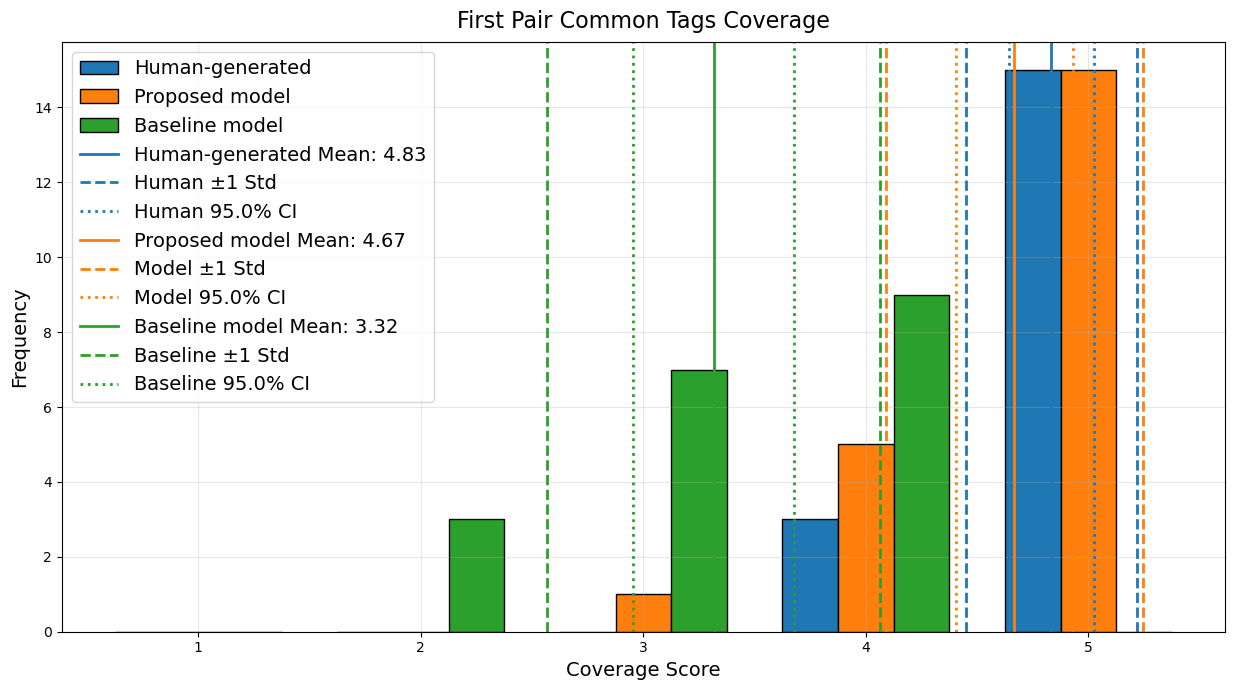

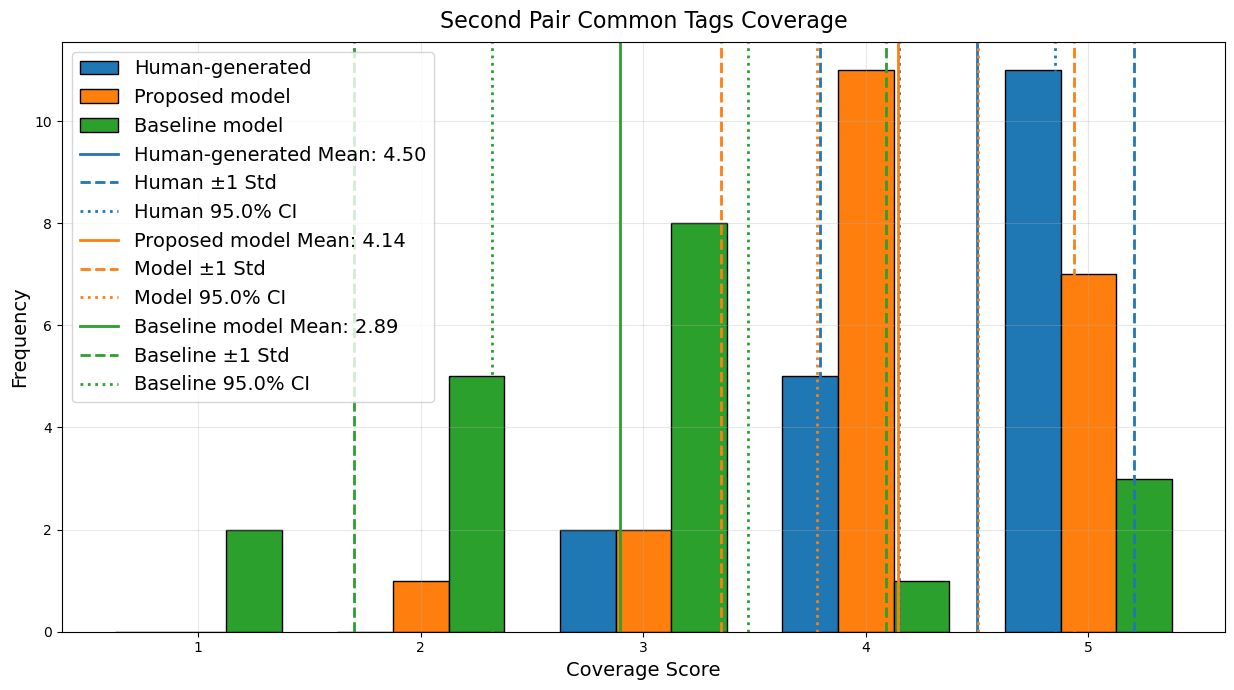

In [1103]:
def plot_comparative_tags_coverage(df_human, df_model, df_baseline,
                                 coverage_columns_human, coverage_columns_model, coverage_columns_baseline,
                                 title_prefix, n_cols=3, confidence_level=0.95, 
                                 save_path=None):
    """
    Plots coverage scores comparing human, model, and baseline data side by side.
    """
    num_columns = len(coverage_columns_human)
    n_rows = (num_columns + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12 * n_cols, 7 * n_rows))
    
    axs = axs.flatten()
    bar_width = 0.25  # Reduced width to accommodate three bars

    for i, (col_human, col_model, col_baseline) in enumerate(zip(coverage_columns_human, 
                                                               coverage_columns_model,
                                                               coverage_columns_baseline)):
        # Process human data
        data_human = df_human[col_human].dropna()
        nan_count_human = df_human[col_human].isna().sum()
        mean_human = data_human.mean()
        std_human = data_human.std()
        n_human = len(data_human)
        
        # Process model data
        data_model = df_model[col_model].dropna()
        nan_count_model = df_model[col_model].isna().sum()
        mean_model = data_model.mean()
        std_model = data_model.std()
        n_model = len(data_model)
        
        # Process baseline data
        data_baseline = df_baseline[col_baseline].dropna()
        nan_count_baseline = df_baseline[col_baseline].isna().sum()
        mean_baseline = data_baseline.mean()
        std_baseline = data_baseline.std()
        n_baseline = len(data_baseline)
        
        # Calculate confidence intervals for all three
        for data, n, std, mean in [(data_human, n_human, std_human, mean_human),
                                  (data_model, n_model, std_model, mean_model),
                                  (data_baseline, n_baseline, std_baseline, mean_baseline)]:
            if n > 1:
                t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
                margin_of_error = t_stat * (std / np.sqrt(n))
                if data is data_human:
                    ci_lower_human = mean - margin_of_error
                    ci_upper_human = mean + margin_of_error
                elif data is data_model:
                    ci_lower_model = mean - margin_of_error
                    ci_upper_model = mean + margin_of_error
                else:
                    ci_lower_baseline = mean - margin_of_error
                    ci_upper_baseline = mean + margin_of_error
            else:
                if data is data_human:
                    ci_lower_human = ci_upper_human = mean
                elif data is data_model:
                    ci_lower_model = ci_upper_model = mean
                else:
                    ci_lower_baseline = ci_upper_baseline = mean

        # Create bins with offset for side-by-side bars
        bins_human = np.arange(0.5 - bar_width, 6.5 - bar_width, 1)
        bins_model = np.arange(0.5, 6.5, 1)
        bins_baseline = np.arange(0.5 + bar_width, 6.5 + bar_width, 1)
        
        # Plot histograms
        axs[i].hist(data_human, bins=bins_human, color='#1f77b4', 
                   edgecolor='black', rwidth=bar_width, label='Human-generated')
        axs[i].hist(data_model, bins=bins_model, color='#ff7f0e', 
                   edgecolor='black', rwidth=bar_width, label='Proposed model')
        axs[i].hist(data_baseline, bins=bins_baseline, color='#2ca02c', 
                   edgecolor='black', rwidth=bar_width, label='Baseline model')
        
        axs[i].set_title(f'{title_prefix}', fontsize=16, pad=10)
        axs[i].set_xlabel('Coverage Score', fontsize=14)
        axs[i].set_ylabel('Frequency', fontsize=14)
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xticks(range(1, 6))
        
        # Plot statistics for human data
        axs[i].axvline(mean_human, color='#1f77b4', linestyle='solid', linewidth=2,
                      label=f'Human-generated Mean: {mean_human:.2f}')
        axs[i].axvline(mean_human - std_human, color='#1f77b4', linestyle='dashed', 
                      linewidth=2, label=f'Human ±1 Std')
        axs[i].axvline(mean_human + std_human, color='#1f77b4', linestyle='dashed', 
                      linewidth=2)
        axs[i].axvline(ci_lower_human, color='#1f77b4', linestyle='dotted', 
                      linewidth=2, label=f'Human {confidence_level*100}% CI')
        axs[i].axvline(ci_upper_human, color='#1f77b4', linestyle='dotted', 
                      linewidth=2)
        
        # Plot statistics for model data
        axs[i].axvline(mean_model, color='#ff7f0e', linestyle='solid', linewidth=2,
                      label=f'Proposed model Mean: {mean_model:.2f}')
        axs[i].axvline(mean_model - std_model, color='#ff7f0e', linestyle='dashed', 
                      linewidth=2, label=f'Model ±1 Std')
        axs[i].axvline(mean_model + std_model, color='#ff7f0e', linestyle='dashed', 
                      linewidth=2)
        axs[i].axvline(ci_lower_model, color='#ff7f0e', linestyle='dotted', 
                      linewidth=2, label=f'Model {confidence_level*100}% CI')
        axs[i].axvline(ci_upper_model, color='#ff7f0e', linestyle='dotted', 
                      linewidth=2)
        
        # Plot statistics for baseline data
        axs[i].axvline(mean_baseline, color='#2ca02c', linestyle='solid', linewidth=2,
                      label=f'Baseline model Mean: {mean_baseline:.2f}')
        axs[i].axvline(mean_baseline - std_baseline, color='#2ca02c', linestyle='dashed', 
                      linewidth=2, label=f'Baseline ±1 Std')
        axs[i].axvline(mean_baseline + std_baseline, color='#2ca02c', linestyle='dashed', 
                      linewidth=2)
        axs[i].axvline(ci_lower_baseline, color='#2ca02c', linestyle='dotted', 
                      linewidth=2, label=f'Baseline {confidence_level*100}% CI')
        axs[i].axvline(ci_upper_baseline, color='#2ca02c', linestyle='dotted', 
                      linewidth=2)

        # Add legend with NA counts if any
        if nan_count_human > 0 or nan_count_model > 0 or nan_count_baseline > 0:
            legend_title = f'Not Applicable:\nHuman-generated: {nan_count_human}\nProposed model: {nan_count_model}\nBaseline model: {nan_count_baseline}'
        else:
            legend_title = None
            
        axs[i].legend(title=legend_title, fontsize=14, title_fontsize=14)

    # Remove empty subplots
    for j in range(len(coverage_columns_human), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format='pdf')
    plt.show()

# For first pair of common tags
plot_comparative_tags_coverage(
    df_human=df_human_generated,
    df_model=df_model_generated,
    df_baseline=df_baseline_generated,
    coverage_columns_human=human_first_pair_coverage_columns,
    coverage_columns_model=model_first_pair_coverage,
    coverage_columns_baseline=baseline_first_pair_coverage_columns,
    title_prefix='First Pair Common Tags Coverage',
    save_path="../../latex/thesis/figures/first_pair_common_tags_coverage_comparison.pdf"
)

# For second pair of common tags
plot_comparative_tags_coverage(
    df_human=df_human_generated,
    df_model=df_model_generated,
    df_baseline=df_baseline_generated,
    coverage_columns_human=human_second_pair_coverage_columns,
    coverage_columns_model=model_second_pair_coverage_columns,
    coverage_columns_baseline=baseline_second_pair_coverage_columns,
    title_prefix='Second Pair Common Tags Coverage',
    save_path="../../latex/thesis/figures/second_pair_common_tags_coverage_comparison.pdf"
)

In [1088]:
x_baseline_relevance, x_baseline_spec, x_baseline_coverage, x_baseline_shared_coverage = prepare_data_for_kruskal(df_baseline_generated, [baseline_first_document_relevance_columns, baseline_second_document_relevance_columns, baseline_third_document_relevance_columns], [baseline_first_document_spec_columns, baseline_second_document_spec_columns, baseline_third_document_spec_columns], [baseline_first_document_coverage_columns, baseline_second_document_coverage_columns, baseline_third_document_coverage_columns], [baseline_first_pair_coverage_columns, baseline_second_pair_coverage_columns])

x_human_relevance, x_human_spec, x_human_coverage, x_human_shared_coverage = prepare_data_for_kruskal(df_human_generated, [human_first_document_relevance_columns, human_second_document_relevance_columns, human_third_document_relevance_columns], [human_first_document_spec_columns, human_second_document_spec_columns, human_third_document_spec_columns], [human_first_document_coverage_columns, human_second_document_coverage_columns, human_third_document_coverage_columns], [human_first_pair_coverage_columns, human_second_pair_coverage_columns])

x_model_relevance, x_model_spec, x_model_coverage, x_model_shared_coverage = prepare_data_for_kruskal(df_model_generated, [model_first_document_relevance_columns, model_second_document_relevance_columns, model_third_document_relevance_columns], [model_first_document_spec_columns, model_second_document_spec_columns, model_third_document_spec_columns], [model_first_document_coverage_columns, model_second_document_coverage_columns, model_third_document_coverage_columns], [model_first_pair_coverage, model_second_pair_coverage_columns])

In [1089]:
def calc_eta_squared(H, n_total, k_groups):
    return (H - k_groups + 1) / (n_total - k_groups)

# Perform Kruskal-Wallis test and calculate Eta-Squared for each metric

# 1. Relevance
H_relevance, p_relevance = stats.kruskal(x_baseline_relevance, x_human_relevance, x_model_relevance)
n_total_relevance = len(x_baseline_relevance) + len(x_human_relevance) + len(x_model_relevance)
k_groups_relevance = 3  # Baseline, Human, Model
eta_squared_relevance = calc_eta_squared(H_relevance, n_total_relevance, k_groups_relevance)
print(f"Kruskal-Wallis H (Relevance): {H_relevance}, p-value: {p_relevance}, Eta-Squared: {eta_squared_relevance}")

# 2. Generality 
H_spec, p_spec = stats.kruskal(x_baseline_spec, x_human_spec, x_model_spec)
n_total_spec = len(x_baseline_spec) + len(x_human_spec) + len(x_model_spec)
k_groups_spec = 3  # Baseline, Human, Model
eta_squared_spec = calc_eta_squared(H_spec, n_total_spec, k_groups_spec)
print(f"Kruskal-Wallis H (Generality): {H_spec}, p-value: {p_spec}, Eta-Squared: {eta_squared_spec}")

# 3. Coverage
H_coverage, p_coverage = stats.kruskal(x_baseline_coverage, x_human_coverage, x_model_coverage)
n_total_coverage = len(x_baseline_coverage) + len(x_human_coverage) + len(x_model_coverage)
k_groups_coverage = 3  # Baseline, Human, Model
eta_squared_coverage = calc_eta_squared(H_coverage, n_total_coverage, k_groups_coverage)
print(f"Kruskal-Wallis H (Coverage): {H_coverage}, p-value: {p_coverage}, Eta-Squared: {eta_squared_coverage}")

# 4. Shared Coverage
H_shared_coverage, p_shared_coverage = stats.kruskal(x_baseline_shared_coverage, x_human_shared_coverage, x_model_shared_coverage)
n_total_shared_coverage = len(x_baseline_shared_coverage) + len(x_human_shared_coverage) + len(x_model_shared_coverage)
k_groups_shared_coverage = 3  # Baseline, Human, Model
eta_squared_shared_coverage = calc_eta_squared(H_shared_coverage, n_total_shared_coverage, k_groups_shared_coverage)
print(f"Kruskal-Wallis H (Shared Coverage): {H_shared_coverage}, p-value: {p_shared_coverage}, Eta-Squared: {eta_squared_shared_coverage}")

Kruskal-Wallis H (Relevance): 239.28515629153108, p-value: 1.0961967511913426e-52, Eta-Squared: 0.2999812342497232
Kruskal-Wallis H (Generality): 4.559042537652601, p-value: 0.102333185076668, Eta-Squared: 0.0047389676623196325
Kruskal-Wallis H (Coverage): 65.53783864769763, p-value: 5.870014306509796e-15, Eta-Squared: 0.5622817579442267
Kruskal-Wallis H (Shared Coverage): 47.81830484954861, p-value: 4.1341576609534945e-11, Eta-Squared: 0.40547172433228856


In [1090]:
x_baseline_relevance, x_baseline_spec, x_baseline_coverage, x_baseline_shared_coverage = prepare_data_for_kruskal(df_baseline_generated, [baseline_first_document_relevance_columns, baseline_second_document_relevance_columns, baseline_third_document_relevance_columns], [baseline_first_document_spec_columns, baseline_second_document_spec_columns, baseline_third_document_spec_columns], [baseline_first_document_coverage_columns, baseline_second_document_coverage_columns, baseline_third_document_coverage_columns], [baseline_first_pair_coverage_columns, baseline_second_pair_coverage_columns])

x_human_relevance, x_human_spec, x_human_coverage, x_human_shared_coverage = prepare_data_for_kruskal(df_human_generated, [human_first_document_relevance_columns, human_second_document_relevance_columns, human_third_document_relevance_columns], [human_first_document_spec_columns, human_second_document_spec_columns, human_third_document_spec_columns], [human_first_document_coverage_columns, human_second_document_coverage_columns, human_third_document_coverage_columns], [human_first_pair_coverage_columns, human_second_pair_coverage_columns])

x_model_relevance, x_model_spec, x_model_coverage, x_model_shared_coverage = prepare_data_for_kruskal(df_model_generated, [model_first_document_relevance_columns, model_second_document_relevance_columns, model_third_document_relevance_columns], [model_first_document_spec_columns, model_second_document_spec_columns, model_third_document_spec_columns], [model_first_document_coverage_columns, model_second_document_coverage_columns, model_third_document_coverage_columns], [model_first_pair_coverage, model_second_pair_coverage_columns])

In [1091]:
x_baseline_relevance = np.array(x_baseline_relevance).flatten()
x_human_relevance = np.array(x_human_relevance).flatten()
x_model_relevance = np.array(x_model_relevance).flatten()

x_baseline_spec = np.array(x_baseline_spec).flatten()
x_human_spec = np.array(x_human_spec).flatten()
x_model_spec = np.array(x_model_spec).flatten()

x_baseline_coverage = np.array(x_baseline_coverage).flatten()
x_human_coverage = np.array(x_human_coverage).flatten()
x_model_coverage = np.array(x_model_coverage).flatten()

x_baseline_shared_coverage = np.array(x_baseline_shared_coverage).flatten()
x_human_shared_coverage = np.array(x_human_shared_coverage).flatten()
x_model_shared_coverage = np.array(x_model_shared_coverage).flatten()

groups = ['Baseline model', 'Human-generated', 'Proposed model']

def format_dunn_result(posthoc_result, groups):
    result_df = pd.DataFrame(posthoc_result)
    result_df.columns = groups
    result_df.index = groups
    return result_df

# Perform Dunn's test for post-hoc pairwise comparisons with Bonferroni correction

# Relevance
posthoc_relevance = sp.posthoc_dunn([x_baseline_relevance, x_human_relevance, x_model_relevance], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Relevance):")
df_relevance = format_dunn_result(posthoc_relevance, groups)
display(df_relevance)

# Generality
posthoc_spec = sp.posthoc_dunn([x_baseline_spec, x_human_spec, x_model_spec], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Generality):")
df_spec = format_dunn_result(posthoc_spec, groups)
display(df_spec)

# Coverage
posthoc_coverage = sp.posthoc_dunn([x_baseline_coverage, x_human_coverage, x_model_coverage], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Coverage):")
df_coverage = format_dunn_result(posthoc_coverage, groups)
display(df_coverage)

# Shared Coverage
posthoc_shared_coverage = sp.posthoc_dunn([x_baseline_shared_coverage, x_human_shared_coverage, x_model_shared_coverage], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Shared Coverage):")
df_shared_coverage = format_dunn_result(posthoc_shared_coverage, groups)
display(df_shared_coverage)

Dunn's Post-hoc Test (Relevance):


Baseline model  Human-generated  Proposed model
Baseline model     1.000000e+00     4.695644e-46    1.289920e-33
Human-generated    4.695644e-46     1.000000e+00    1.138100e-02
Proposed model     1.289920e-33     1.138100e-02    1.000000e+00

Dunn's Post-hoc Test (Generality):


Baseline model  Human-generated  Proposed model
Baseline model         1.000000         1.000000        0.417001
Human-generated        1.000000         1.000000        0.157526
Proposed model         0.417001         0.157526        1.000000

Dunn's Post-hoc Test (Coverage):


Baseline model  Human-generated  Proposed model
Baseline model     1.000000e+00     5.184883e-11    9.589115e-13
Human-generated    5.184883e-11     1.000000e+00    1.000000e+00
Proposed model     9.589115e-13     1.000000e+00    1.000000e+00

Dunn's Post-hoc Test (Shared Coverage):


Baseline model  Human-generated  Proposed model
Baseline model     1.000000e+00     2.642852e-10    2.684294e-07
Human-generated    2.642852e-10     1.000000e+00    5.109469e-01
Proposed model     2.684294e-07     5.109469e-01    1.000000e+00

In [1092]:
from cliffs_delta import cliffs_delta

delta, res = cliffs_delta(x_baseline_relevance, x_human_relevance)
print(f"Cliff's Delta for Relevance (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_relevance, x_model_relevance)
print(f"Cliff's Delta for Relevance (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_relevance, x_model_relevance)
print(f"Cliff's Delta for Relevance (Human vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_spec, x_human_spec)
print(f"Cliff's Delta for Generality (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_spec, x_model_spec)
print(f"Cliff's Delta for Generality (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_spec, x_model_spec)
print(f"Cliff's Delta for Generality (Human vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_coverage, x_human_coverage)
print(f"Cliff's Delta for Coverage (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_coverage, x_model_coverage)
print(f"Cliff's Delta for Coverage (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_coverage, x_model_coverage)
print(f"Cliff's Delta for Coverage (Human vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_shared_coverage, x_human_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Baseline vs Human): {delta}, {res}")

delta, res = cliffs_delta(x_baseline_shared_coverage, x_model_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Baseline vs Model): {delta}, {res}")

delta, res = cliffs_delta(x_human_shared_coverage, x_model_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Human vs Model): {delta}, {res}")

Cliff's Delta for Relevance (Baseline vs Human): -0.7030717820191504, large
Cliff's Delta for Relevance (Baseline vs Model): -0.599393892895504, large
Cliff's Delta for Relevance (Human vs Model): 0.16317809174952033, small
Cliff's Delta for Generality (Baseline vs Human): 0.014285714285714285, negligible
Cliff's Delta for Generality (Baseline vs Model): 0.11166180758017492, negligible
Cliff's Delta for Generality (Human vs Model): 0.10136054421768707, negligible
Cliff's Delta for Coverage (Baseline vs Human): -0.8845029239766082, large
Cliff's Delta for Coverage (Baseline vs Model): -0.8884711779448622, large
Cliff's Delta for Coverage (Human vs Model): -0.05291005291005291, negligible
Cliff's Delta for Shared Coverage (Baseline vs Human): -0.7894736842105263, large
Cliff's Delta for Shared Coverage (Baseline vs Model): -0.681077694235589, large
Cliff's Delta for Shared Coverage (Human vs Model): 0.19973544973544974, small


In [1093]:
# Cohen is not great for non-normal distributions, but we can still calculate it
d_relevance_baseline_human = pg.compute_effsize(x_baseline_relevance, x_human_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Baseline vs Human): {d_relevance_baseline_human}")

d_relevance_baseline_model = pg.compute_effsize(x_baseline_relevance, x_model_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Baseline vs Model): {d_relevance_baseline_model}")

d_relevance_human_model = pg.compute_effsize(x_human_relevance, x_model_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Human vs Model): {d_relevance_human_model}")

# Generality
d_generality_baseline_human = pg.compute_effsize(x_baseline_spec, x_human_spec, eftype='cohen')
print(f"Cohen's d for Generality (Baseline vs Human): {d_generality_baseline_human}")

d_generality_baseline_model = pg.compute_effsize(x_baseline_spec, x_model_spec, eftype='cohen')
print(f"Cohen's d for Generality (Baseline vs Model): {d_generality_baseline_model}")

d_generality_human_model = pg.compute_effsize(x_human_spec, x_model_spec, eftype='cohen')
print(f"Cohen's d for Generality (Human vs Model): {d_generality_human_model}")

# Coverage
d_coverage_baseline_human = pg.compute_effsize(x_baseline_coverage, x_human_coverage, eftype='cohen')
print(f"Cohen's d for Coverage (Baseline vs Human): {d_coverage_baseline_human}")

d_coverage_baseline_model = pg.compute_effsize(x_baseline_coverage, x_model_coverage, eftype='cohen')
print(f"Cohen's d for Coverage (Baseline vs Model): {d_coverage_baseline_model}")

d_coverage_human_model = pg.compute_effsize(x_human_coverage, x_model_coverage, eftype='cohen')
print(f"Cohen's d for Coverage (Human vs Model): {d_coverage_human_model}")

# Shared Coverage
d_shared_coverage_baseline_human = pg.compute_effsize(x_baseline_shared_coverage, x_human_shared_coverage, eftype='cohen')
print(f"Cohen's d for Shared Coverage (Baseline vs Human): {d_shared_coverage_baseline_human}")

d_shared_coverage_baseline_model = pg.compute_effsize(x_baseline_shared_coverage, x_model_shared_coverage, eftype='cohen')
print(f"Cohen's d for Shared Coverage (Baseline vs Model): {d_shared_coverage_baseline_model}")

d_shared_coverage_human_model = pg.compute_effsize(x_human_shared_coverage, x_model_shared_coverage, eftype='cohen')
print(f"Cohen's d for Shared Coverage (Human vs Model): {d_shared_coverage_human_model}")

Cohen's d for Relevance (Baseline vs Human): -1.5887976035621634
Cohen's d for Relevance (Baseline vs Model): -1.2535682340375336
Cohen's d for Relevance (Human vs Model): 0.2930398972888969
Cohen's d for Generality (Baseline vs Human): 0.026540231381083714
Cohen's d for Generality (Baseline vs Model): 0.20224292476326597
Cohen's d for Generality (Human vs Model): 0.177654492164639
Cohen's d for Coverage (Baseline vs Human): -2.454081627595674
Cohen's d for Coverage (Baseline vs Model): -2.5388088892367096
Cohen's d for Coverage (Human vs Model): -0.07776100254127502
Cohen's d for Shared Coverage (Baseline vs Human): -1.8816235859633428
Cohen's d for Shared Coverage (Baseline vs Model): -1.4853995697597875
Cohen's d for Shared Coverage (Human vs Model): 0.39088746250143414
